# Node classification - Real world dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("Paired", 11)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10]}


In [3]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [4]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_real_sparsity_avg10expe.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_real_sparsity_avg10expe.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [5]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [6]:
df_sparsity["1-fidelity_acc-"] = 1- df_sparsity["fidelity_acc-"]
df_sparsity["1-fidelity_prob-"] = 1- df_sparsity["fidelity_prob-"]
df_sparsity['charact_prob'] = 2 * df_sparsity['fidelity_prob+'] * (1-df_sparsity['fidelity_prob-'])/ (df_sparsity['fidelity_prob+']  + 1-df_sparsity['fidelity_prob-'])
df_sparsity['charact_acc'] = 2 * df_sparsity['fidelity_acc+'] * (1-df_sparsity['fidelity_acc-'])/ (df_sparsity['fidelity_acc+']  + 1-df_sparsity['fidelity_acc-'])


In [7]:
df_sparsity["1-fidelity_gnn_acc-"] = 1- df_sparsity["fidelity_gnn_acc-"]
df_sparsity["1-fidelity_gnn_prob-"] = 1- df_sparsity["fidelity_gnn_prob-"]
df_sparsity['charact_gnn_prob'] = 2 * df_sparsity['fidelity_gnn_prob+'] * (1-df_sparsity['fidelity_gnn_prob-'])/ (df_sparsity['fidelity_gnn_prob+']  + 1-df_sparsity['fidelity_gnn_prob-'])
df_sparsity['charact_gnn_acc'] = 2 * df_sparsity['fidelity_gnn_acc+'] * (1-df_sparsity['fidelity_gnn_acc-'])/ (df_sparsity['fidelity_gnn_acc+']  + 1-df_sparsity['fidelity_gnn_acc-'])


In [8]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

dataset  true_label_as_target  hard_mask  sparsity      explainer_name  \
0         cora                 False      False     0.000  basic_gnnexplainer   
1         cora                 False      False     0.000            distance   
2         cora                 False      False     0.000        gnnexplainer   
3         cora                 False      False     0.000             gradcam   
4         cora                 False      False     0.000                  ig   
...        ...                   ...        ...       ...                 ...   
1579  facebook                  True       True     0.997           occlusion   
1580  facebook                  True       True     0.997            pagerank   
1581  facebook                  True       True     0.997        pgmexplainer   
1582  facebook                  True       True     0.997              random   
1583  facebook                  True       True     0.997                  sa   

      num_test  fidelity_acc+  fidelity_acc-  fidelity_prob+  fidelity_prob-  \
0        100.0         -1.000         -1.000       -1.000000       -1.000000   
1        100.0         -1.000         -1.000       -1.000000       -1.000000   
2        100.0         -1.000         -1.000       -1.000000       -1.000000   
3        100.0         -1.000         -1.000       -1.000000       -1.000000   
4        100.0         -1.000         -1.000       -1.000000       -1.000000   
...        ...            ...            ...             ...             ...   
1579     100.0          0.862          0.012        0.751350       -0.059571   
1580     100.0          0.786          0.044        0.685483       -0.027353   
1581     100.0          0.550          0.040        0.454271       -0.032108   
1582     100.0          0.072          0.785        0.002038        0.683861   
1583     100.0          0.265          0.550        0.194527        0.453309   

      ...  non_zero_values_init         type  1-fidelity_acc-  \
0     ...               164.210  pertubation            2.000   
1     ...             11640.092     baseline            2.000   
2     ...               164.208  pertubation            2.000   
3     ...              3161.393     gradient            2.000   
4     ...              9923.491     gradient            2.000   
...   ...                   ...          ...              ...   
1579  ...              7832.505  pertubation            0.988   
1580  ...             23741.544     baseline            0.956   
1581  ...             18670.273  pertubation            0.960   
1582  ...            363750.047     baseline            0.215   
1583  ...            303056.977     gradient            0.450   

      1-fidelity_prob-  charact_prob  charact_acc  1-fidelity_gnn_acc-  \
0             2.000000     -4.000000    -4.000000                0.621   
1             2.000000     -4.000000    -4.000000                0.932   
2             2.000000     -4.000000    -4.000000                0.627   
3             2.000000     -4.000000    -4.000000                0.964   
4             2.000000     -4.000000    -4.000000                0.969   
...                ...           ...          ...                  ...   
1579          1.059571      0.879230     0.920709                2.000   
1580          1.027353      0.822300     0.862705                2.000   
1581          1.032108      0.630871     0.699338                2.000   
1582          0.316139      0.004049     0.107875                2.000   
1583          0.546691      0.286949     0.333566                2.000   

      1-fidelity_gnn_prob-  charact_gnn_prob  charact_gnn_acc  
0                 0.586786          0.464382         0.468397  
1                 0.688117          0.604567         0.276022  
2                 0.398118          0.458914         0.551984  
3                 0.634535          0.558193         0.351586  
4                 0.735063          0.633699         0.500081  
...                

In [9]:
df_sparsity.loc[df_sparsity['true_label_as_target']==False, 'charact_prob'] = df_sparsity['charact_gnn_prob']
df_sparsity.loc[df_sparsity['true_label_as_target']==False, 'fidelity_prob+'] = df_sparsity['fidelity_gnn_prob+']
df_sparsity.loc[df_sparsity['true_label_as_target']==False, "1-fidelity_prob-"] = df_sparsity["1-fidelity_gnn_prob-"]

df_sparsity.loc[df_sparsity['true_label_as_target']==False, 'charact_acc'] = df_sparsity['charact_gnn_acc']
df_sparsity.loc[df_sparsity['true_label_as_target']==False, 'fidelity_acc+'] = df_sparsity['fidelity_gnn_acc+']
df_sparsity.loc[df_sparsity['true_label_as_target']==False, "1-fidelity_acc-"] = df_sparsity["1-fidelity_gnn_acc-"]


In [23]:
df_sparsity

dataset  true_label_as_target  hard_mask  sparsity      explainer_name  \
0         cora                 False      False     0.000  basic_gnnexplainer   
1         cora                 False      False     0.000            distance   
2         cora                 False      False     0.000        gnnexplainer   
3         cora                 False      False     0.000             gradcam   
4         cora                 False      False     0.000                  ig   
...        ...                   ...        ...       ...                 ...   
1579  facebook                  True       True     0.997           occlusion   
1580  facebook                  True       True     0.997            pagerank   
1581  facebook                  True       True     0.997        pgmexplainer   
1582  facebook                  True       True     0.997              random   
1583  facebook                  True       True     0.997                  sa   

      num_test  fidelity_acc+  fidelity_acc-  fidelity_prob+  fidelity_prob-  \
0        100.0          0.376         -1.000        0.384231       -1.000000   
1        100.0          0.162         -1.000        0.539109       -1.000000   
2        100.0          0.493         -1.000        0.541627       -1.000000   
3        100.0          0.215         -1.000        0.498248       -1.000000   
4        100.0          0.337         -1.000        0.556903       -1.000000   
...        ...            ...            ...             ...             ...   
1579     100.0          0.862          0.012        0.751350       -0.059571   
1580     100.0          0.786          0.044        0.685483       -0.027353   
1581     100.0          0.550          0.040        0.454271       -0.032108   
1582     100.0          0.072          0.785        0.002038        0.683861   
1583     100.0          0.265          0.550        0.194527        0.453309   

      ...  non_zero_values_init         type  1-fidelity_acc-  \
0     ...               164.210  pertubation            0.621   
1     ...             11640.092     baseline            0.932   
2     ...               164.208  pertubation            0.627   
3     ...              3161.393     gradient            0.964   
4     ...              9923.491     gradient            0.969   
...   ...                   ...          ...              ...   
1579  ...              7832.505  pertubation            0.988   
1580  ...             23741.544     baseline            0.956   
1581  ...             18670.273  pertubation            0.960   
1582  ...            363750.047     baseline            0.215   
1583  ...            303056.977     gradient            0.450   

      1-fidelity_prob-  charact_prob  charact_acc  1-fidelity_gnn_acc-  \
0             0.586786      0.464382     0.468397                0.621   
1             0.688117      0.604567     0.276022                0.932   
2             0.398118      0.458914     0.551984                0.627   
3             0.634535      0.558193     0.351586                0.964   
4             0.735063      0.633699     0.500081                0.969   
...                ...           ...          ...                  ...   
1579          1.059571      0.879230     0.920709                2.000   
1580          1.027353      0.822300     0.862705                2.000   
1581          1.032108      0.630871     0.699338                2.000   
1582          0.316139      0.004049     0.107875                2.000   
1583          0.546691      0.286949     0.333566                2.000   

      1-fidelity_gnn_prob-  charact_gnn_prob  charact_gnn_acc  
0                 0.586786          0.464382         0.468397  
1                 0.688117          0.604567         0.276022  
2                 0.398118          0.458914         0.551984  
3                 0.634535          0.558193         0.351586  
4                 0.735063          0.633699         0.500081  
...                

# Mask statistics - select dataset

In [24]:
input_dataset = "cora"

df_mask_dataset = df_sparsity[(df_sparsity.dataset==input_dataset)&(df_sparsity.true_label_as_target==True)&(df_sparsity.hard_mask==True)]
dfc = df_mask_dataset[["sparsity", "explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact_prob"]]
pd.pivot_table(dfc, values=["mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact_prob"], index=['explainer_name'], columns='sparsity')

charact_prob                                \
sparsity                  0.000     0.700     0.990     0.997   
explainer_name                                                  
basic_gnnexplainer     0.888239  0.888239  0.711944  0.443845   
distance               0.888239  0.888239  0.847165  0.676374   
gnnexplainer           0.900588  0.900763  0.793276  0.635040   
gradcam                0.889261  0.900203  0.900165  0.896610   
ig                     0.893199  0.903876  0.843251  0.781939   
occlusion              0.888239  0.888239  0.901857  0.910674   
pagerank               0.888239  0.888239  0.888114  0.885272   
pgmexplainer           0.888063  0.888063  0.837596  0.692441   
random                 0.875991  0.105070 -0.016137 -0.020021   
sa                     0.835790  0.773156  0.766987  0.756765   

                   mask_entropy_transf                                \
sparsity                         0.000     0.700     0.990     0.997   
explainer_name                                                         
basic_gnnexplainer            3.356953  3.372881  3.035920  2.560129   
distance                      8.821895  7.770875  4.628689  3.490691   
gnnexplainer                  2.959487  2.957497  2.538428  2.095635   
gradcam                       4.382617  4.169360  3.471286  2.988680   
ig                            7.488717  6.566443  4.315707  3.414891   
occlusion                     4.315175  4.315175  3.996786  3.374415   
pagerank                      5.678179  5.677181  4.261065  3.342843   
pgmexplainer                  5.050473  5.050473  4.353894  3.475922   
random                        9.299681  8.283580  4.882798  3.663561   
sa                            5.970723  5.596844  4.294452  3.434591   

                   mask_size_transf                            max_avg_transf  \
sparsity                      0.000     0.700    0.990   0.997          0.000   
explainer_name                                                                  
basic_gnnexplainer          176.661   176.661   76.825  32.822       0.376356   
distance                  11577.426  3650.878  123.179  36.974       0.170255   
gnnexplainer                176.661   176.661   76.824  32.823       0.122508   
gradcam                    2270.587   729.460   68.953  30.841       0.132805   
ig                         9307.147  2817.850  112.703  36.148       0.137145   
occlusion                   176.661   176.661   76.825  32.823       0.817187   
pagerank                   2097.576  2087.026  123.011  36.974       0.048300   
pgmexplainer                402.402   402.402  104.204  35.713       0.453154   
random                    13249.918  3979.000  132.000  39.000       0.476803   
sa                         4184.238  1439.096  108.303  36.191       0.280061   

                                                  
sparsity               0.700     0.990     0.997  
explainer_name                                    
basic_gnnexplainer  0.395722  0.384442  0.408721  
distance            0.203984  0.362239  0.448259  
gnnexplainer        0.132380  0.135055  0.150298  
gradcam             0.133562  0.140053  0.171329  
ig                  0.140203  0.265152  0.393372  
occlusion           0.817187  0.817369  0.818041  
pagerank            0.048306  0.127857  0.232930  
pgmexplainer        0.453154  0.622286  0.817691  
random              0.839479  0.993793  0.998005  
sa                  0.281683  0.383181  0.539364

# Performance Summary
## When label is true...

In [10]:
input_sparsity = 0.99

df_perf = df_sparsity[(df_sparsity.sparsity==input_sparsity)&(df_sparsity.true_label_as_target==True)]
dfc = df_perf[["dataset", "explainer_name", "charact_prob", "hard_mask"]]
pd.pivot_table(dfc, values="charact_prob", index=['explainer_name'], columns=['hard_mask', 'dataset'])

hard_mask              False                                          \
dataset                actor chameleon  citeseer      cora   cornell   
explainer_name                                                         
basic_gnnexplainer  0.242771  0.162825  0.402184  0.352245  0.153982   
distance            0.331095  0.286781  0.623451  0.569346  0.518677   
gnnexplainer        0.338726  0.491967  0.571812  0.443439  0.467227   
gradcam             0.333847  0.419547  0.604712  0.564758  0.642710   
ig                  0.334770  0.350760  0.680468  0.628912  0.617543   
occlusion           0.386953  0.684507  0.811834  0.851072  0.746720   
pagerank            0.330801  0.408748  0.687412  0.640748  0.633161   
pgmexplainer        0.331353  0.316195  0.791530  0.775527  0.600649   
random              0.313744  0.374111  0.240157  0.212136  0.268057   
sa                  0.283471  0.299337  0.615627  0.683148  0.381541   

hard_mask                                                             \
dataset             facebook    pubmed  squirrel     texas wisconsin   
explainer_name                                                         
basic_gnnexplainer  0.530248  0.433842  0.035510  0.130872  0.137054   
distance            0.376486  0.469557  0.046161  0.377327  0.425954   
gnnexplainer        0.290893  0.495883  0.096140  0.446950  0.480578   
gradcam             0.403276  0.493308  0.078575  0.581061  0.591246   
ig                  0.456423  0.523769  0.070658  0.470143  0.537023   
occlusion           0.812314  0.659600       NaN  0.697211  0.749075   
pagerank            0.415354  0.523888  0.058518  0.600203  0.597165   
pgmexplainer        0.679786  0.623254  0.048207  0.444345  0.479049   
random              0.228677  0.249842  0.065555  0.253608  0.270303   
sa                  0.243020  0.330017  0.048246  0.352551  0.339588   

hard_mask               True                                          \
dataset                actor chameleon  citeseer      cora   cornell   
explainer_name                                                         
basic_gnnexplainer  0.245625  0.505356  0.799015  0.711944  0.281422   
distance            0.331305  0.569252  0.848012  0.847165  0.537389   
gnnexplainer        0.205999  0.604724  0.850433  0.793276  0.668764   
gradcam             0.375198  0.633213  0.874434  0.900165  0.790034   
ig                  0.398815  0.631463  0.864663  0.843251  0.662138   
occlusion           0.448255  0.756853  0.872464  0.901857  0.867784   
pagerank            0.369586  0.534911  0.868754  0.888114  0.682669   
pgmexplainer        0.302805  0.529373  0.839233  0.837596  0.534921   
random             -0.055086  0.438967 -0.034549 -0.016137  0.166531   
sa                  0.387377  0.621734  0.673571  0.766987  0.397072   

hard_mask                                                             
dataset             facebook    pubmed  squirrel     texas wisconsin  
explainer_name                                                        
basic_gnnexplainer  0.640434  0.655446  0.088170  0.160926  0.212275  
distance            0.788024  0.692339  0.082299  0.360451  0.435375  
gnnexplainer        0.761905  0.699150  0.067050  0.624266  0.720187  
gradcam             0.835995  0.706063  0.113717  0.745842  0.763252  
ig                  0.803662  0.702971  0.111009  0.640976  0.666060  
occlusion           0.857294  0.706598       NaN  0.841268  0.847517  
pagerank            0.822621  0.693369  0.089355  0.700612  0.713058  
pgmexplainer        0.712545  0.678523  0.090300  0.404788  0.434149  
random              0.006778 -0.235821  0.073496  0.069019  0.148294  
sa                  0.298743  0.312722  0.114820  0.354429  0.330713

# Performance VS Time

## Avg on all datasets

In [24]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [25]:
df_gen = df_sparsity.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

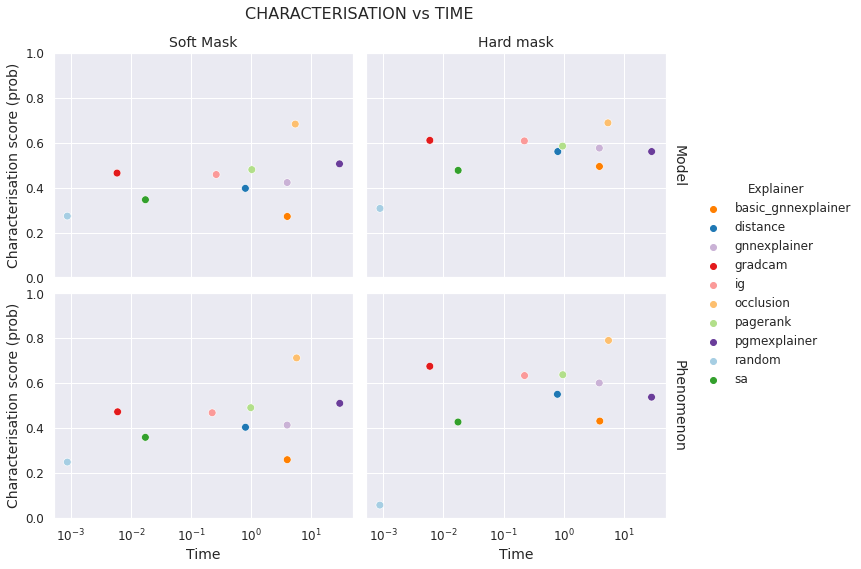

In [53]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o", s=60).set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=16, x=0.43)
#g.fig.suptitle("Averaged on all real-world datasets", fontsize=12, x=0.43, y=1)

g.set(ylim=(0,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score (prob)")
#g.savefig('/cluster/home/kamara/Explain/figures/charact_vs_time/fig_all_prob_logx.pdf')
g.savefig('/cluster/home/kamara/Explain/figures/charact_vs_time/fig_all_prob_logx.png')

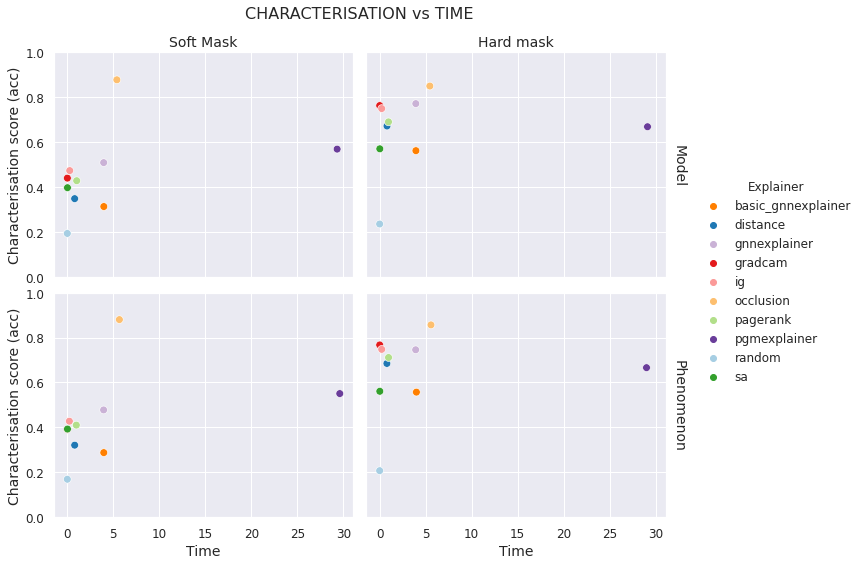

In [55]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_acc",
    hue="explainer_name", palette=dict_color, marker="o", s=60)#.set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=16, x=0.43)
g.set(ylim=(0,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score (acc)")
#g.savefig('/cluster/home/kamara/Explain/figures/charact_vs_time/fig_all_acc.pdf')
g.savefig('/cluster/home/kamara/Explain/figures/charact_vs_time/fig_all_acc.png')

## Each dataset

In [50]:
datasets = [
      "cora",
      "pubmed",
      "citeseer",
      "cornell",
      "texas",
      "wisconsin",
      "actor",
      "chameleon",
    "squirrel",
    "facebook"
    ]

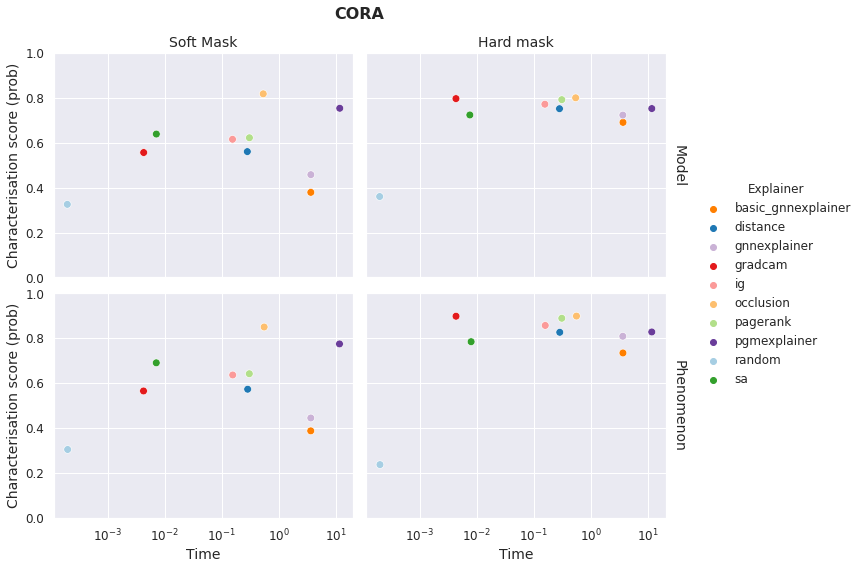

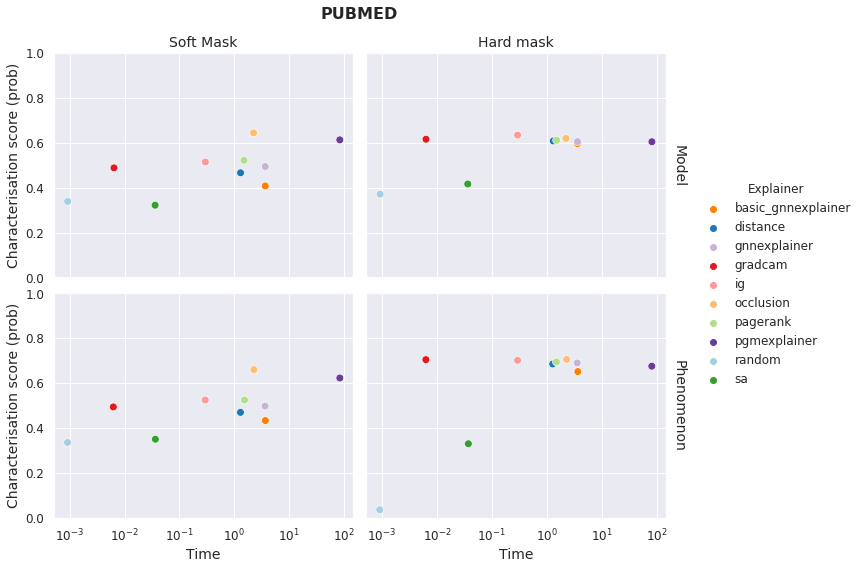

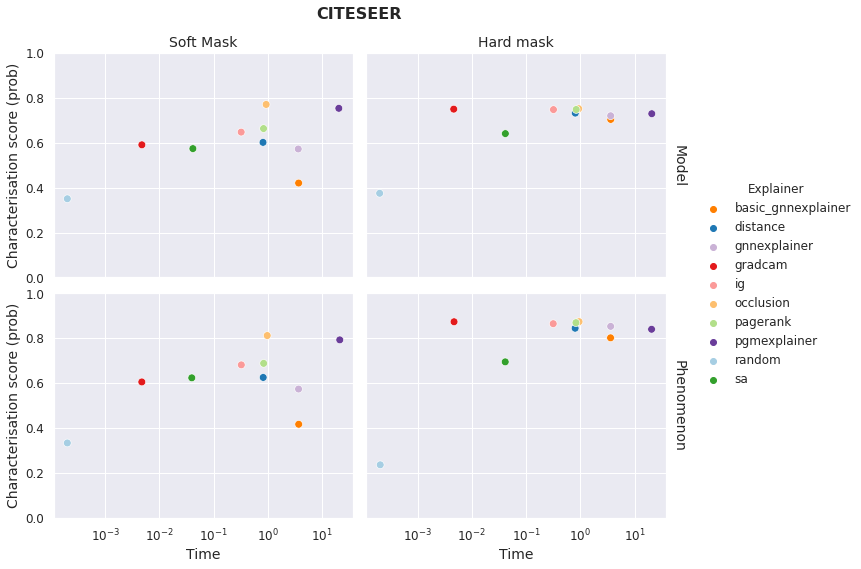

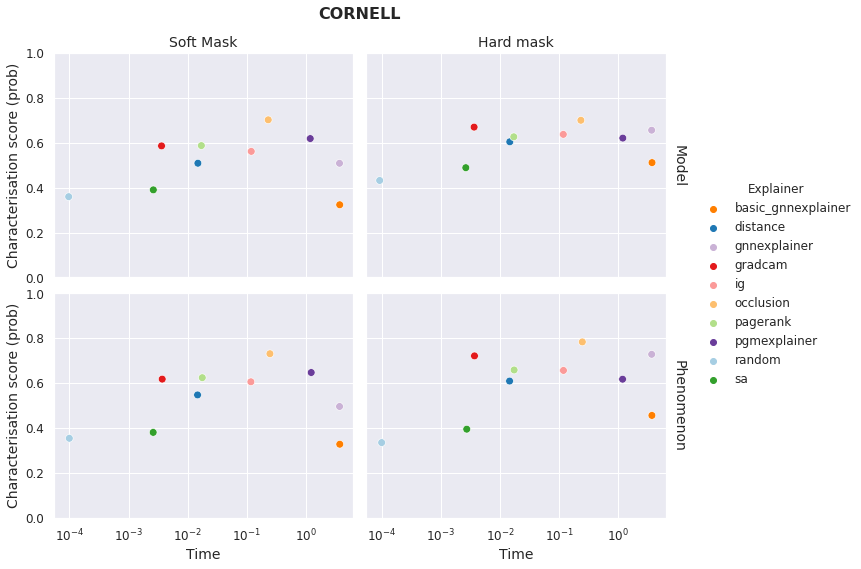

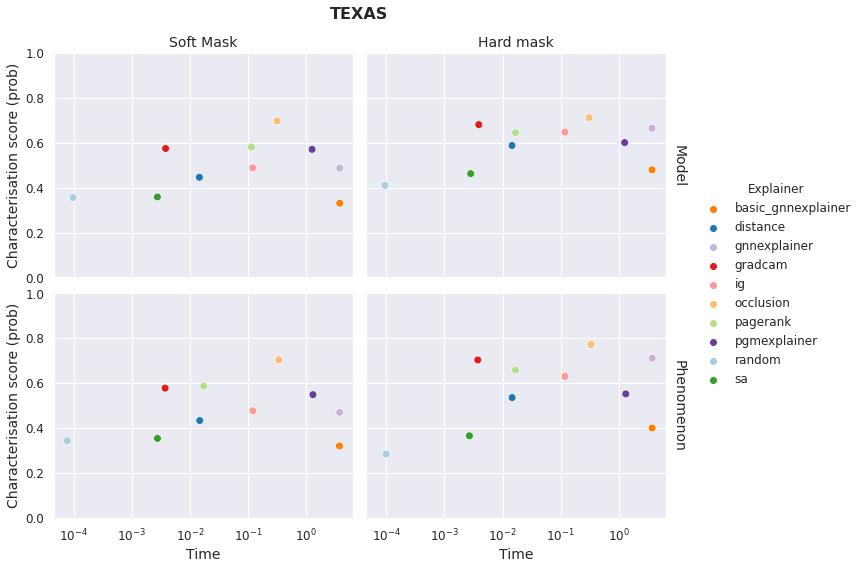

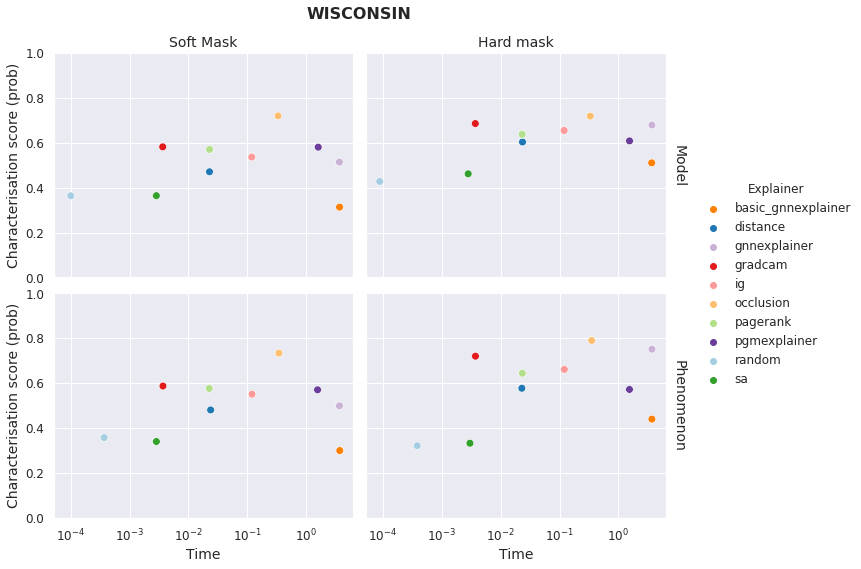

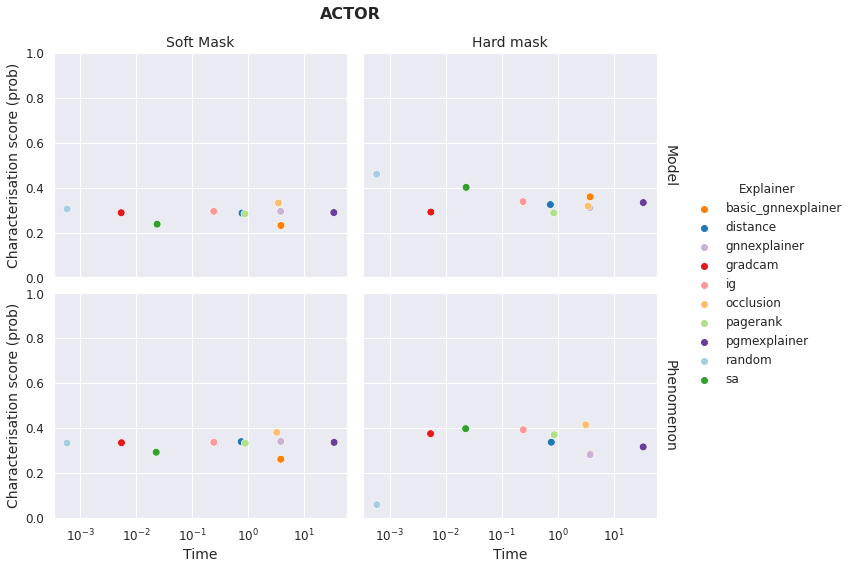

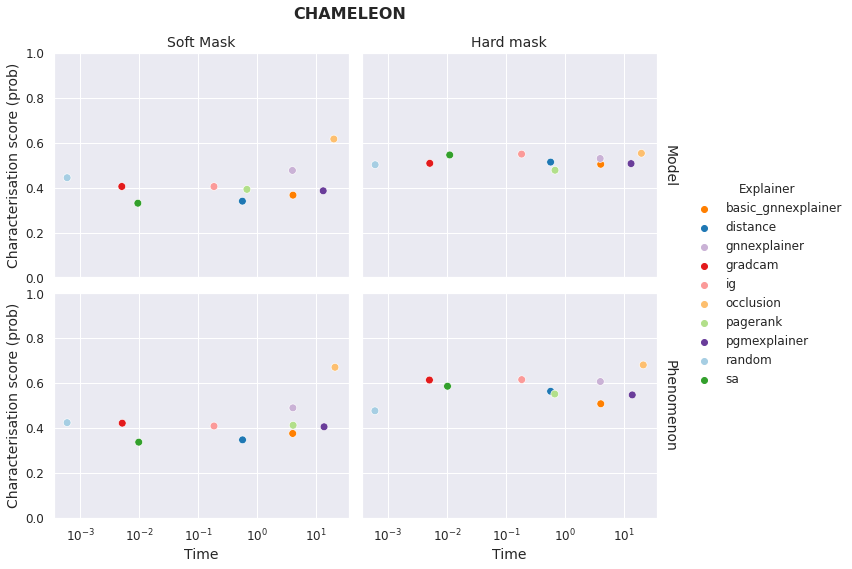

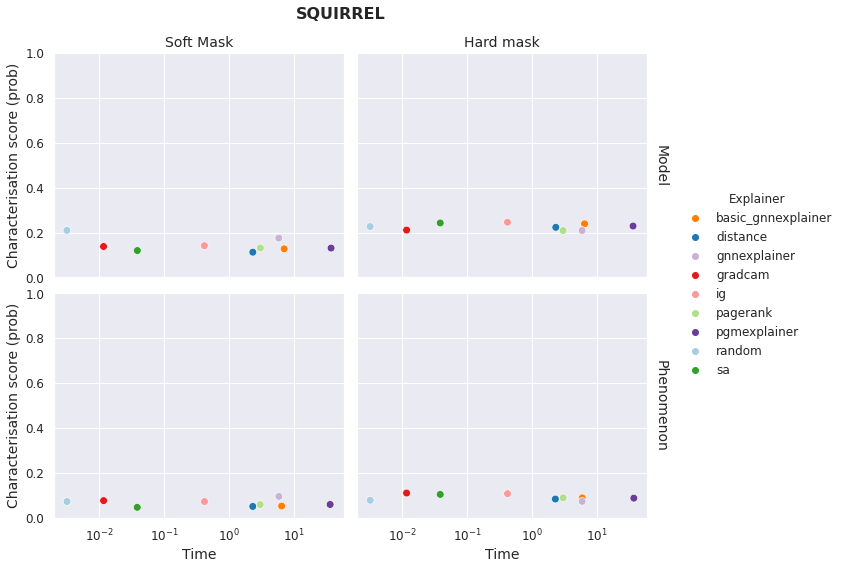

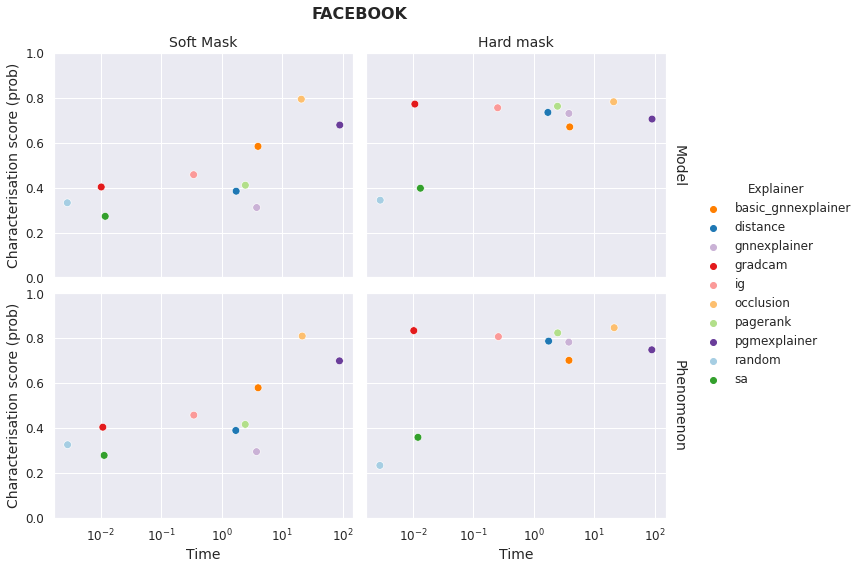

In [56]:
for data in datasets:
    df_gen_data = df_sparsity[df_sparsity['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="time", y="charact_prob",
        hue="explainer_name", palette=dict_color, marker="o", s=60).set(xscale = 'log')
    g.set(ylim=(0,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle(data.upper(), fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Time", y_var="Characterisation score (prob)")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/charact_vs_time/fig_{data}_prob_logx.pdf')
    g.savefig(f'/cluster/home/kamara/Explain/figures/charact_vs_time/fig_{data}_prob_logx.png')


# Explanation type 
Default sparsity = 0.99

In [34]:
df = df_sparsity[df_sparsity['sparsity']==0.99]
#df = df_sparsity

## Avg on all datasets

In [35]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [36]:
df_gen = df.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

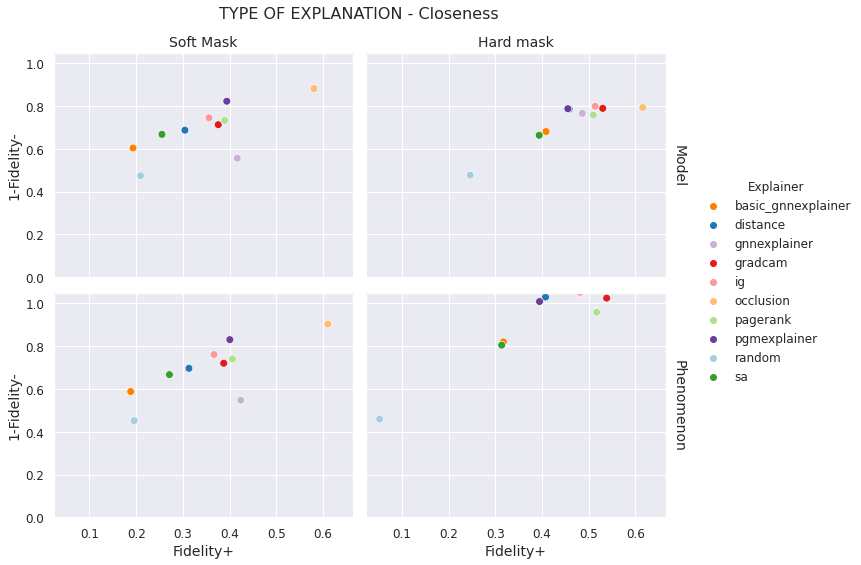

In [37]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_prob+", y="1-fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", s=60)
g.fig.suptitle("TYPE OF EXPLANATION - Closeness", fontsize=16, x=0.43)
#g.fig.suptitle("Averaged on all real-world datasets", fontsize=12, x=0.43, y=1)

g.set(ylim=(0,1.05))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
#g.savefig('/cluster/home/kamara/Explain/figures/expl_type/fig_expl_type_0.99_all_prob.pdf')
g.savefig('/cluster/home/kamara/Explain/figures/expl_type/fig_expl_type_0.99_all_prob.png')

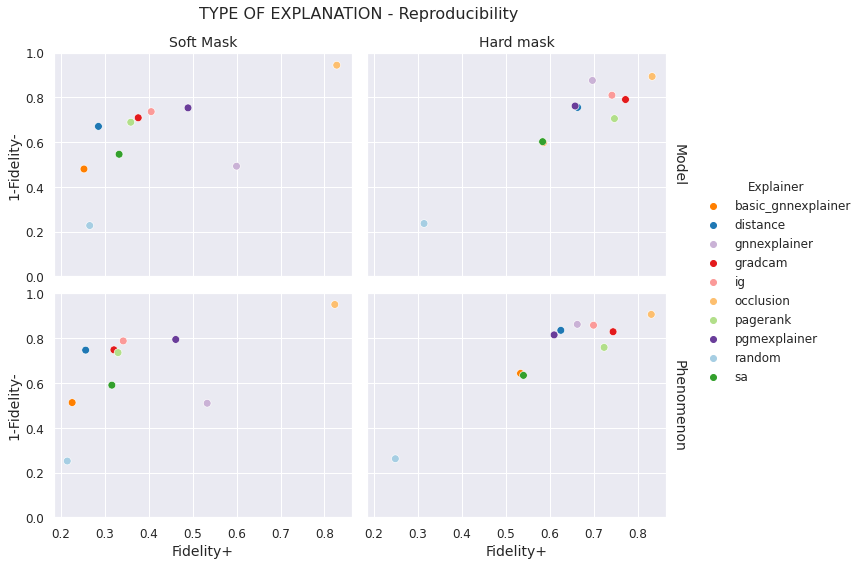

In [38]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_acc+", y="1-fidelity_acc-",
    hue="explainer_name", palette=dict_color, marker="o", s=60)
g.fig.suptitle("TYPE OF EXPLANATION - Reproducibility", fontsize=16, x=0.43)
g.set(ylim=(0,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
#g.savefig('/cluster/home/kamara/Explain/figures/expl_type/fig_expl_type_0.99_all_acc.pdf')
g.savefig('/cluster/home/kamara/Explain/figures/expl_type/fig_expl_type_0.99_all_acc.png')

## Each dataset

In [39]:
datasets = [
      "cora",
      "pubmed",
      "citeseer",
      "cornell",
      "texas",
      "wisconsin",
      "actor",
      "chameleon",
    "squirrel",
    "facebook"
    ]

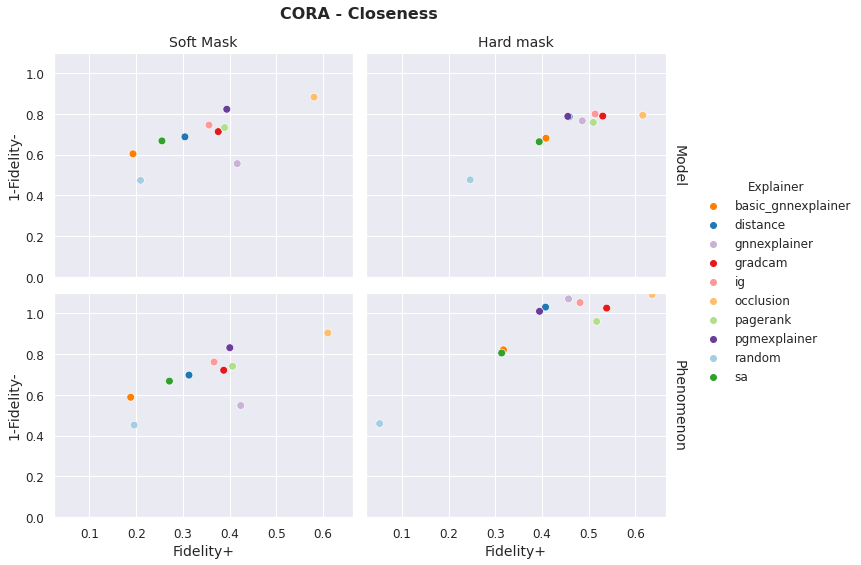

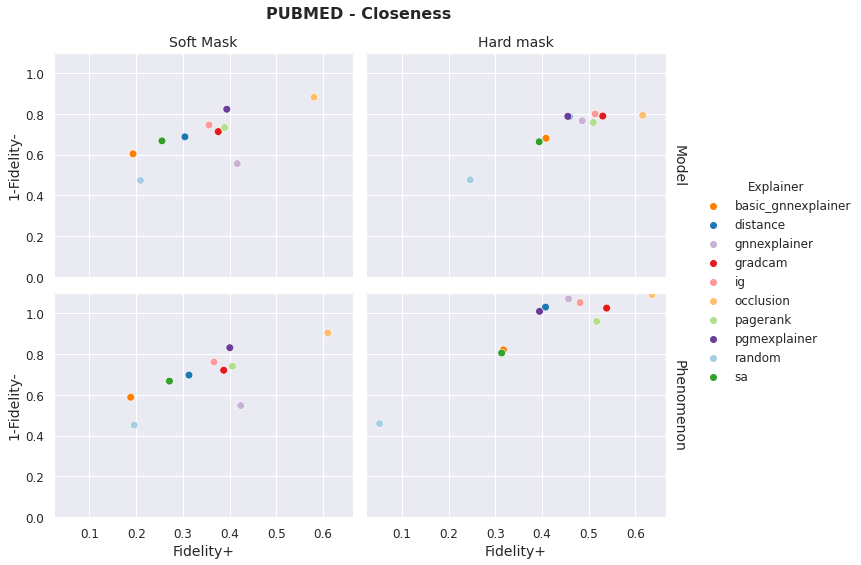

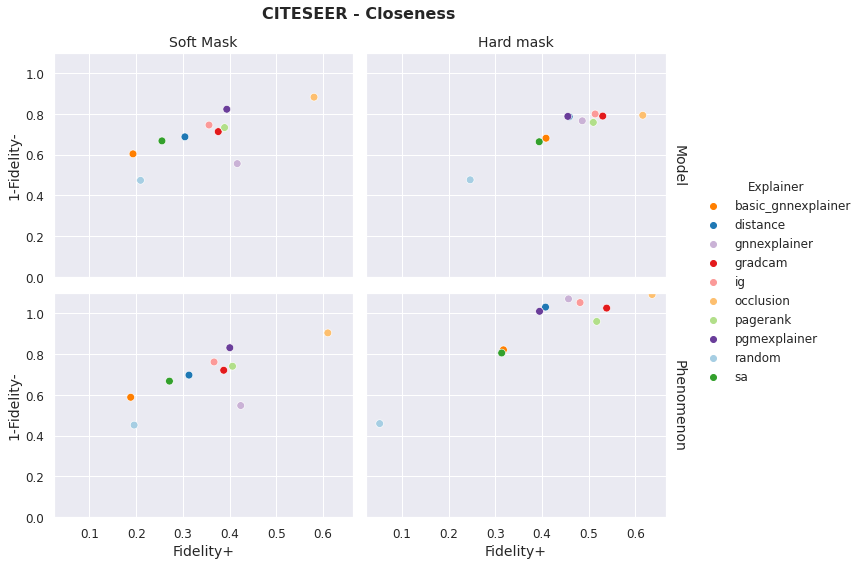

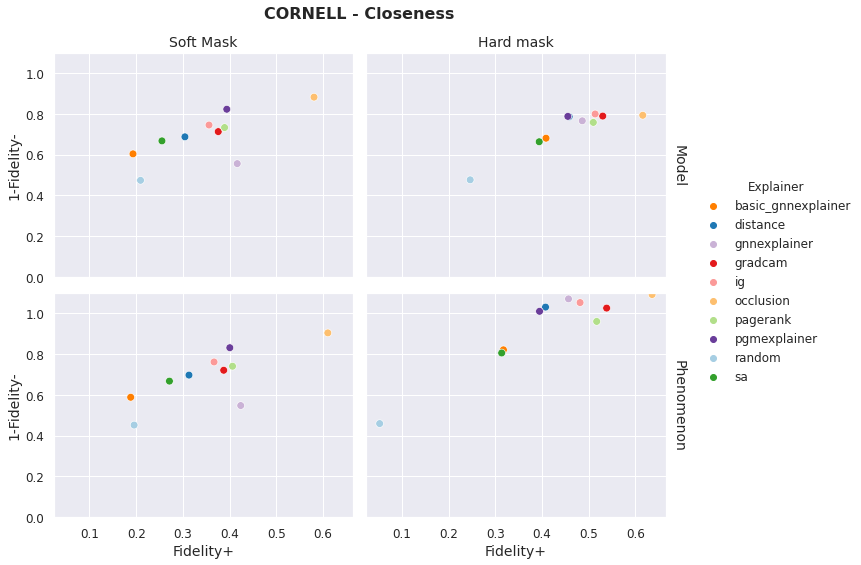

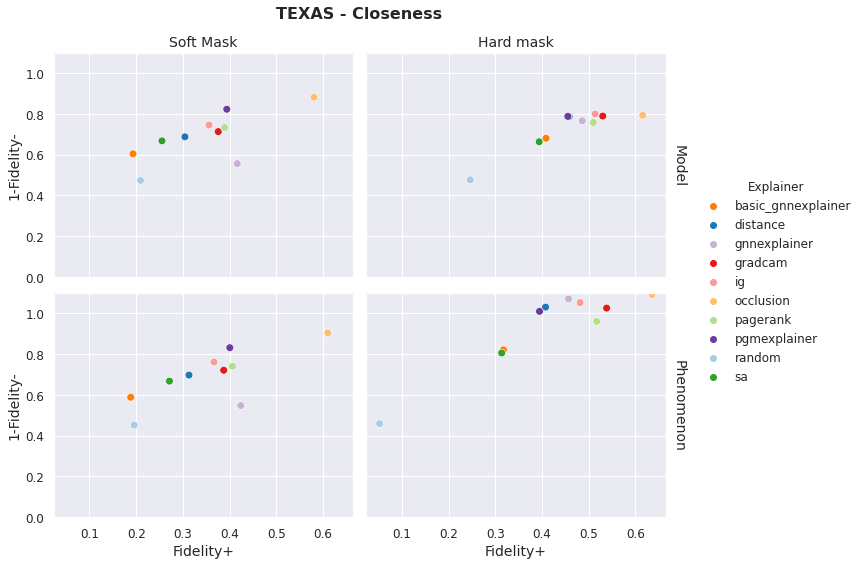

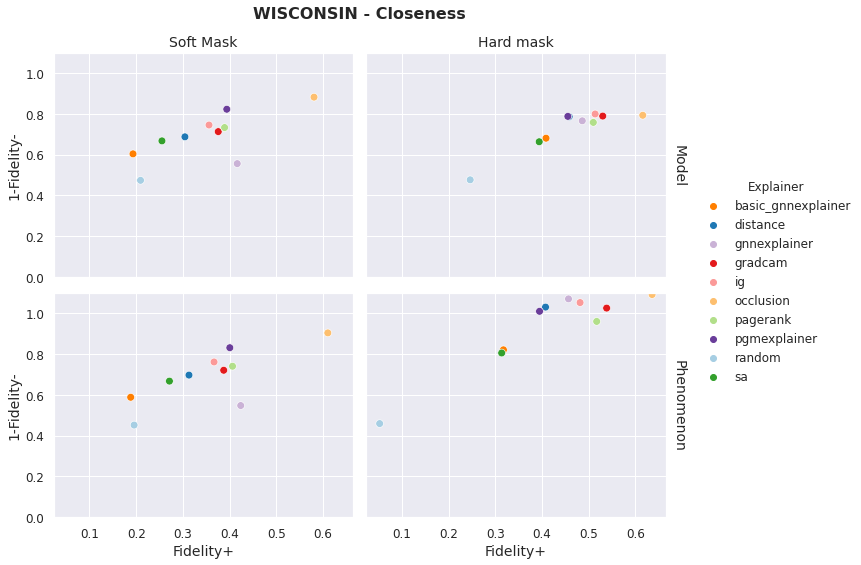

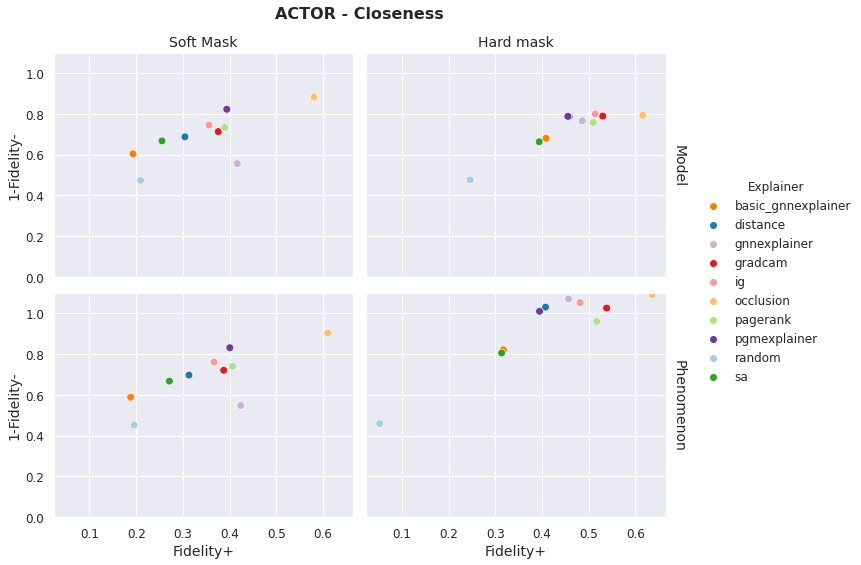

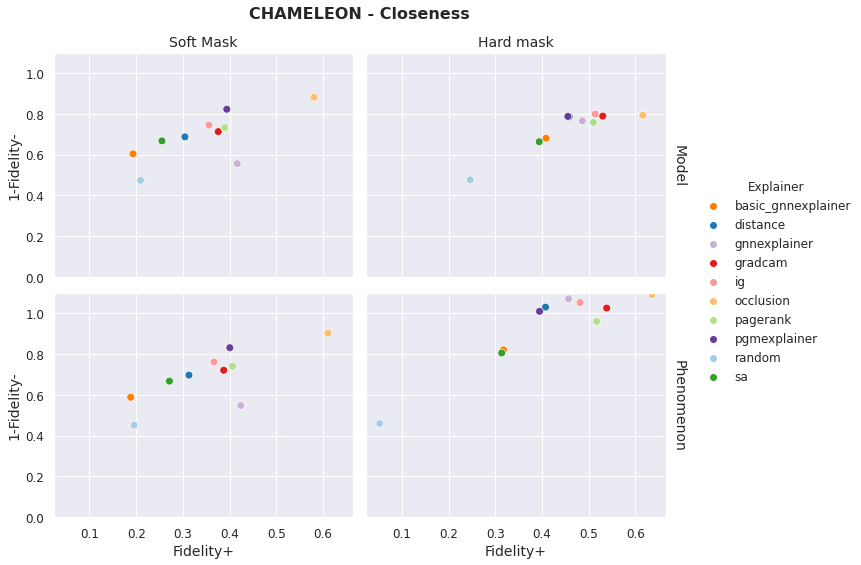

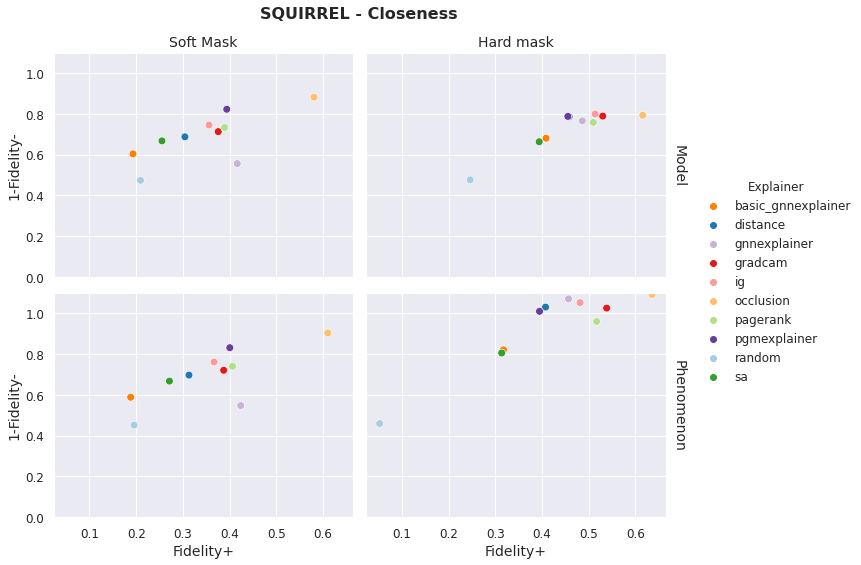

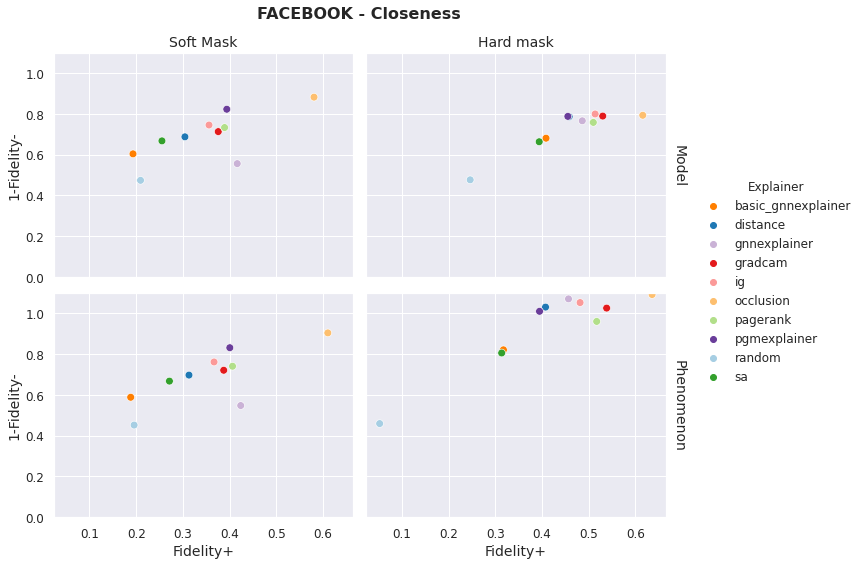

In [40]:
for data in datasets:
    df_gen_data = df[df['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="fidelity_prob+", y="1-fidelity_prob-",
        hue="explainer_name", palette=dict_color, marker="o", s=60)
    g.set(ylim=(0,1.1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle(data.upper()+' - Closeness', fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/expl_type/fig_expl_type_0.99_{data}_prob.pdf')
    g.savefig(f'/cluster/home/kamara/Explain/figures/expl_type/fig_expl_type_0.99_{data}_prob.png')


# Mask properties vs Performance 
Sparsity = 0 bc we are interested in the initial masks (without transformation)

In [41]:
df = df_sparsity[df_sparsity['sparsity']==0]
#df = df_sparsity

In [42]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [43]:
datasets = [
      "cora",
      "pubmed",
      "citeseer",
      "cornell",
      "texas",
      "wisconsin",
      "actor",
      "chameleon",
    "squirrel",
    "facebook"
    ]


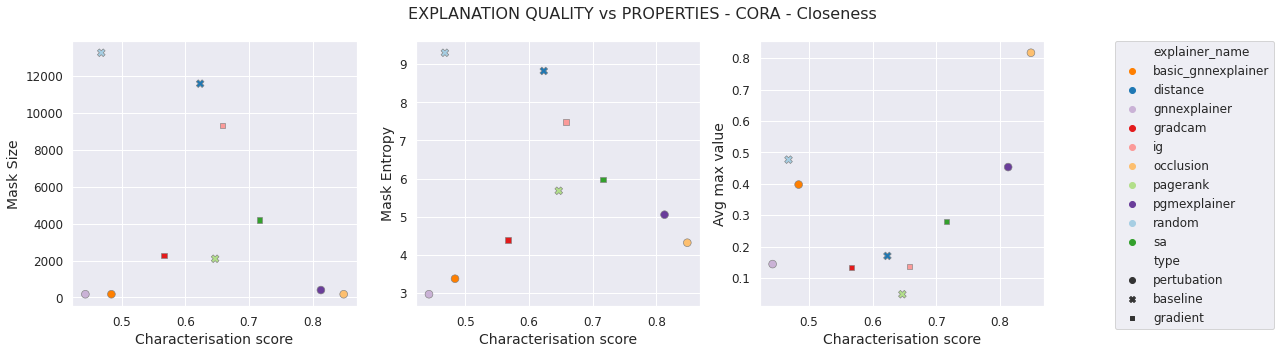

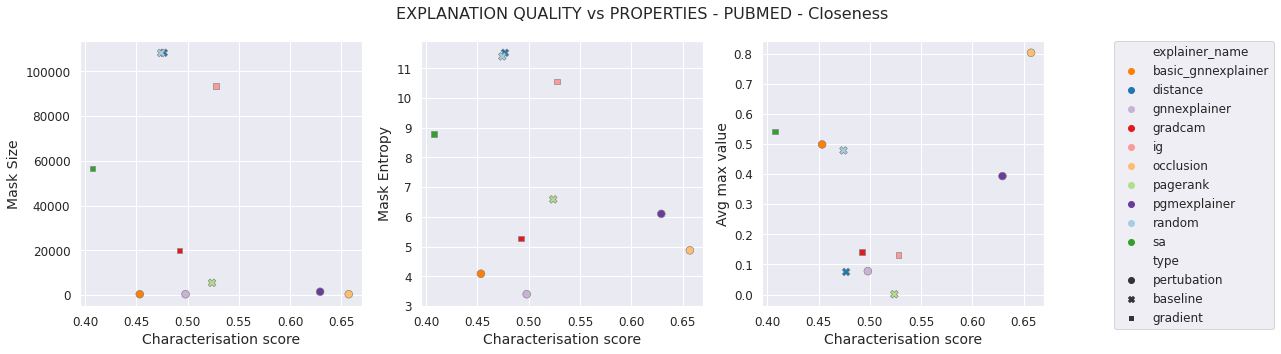

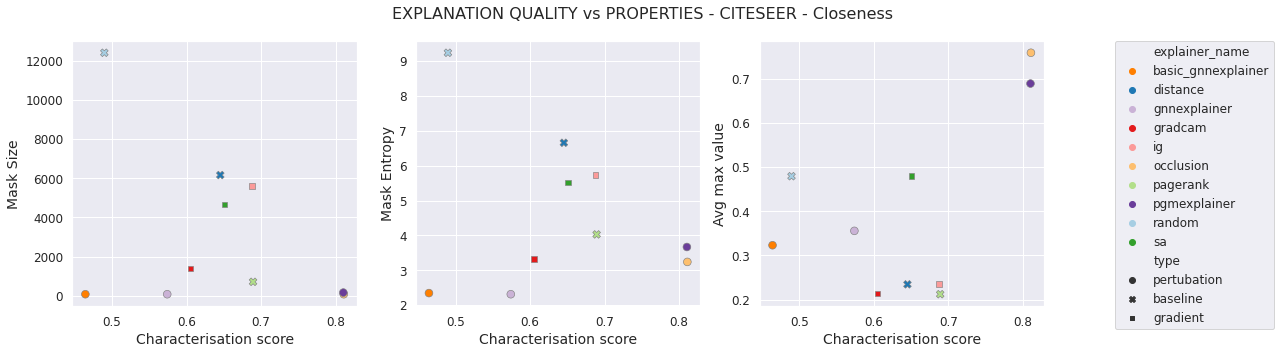

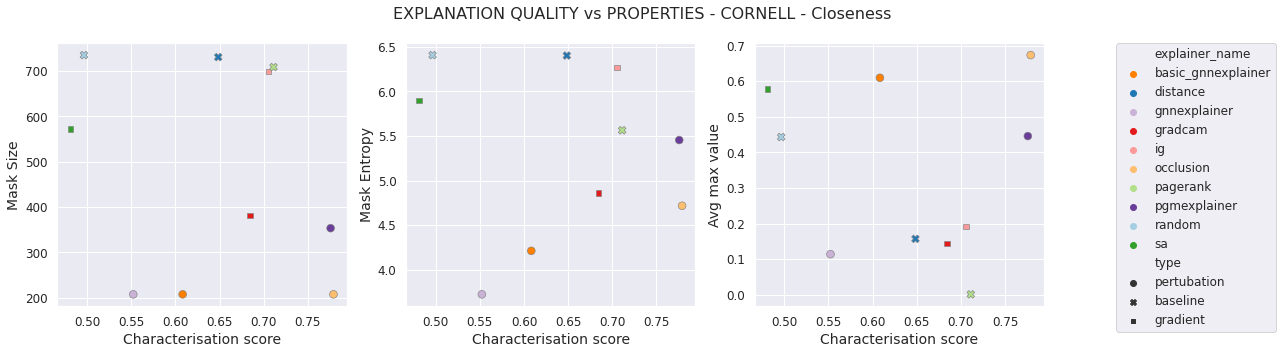

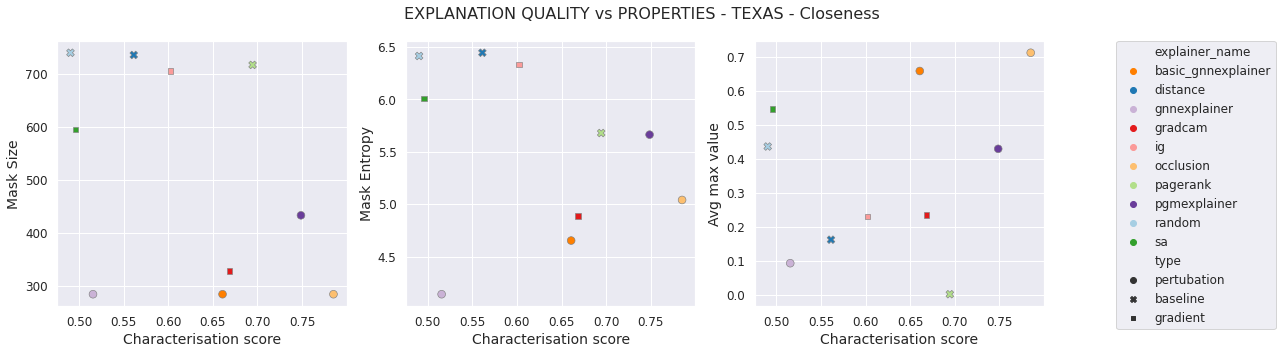

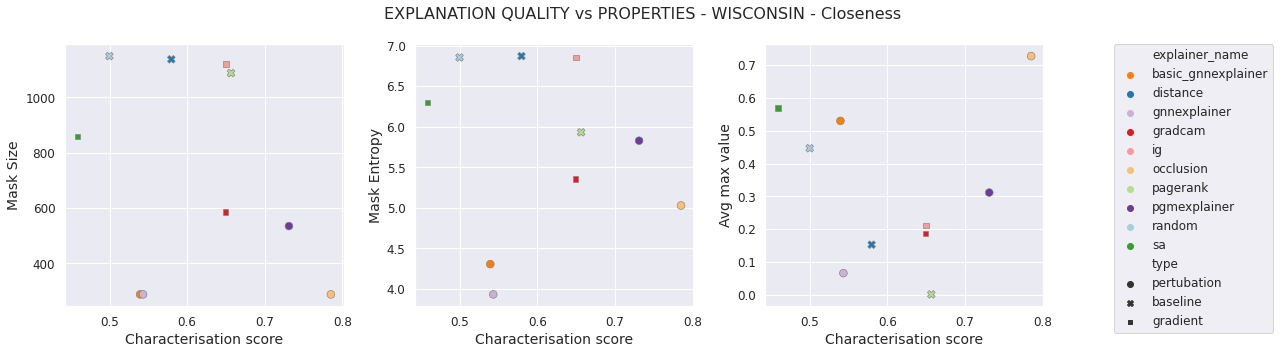

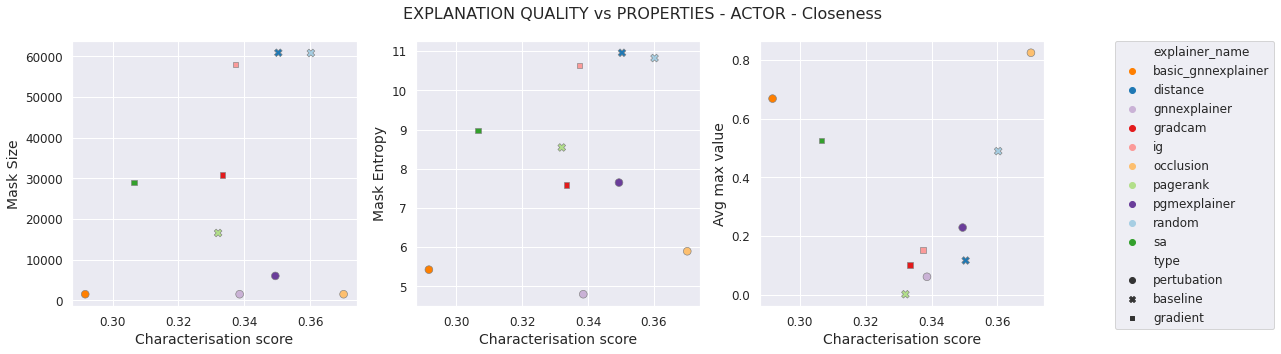

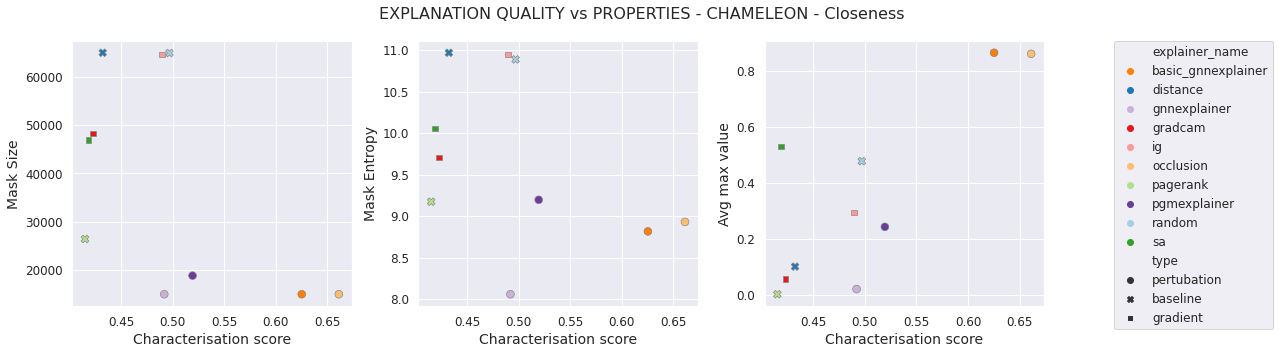

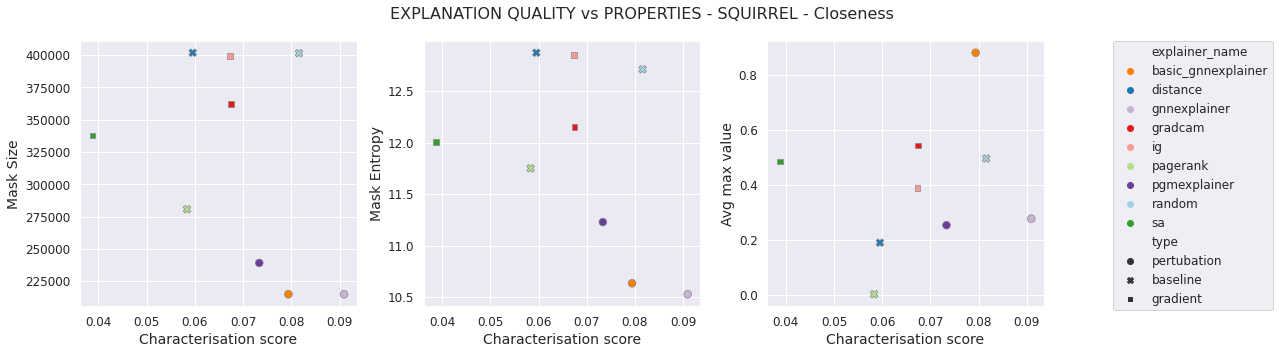

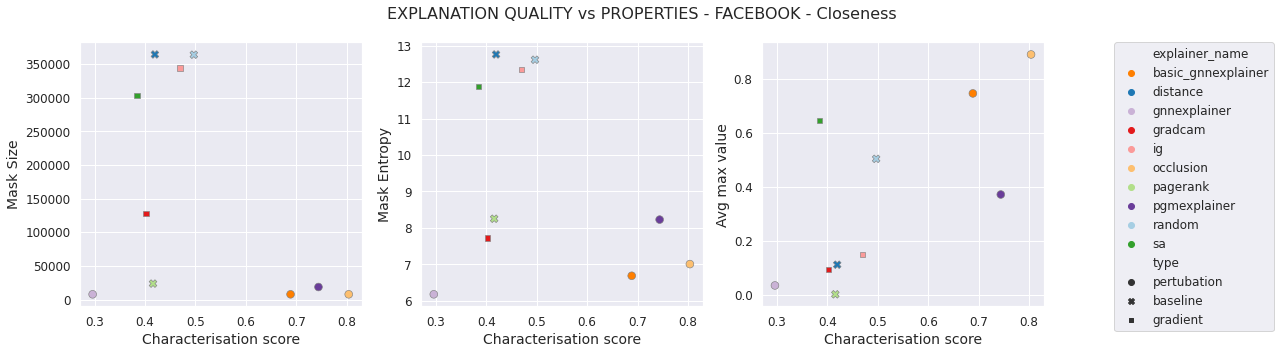

In [44]:
for data in datasets:
    df_mask_data = df[(df['dataset']==data)&(df['true_label_as_target']==True)&(df['hard_mask']==False)]
    fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)
    
    g1 = sns.scatterplot(data =df_mask_data, x="charact_prob", y="mask_size_init",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
    axs[0].set_ylabel('Mask Size')
    axs[0].set_xlabel('Characterisation score')
    
    g2 = sns.scatterplot(data =df_mask_data, x="charact_prob", y="mask_entropy_init",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
    axs[1].set_ylabel('Mask Entropy')
    axs[1].set_xlabel('Characterisation score')
    
    g3 = sns.scatterplot(data =df_mask_data, x="charact_prob", y="max_avg_init",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
    axs[2].set_ylabel('Avg max value')
    axs[2].set_xlabel('Characterisation score')
    
    # produce a legend with the unique colors from the scatter
    plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
    fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - '+data.upper()+' - Closeness', fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'/cluster/home/kamara/Explain/figures/charact_vs_properties/fig_mask_prop_{data}_prob.pdf')
    fig.savefig(f'/cluster/home/kamara/Explain/figures/charact_vs_properties/fig_mask_prop_{data}_prob.png')


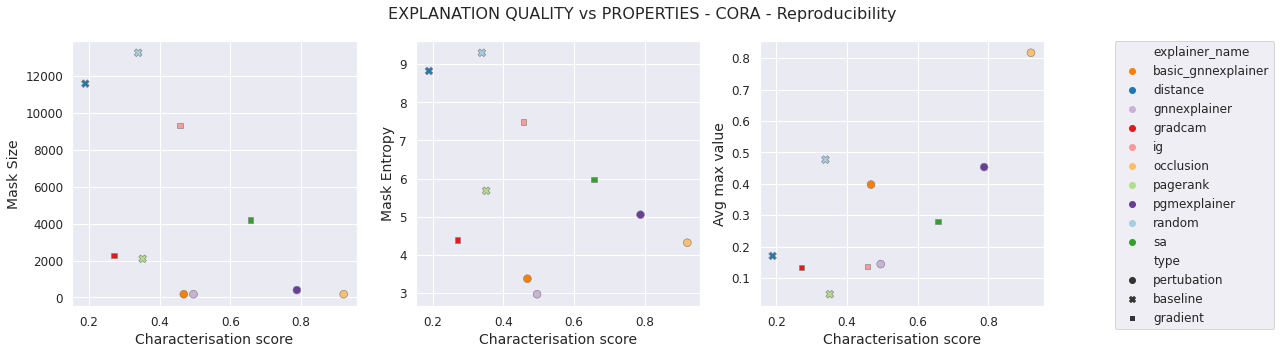

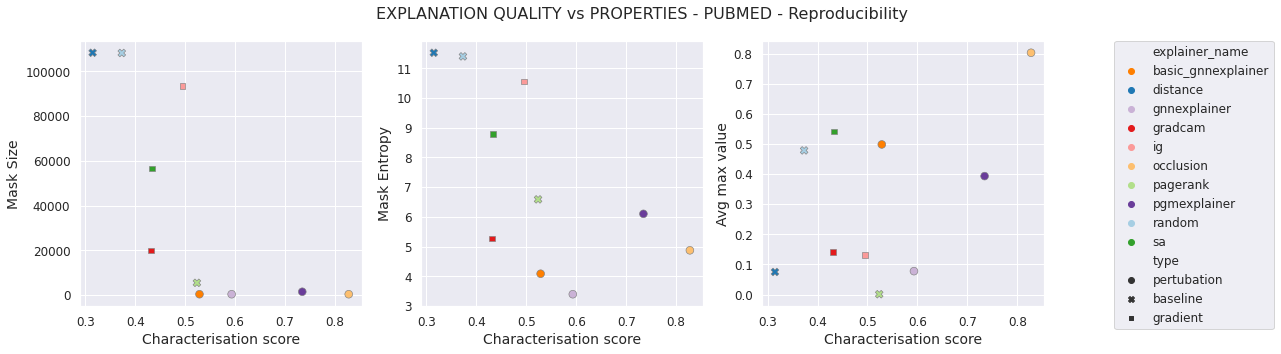

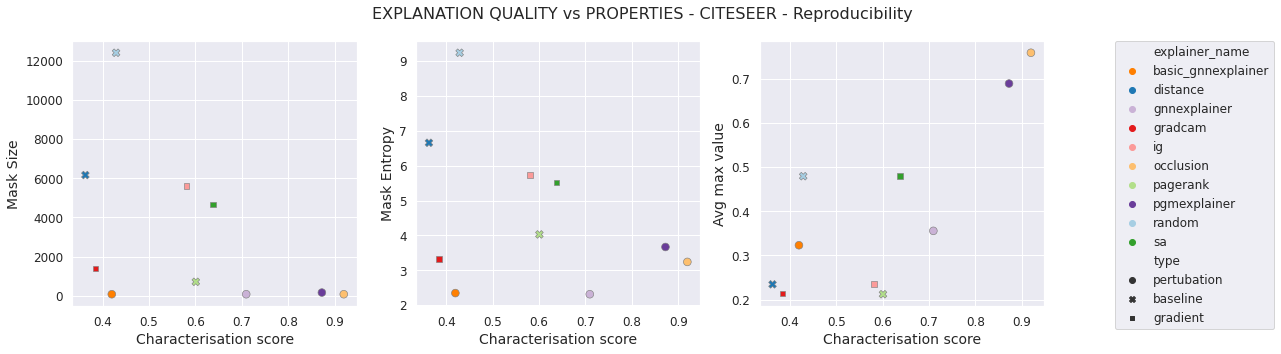

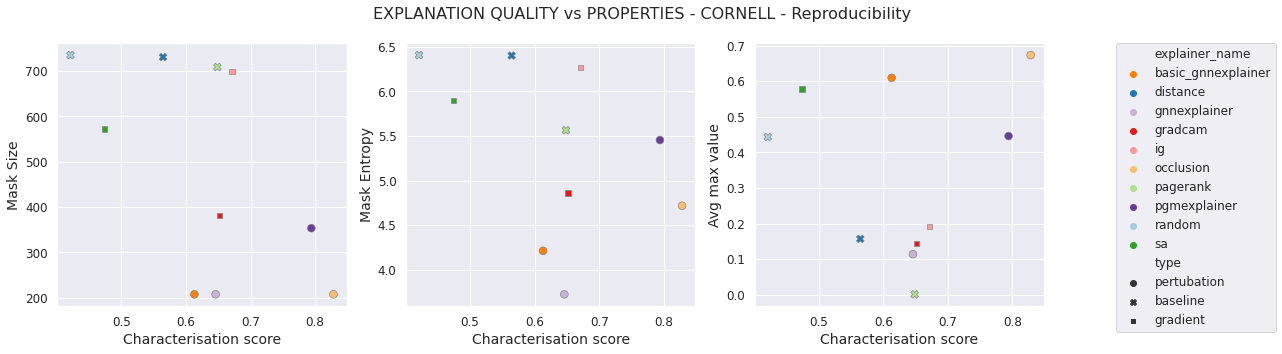

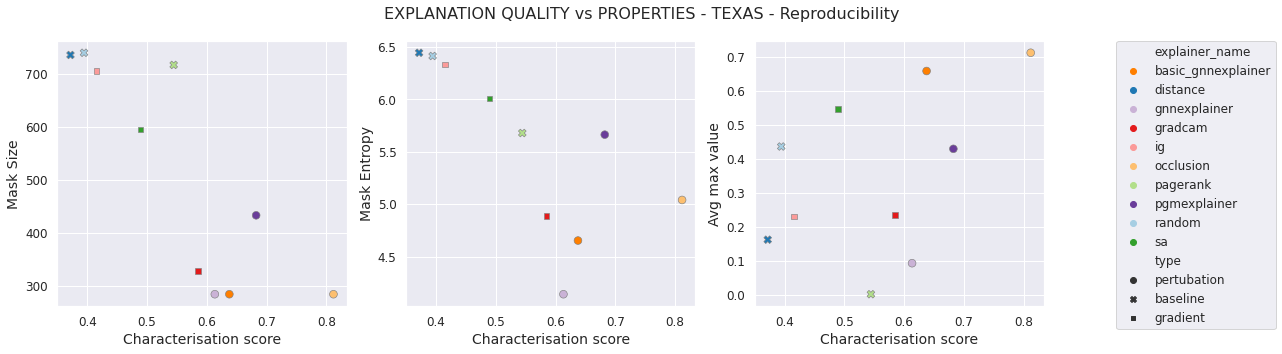

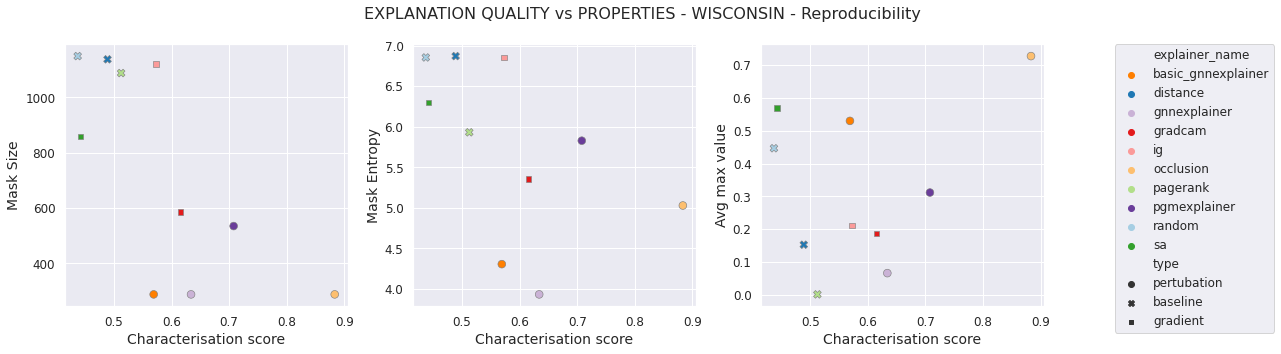

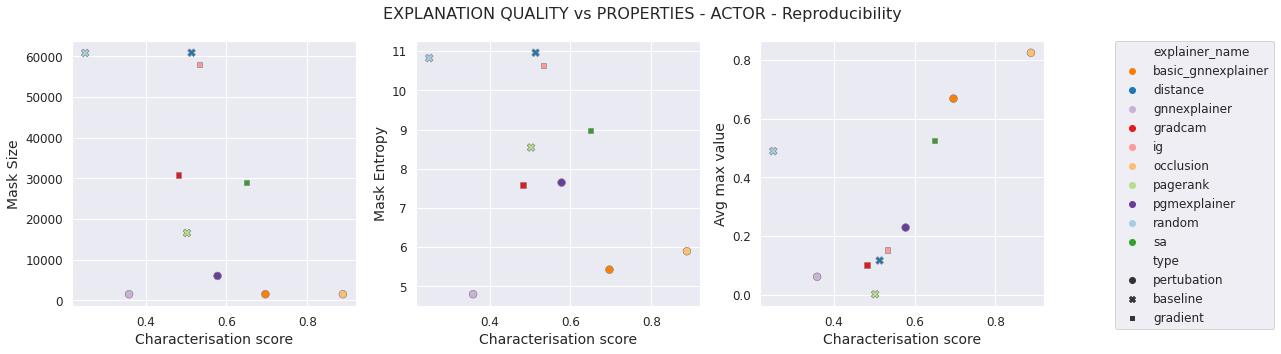

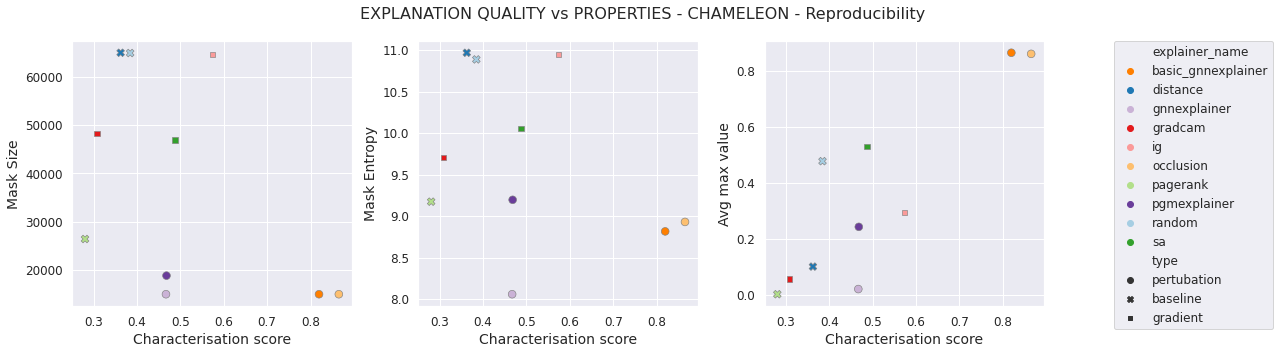

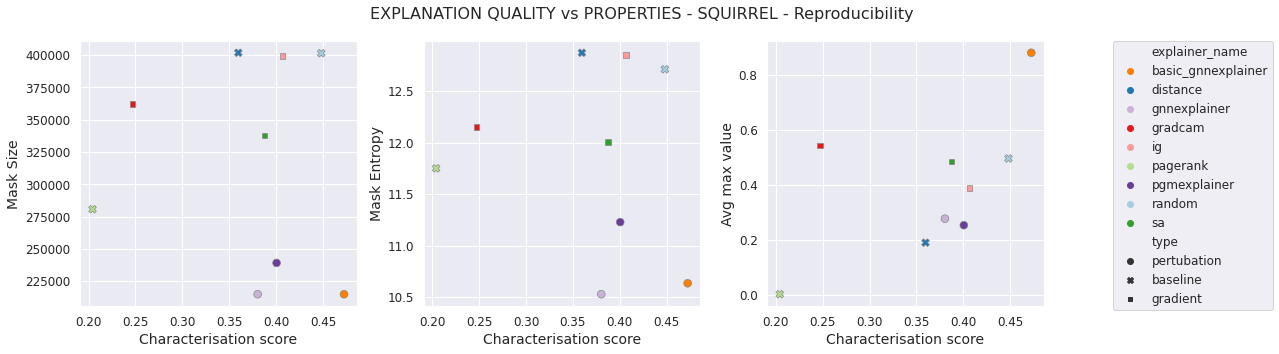

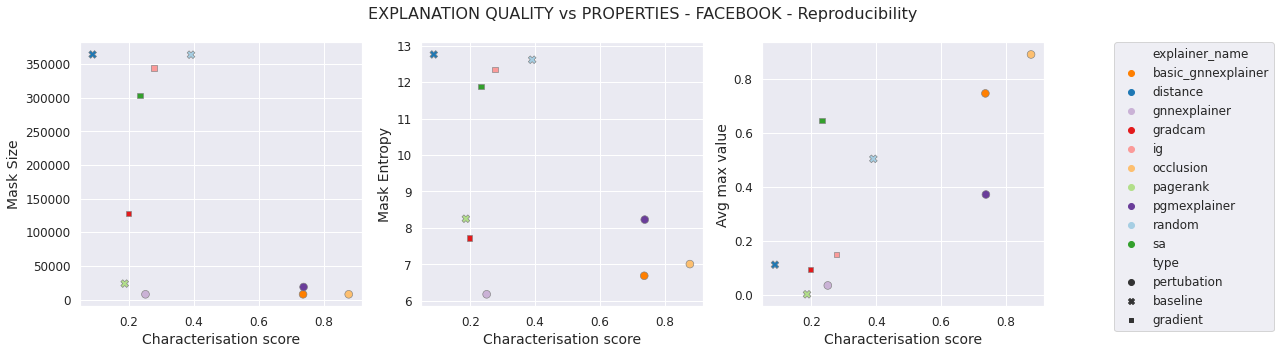

In [46]:
for data in datasets:
    df_mask_data = df[(df['dataset']==data)&(df['true_label_as_target']==True)&(df['hard_mask']==False)]
    fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)
    
    g1 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_size_init",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
    axs[0].set_ylabel('Mask Size')
    axs[0].set_xlabel('Characterisation score')
    
    g2 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_entropy_init",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
    axs[1].set_ylabel('Mask Entropy')
    axs[1].set_xlabel('Characterisation score')
    
    g3 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="max_avg_init",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
    axs[2].set_ylabel('Avg max value')
    axs[2].set_xlabel('Characterisation score')
    
    # produce a legend with the unique colors from the scatter
    plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
    fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - '+data.upper()+' - Reproducibility', fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'/cluster/home/kamara/Explain/figures/charact_vs_properties/fig_mask_prop_{data}_acc.pdf')
    fig.savefig(f'/cluster/home/kamara/Explain/figures/charact_vs_properties/fig_mask_prop_{data}_acc.png')


# Closeness vs Reproducibility

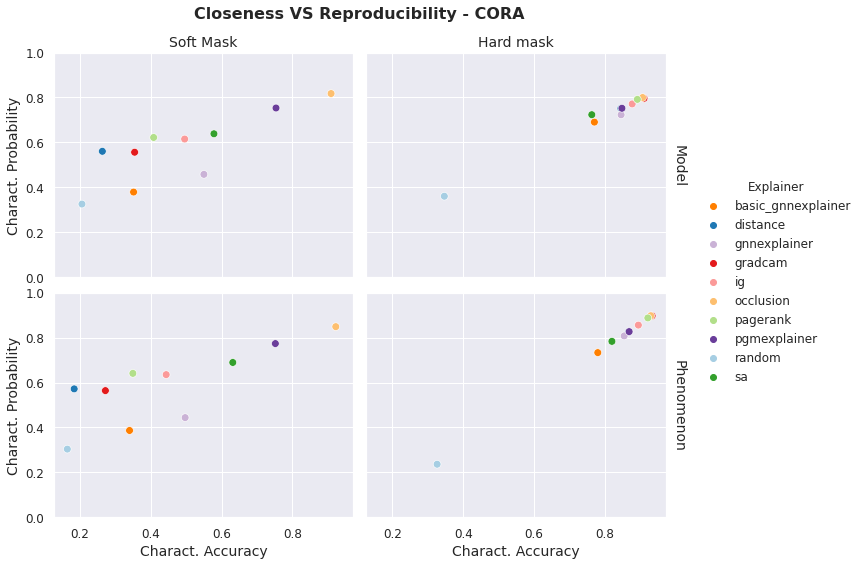

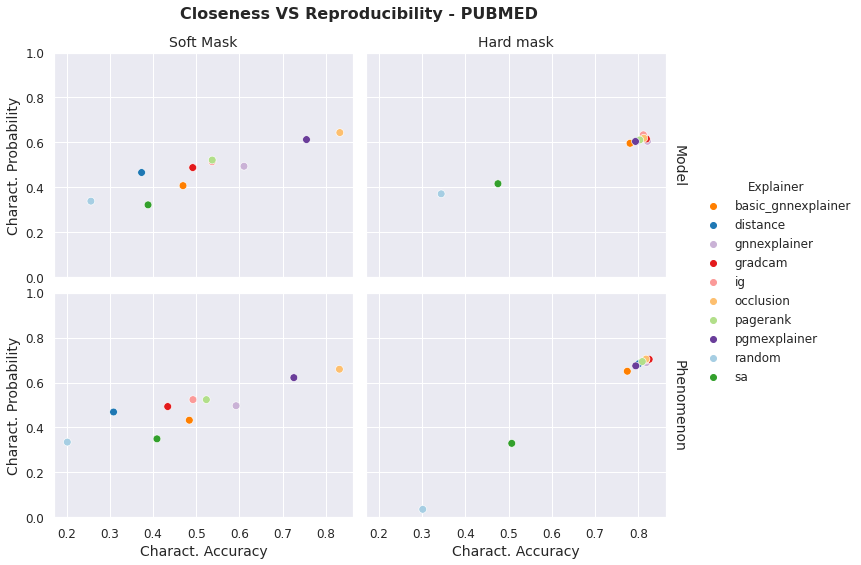

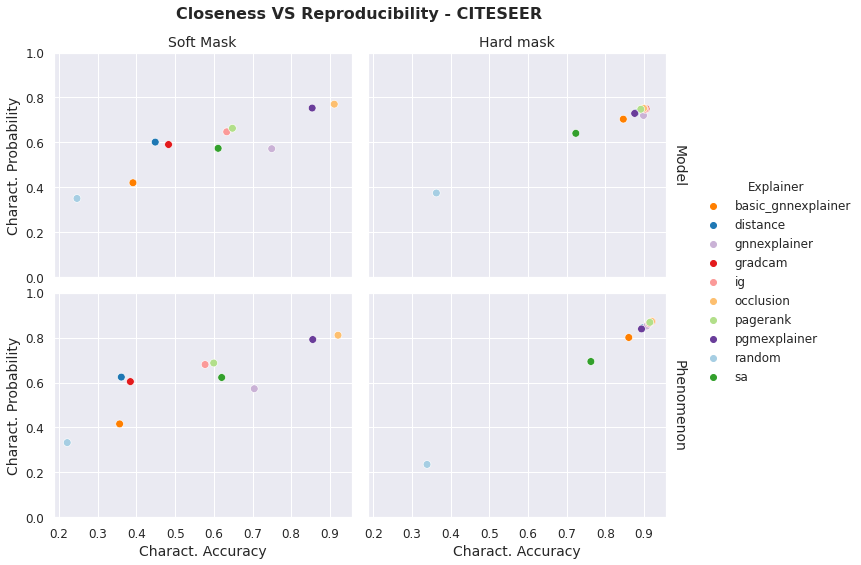

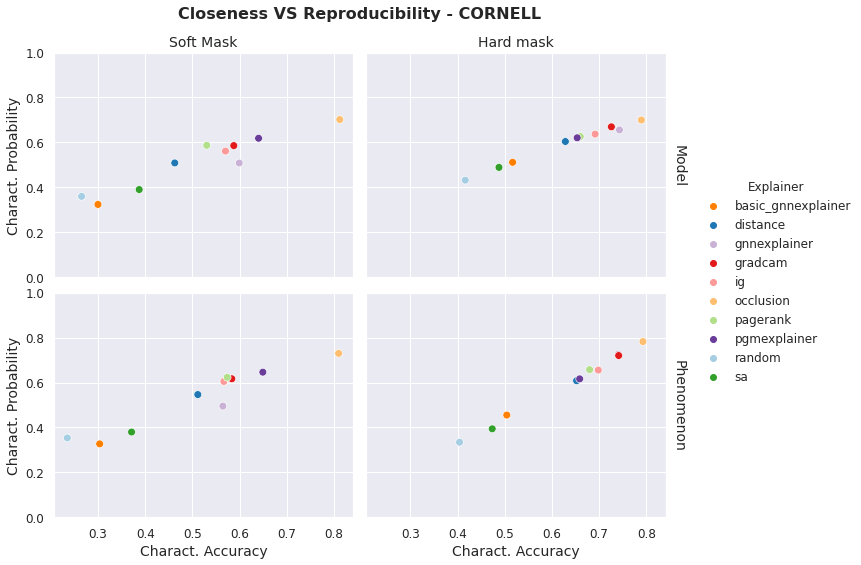

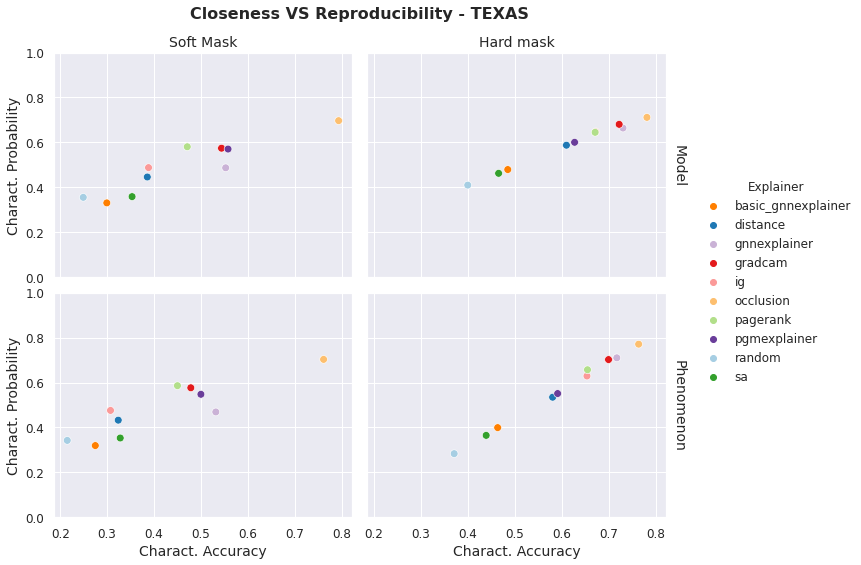

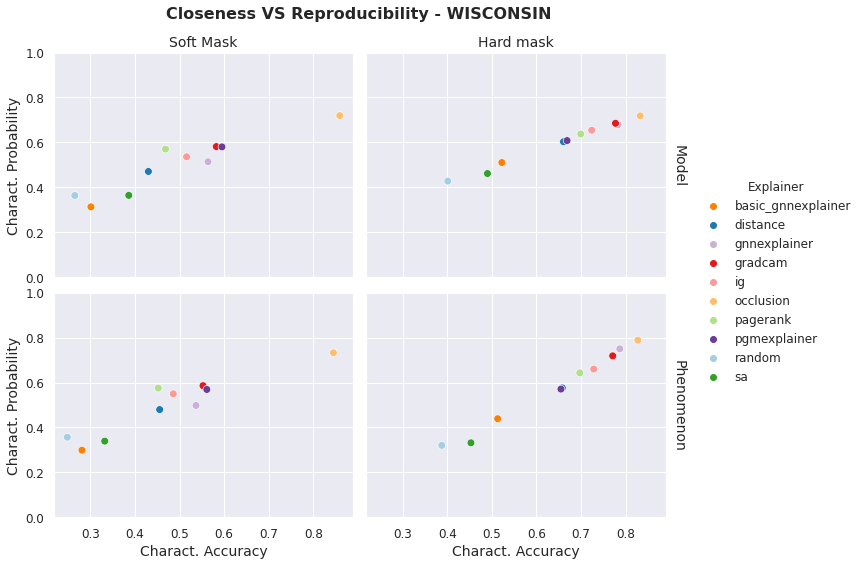

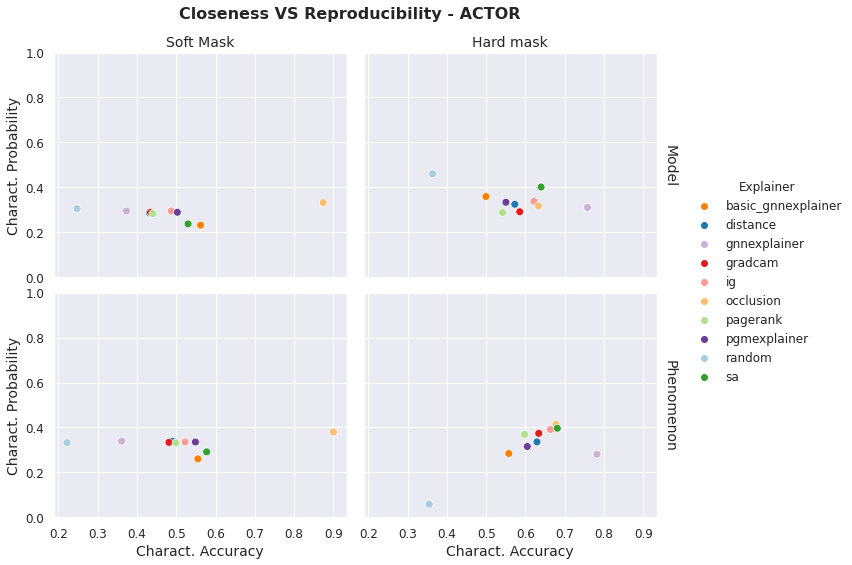

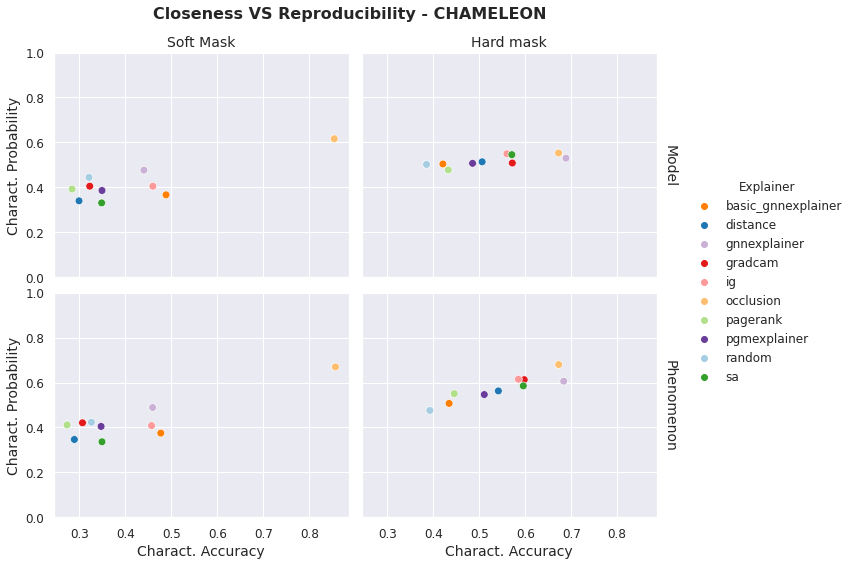

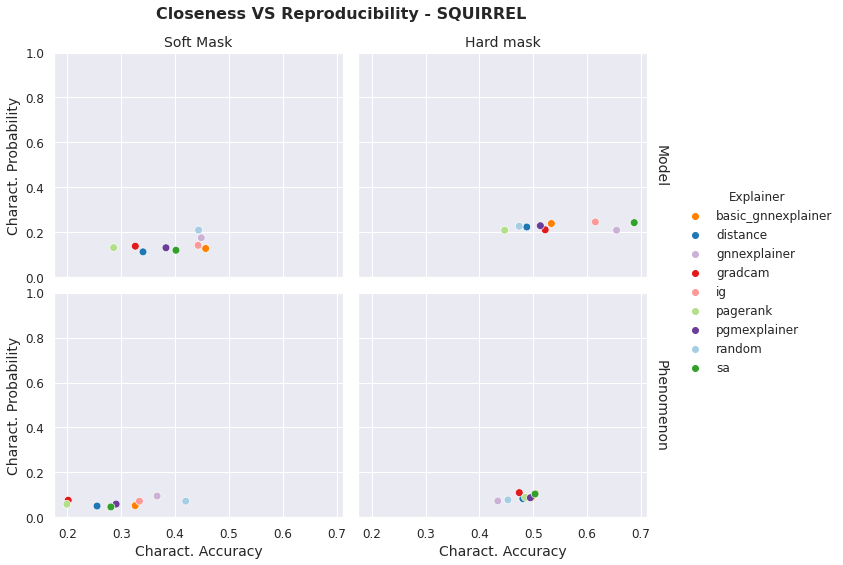

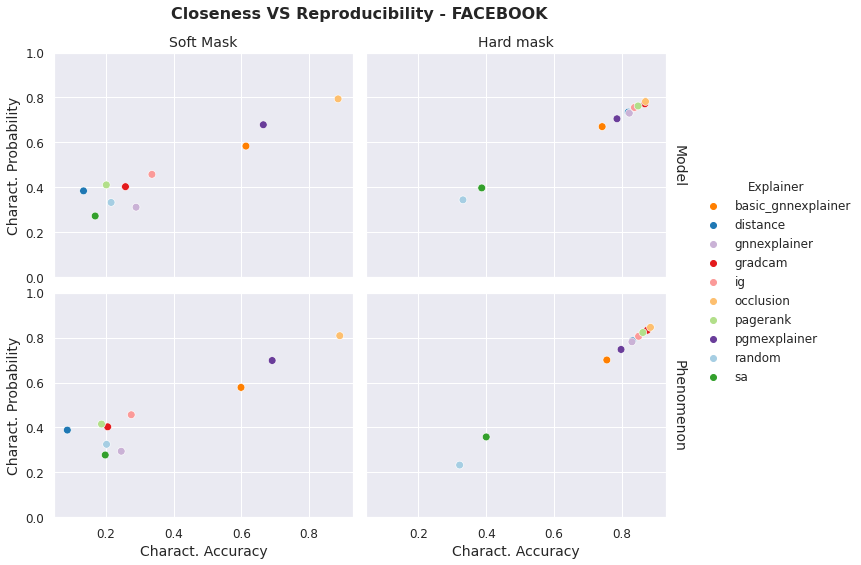

In [49]:
for data in datasets:
    df_gen_data = df_sparsity[df_sparsity['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="charact_acc", y="charact_prob",
        hue="explainer_name", palette=dict_color, marker="o", s=60)
    g.set(ylim=(0,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle('Closeness VS Reproducibility - '+data.upper(), fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Charact. Accuracy", y_var="Charact. Probability")
    
    g.savefig(f'/cluster/home/kamara/Explain/figures/prob_vs_acc/fig_prob_vs_acc_{data}.pdf')
    g.savefig(f'/cluster/home/kamara/Explain/figures/prob_vs_acc/fig_prob_vs_acc_{data}.png')


# Consistency - Performance vs Sparsity

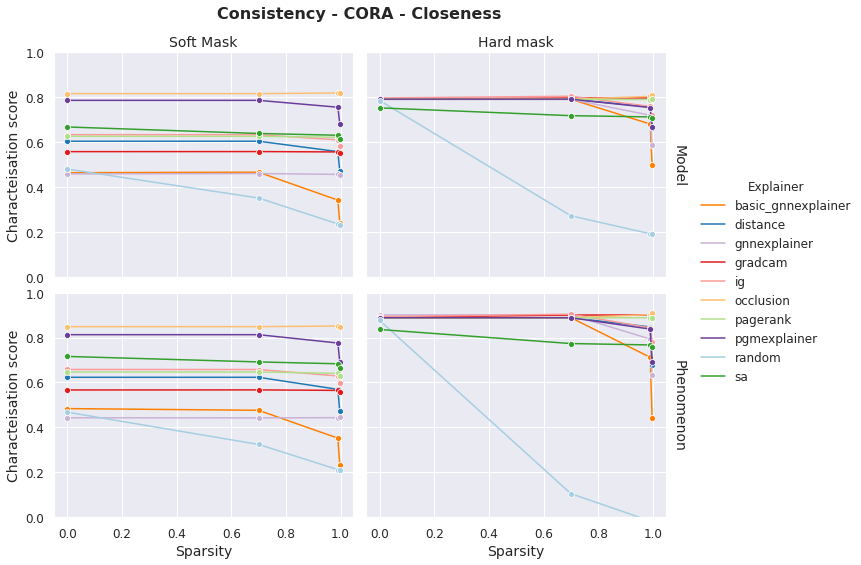

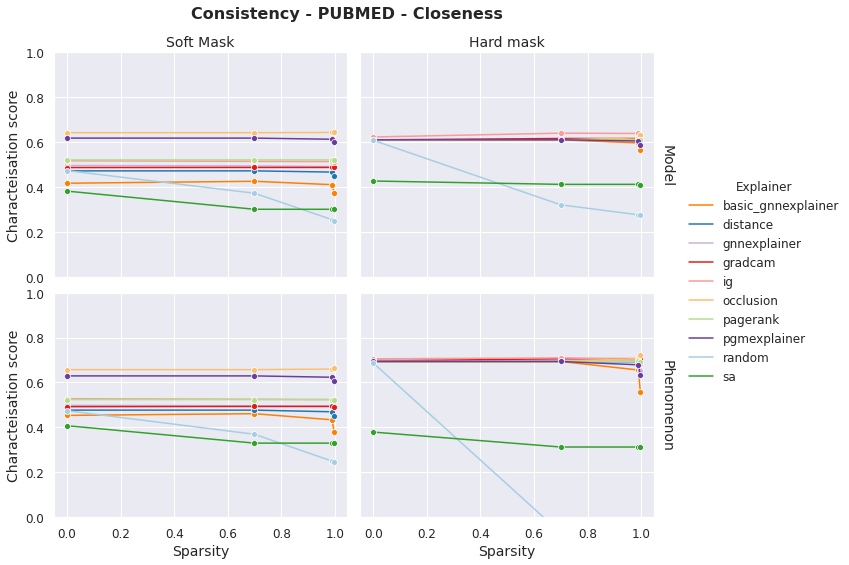

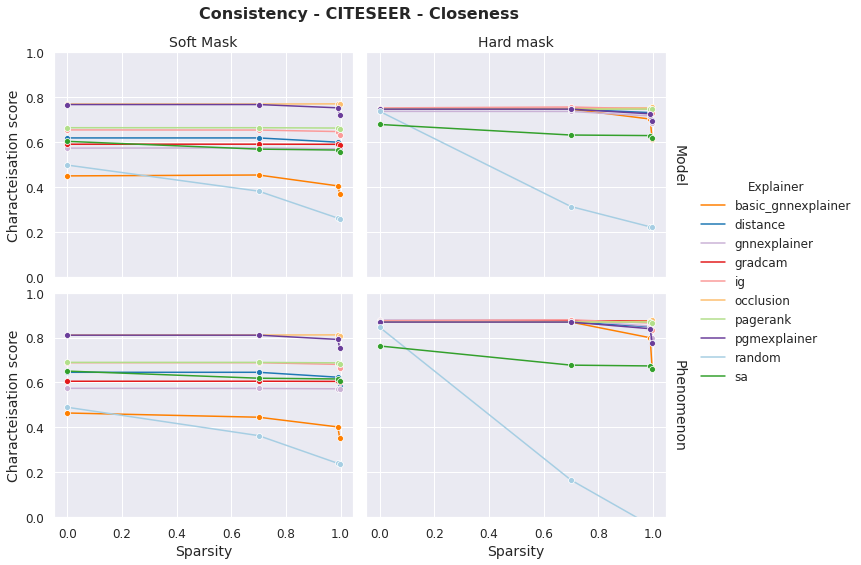

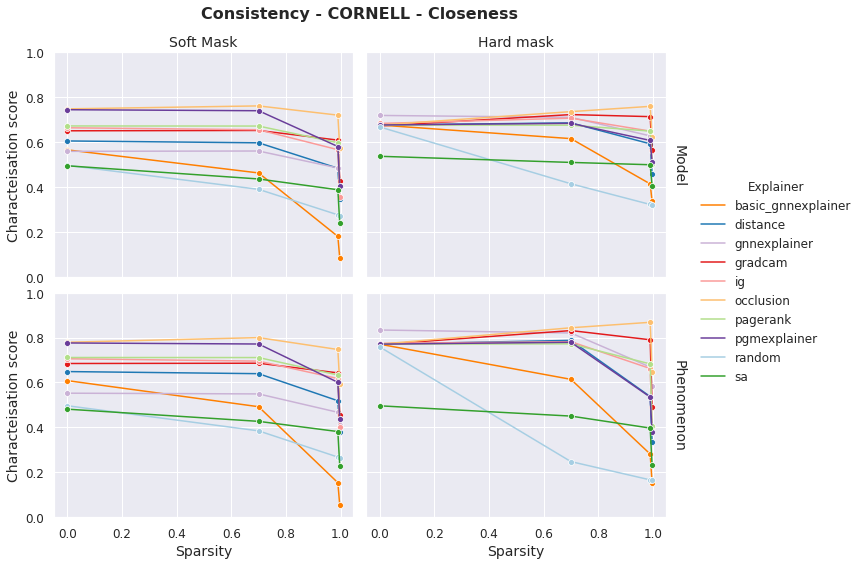

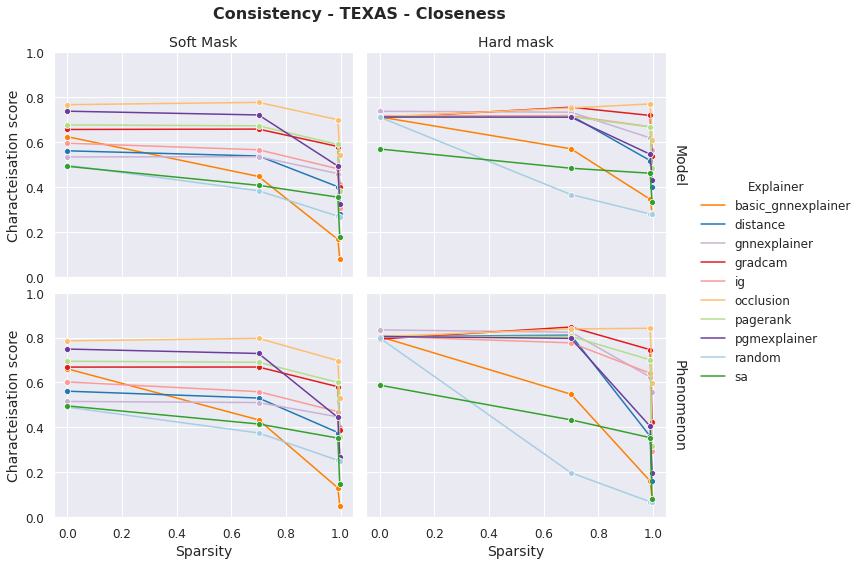

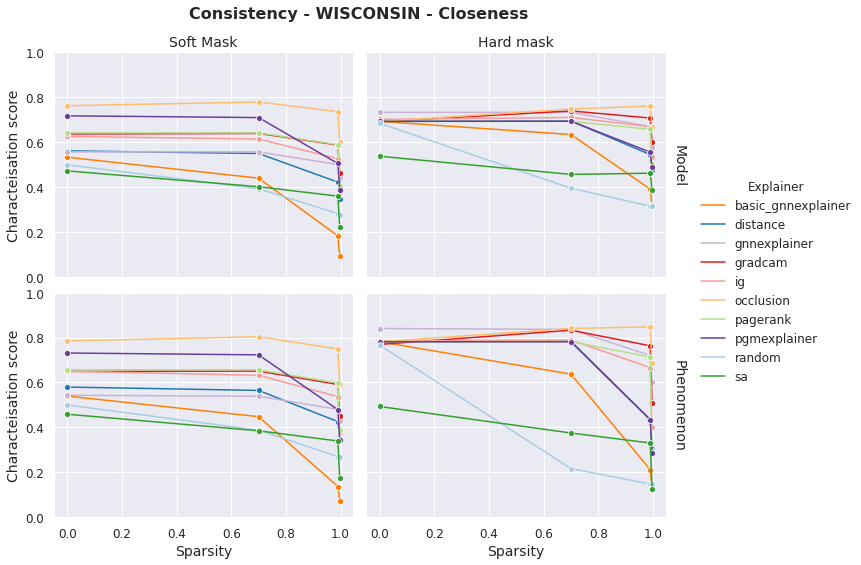

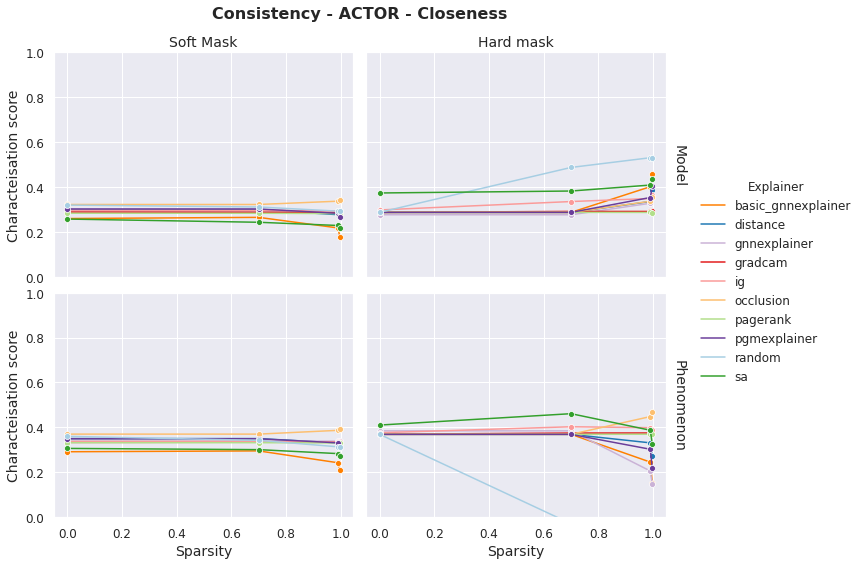

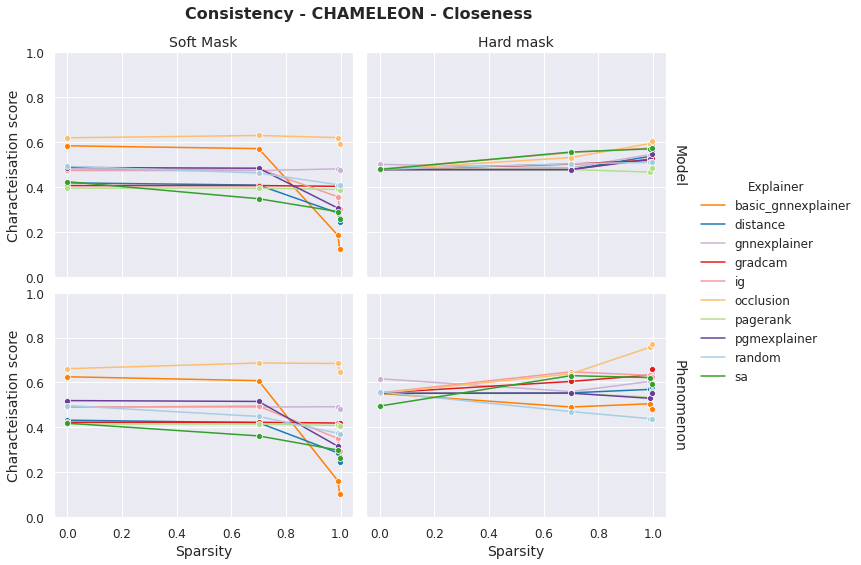

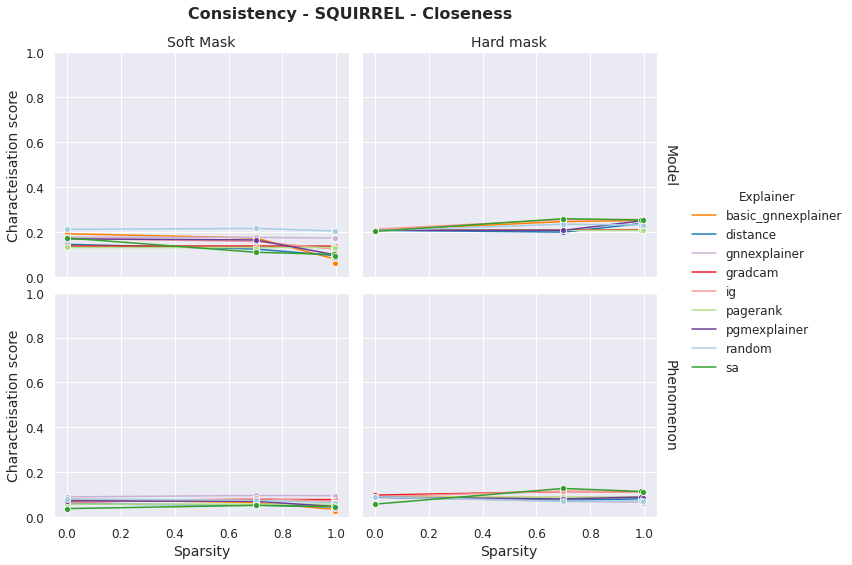

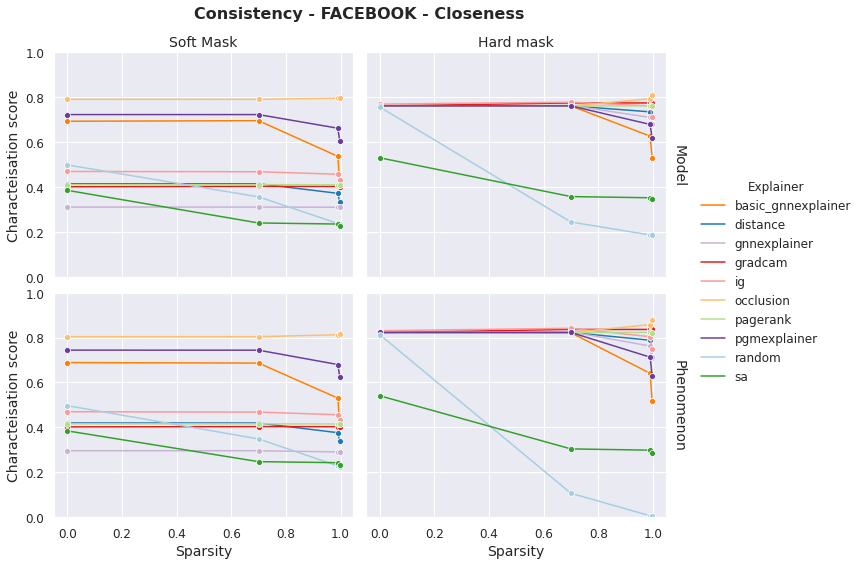

In [59]:
for data in datasets:
    df_gen_data = df_sparsity[df_sparsity['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'sparsity']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.lineplot, x="sparsity", y="charact_prob",
        hue="explainer_name", palette=dict_color, marker="o")
    g.set(ylim=(0,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle('Consistency - '+data.upper()+' - Closeness', fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Sparsity", y_var="Characteisation score")
    
    g.savefig(f'/cluster/home/kamara/Explain/figures/consistency/fig_consistency_{data}.pdf')
    g.savefig(f'/cluster/home/kamara/Explain/figures/consistency/fig_consistency_{data}.png')


# Explain focus: Phenomenon

true_label_as_target = True

In [84]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [85]:
#### Robustness ####
df_sparse = df[df['sparsity'] == 0.997]
df_dense = df[df['sparsity'] == 0]
df_sparse = df_sparse[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact_prob"]].reset_index()
df_dense = df_dense[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact_prob"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], how="outer", suffixes=["_0", "_0.997"])

df_robust["robustness"] = (df_robust["charact_prob_0.997"]-df_robust["charact_prob_0"])/0.997

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset                actor  chameleon  citeseer      cora   cornell  \
explainer_name                                                          
random             -0.236334  -0.123885 -0.568498 -0.578661 -0.414653   
basic_gnnexplainer -0.149592  -0.297537 -0.158539 -0.348315 -0.587110   
pgmexplainer       -0.094414  -0.126485 -0.074687 -0.158436 -0.365555   
distance           -0.061930  -0.081229 -0.072415 -0.182338 -0.352398   
sa                 -0.058351  -0.028234 -0.074103 -0.064410 -0.259057   
ig                  0.002140  -0.060825 -0.031915 -0.086716 -0.338555   
pagerank           -0.000902   0.002221 -0.005872 -0.010379 -0.320941   
gnnexplainer       -0.117754   0.007412 -0.040736 -0.131432 -0.195168   
gradcam             0.002743   0.050371 -0.002275 -0.000958 -0.255108   
occlusion           0.060600   0.102982  0.004160  0.010294 -0.154756   

dataset             facebook    pubmed     texas  wisconsin  robustness  
explainer_name                                                           
random             -0.541997 -0.579182 -0.486966  -0.425432   -0.439512  
basic_gnnexplainer -0.294197 -0.104471 -0.666487  -0.564287   -0.352282  
pgmexplainer       -0.156026 -0.043096 -0.545317  -0.442623   -0.222960  
distance           -0.097686 -0.031035 -0.472659  -0.355681   -0.189708  
sa                 -0.202700 -0.072984 -0.427652  -0.326842   -0.168259  
ig                 -0.060453 -0.015918 -0.423198  -0.328321   -0.149307  
pagerank           -0.001352 -0.000341 -0.412391  -0.376944   -0.125211  
gnnexplainer       -0.059103 -0.026693 -0.194946  -0.176348   -0.103863  
gradcam             0.006787  0.006004 -0.326191  -0.228761   -0.083043  
occlusion           0.033419  0.018361 -0.229518  -0.145447   -0.033323

## Hard mask

In [86]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [97]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.99]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset   explainer_name                                                 
actor     basic_gnnexplainer            0.974814              1534.258   
          distance                      0.000082             60913.001   
          gnnexplainer                  0.974814              1534.257   
          gradcam                       0.492803             30897.398   
          ig                            0.048020             57992.696   
...                                          ...                   ...   
wisconsin occlusion                     0.749971               287.783   
          pagerank                      0.055125              1087.551   
          pgmexplainer                  0.535481               534.661   
          random                        0.001849              1148.872   
          sa                            0.253541               859.174   

                              number_of_edges     time  fidelity_prob+  \
dataset   explainer_name                                                 
actor     basic_gnnexplainer          60918.0  3.91469        0.139534   
          distance                    60918.0  0.76860        0.194389   
          gnnexplainer                60918.0  3.78689        0.111373   
          gradcam                     60918.0  0.00565        0.226693   
          ig                          60918.0  0.24392        0.241164   
...                                       ...      ...             ...   
wisconsin occlusion                    1151.0  0.35863        0.682021   
          pagerank                     1151.0  0.02265        0.603878   
          pgmexplainer                 1151.0  1.53182        0.276529   
          random                       1151.0  0.00010        0.095274   
          sa                           1151.0  0.00325        0.220172   

                              fidelity_prob-  charact_prob  
dataset   explainer_name                                    
actor     basic_gnnexplainer       -0.024815      0.245625  
          distance                 -0.120551      0.331305  
          gnnexplainer             -0.369867      0.205999  
          gradcam                  -0.087832      0.375198  
          ig                       -0.151676      0.398815  
...                                      ...           ...  
wisconsin occlusion                -0.119065      0.847517  
          pagerank                  0.129569      0.713058  
          pgmexplainer             -0.009635      0.434149  
          random                    0.665632      0.148294  
          sa                        0.335824      0.330713  

[90 rows x 7 columns]

In [98]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset                actor  chameleon  citeseer      cora   cornell  \
explainer_name                                                          
random              0.001016   0.001016  0.001075  0.001062  0.002361   
distance            0.000082   0.000116  0.504017  0.127154  0.008383   
ig                  0.048020   0.006041  0.549513  0.298315  0.051065   
sa                  0.524559   0.278372  0.625508  0.684542  0.223597   
pagerank            0.727567   0.594013  0.942985  0.841859  0.038231   
gradcam             0.492803   0.257936  0.889183  0.828816  0.482890   
pgmexplainer        0.900942   0.710803  0.987207  0.969662  0.520543   
occlusion           0.974814   0.770067  0.994040  0.986681  0.718643   
basic_gnnexplainer  0.974814   0.770067  0.994040  0.986681  0.718643   
gnnexplainer        0.974814   0.770067  0.994040  0.986681  0.718643   

dataset             facebook    pubmed     texas  wisconsin  mean_sparsity  
explainer_name                                                              
random              0.001005  0.001013  0.002366   0.001849       0.001418  
distance            0.000030  0.000082  0.008001   0.011982       0.073316  
ig                  0.054913  0.137702  0.049003   0.026212       0.135643  
sa                  0.167691  0.477494  0.198242   0.253541       0.381505  
pagerank            0.934797  0.949610  0.033312   0.055125       0.568611  
gradcam             0.648733  0.815990  0.558366   0.491467       0.607354  
pgmexplainer        0.948724  0.986518  0.416190   0.535481       0.775119  
occlusion           0.978489  0.996743  0.617054   0.749971       0.865167  
basic_gnnexplainer  0.978489  0.996743  0.617054   0.749971       0.865167  
gnnexplainer        0.978489  0.996743  0.617054   0.749971       0.865167

In [99]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset                actor  chameleon  citeseer      cora  cornell  \
explainer_name                                                         
random               0.00059    0.00060   0.00020   0.00020  0.00010   
gradcam              0.00565    0.00509   0.00476   0.00439  0.00385   
sa                   0.02321    0.00979   0.04241   0.00856  0.00265   
ig                   0.24392    0.18808   0.31959   0.16143  0.11776   
distance             0.76860    0.56058   0.81968   0.28486  0.01487   
pagerank             0.87279    0.66055   0.84277   0.30526  0.01679   
gnnexplainer         3.78689    3.96014   3.59842   3.58246  3.61058   
basic_gnnexplainer   3.91469    4.07237   3.60585   3.63136  3.66291   
occlusion            3.16015   20.96687   0.92460   0.55387  0.24634   
pgmexplainer        32.47842   14.80158  20.29606  11.68799  1.17394   

dataset             facebook    pubmed    texas  wisconsin  mean_time  
explainer_name                                                         
random               0.00281   0.00092  0.00010    0.00010   0.000624  
gradcam              0.01009   0.00635  0.00365    0.00381   0.005293  
sa                   0.01102   0.03589  0.00264    0.00325   0.015491  
ig                   0.25091   0.29790  0.11785    0.11999   0.201937  
distance             1.84600   1.27501  0.01439    0.02300   0.622999  
pagerank             2.44525   1.48120  0.01611    0.02265   0.740374  
gnnexplainer         3.77889   3.57277  3.66644    3.70062   3.695246  
basic_gnnexplainer   3.79484   3.77216  3.78864    3.67534   3.768684  
occlusion           21.34357   2.30386  0.33359    0.35863   5.576831  
pgmexplainer        89.19425  81.96266  1.26969    1.53182  28.266268

In [100]:
#### Average characterization power among datasets for sparsity=0.99 ####
df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset                actor  chameleon  citeseer      cora   cornell  \
explainer_name                                                          
random             -0.055086   0.438967 -0.034549 -0.016137  0.166531   
sa                  0.387377   0.621734  0.673571  0.766987  0.397072   
basic_gnnexplainer  0.245625   0.505356  0.799015  0.711944  0.281422   
pgmexplainer        0.302805   0.529373  0.839233  0.837596  0.534921   
distance            0.331305   0.569252  0.848012  0.847165  0.537389   
gnnexplainer        0.205999   0.604724  0.850433  0.793276  0.668764   
ig                  0.398815   0.631463  0.864663  0.843251  0.662138   
pagerank            0.369586   0.534911  0.868754  0.888114  0.682669   
gradcam             0.375198   0.633213  0.874434  0.900165  0.790034   
occlusion           0.448255   0.756853  0.872464  0.901857  0.867784   

dataset             facebook    pubmed     texas  wisconsin  mean_charact  
explainer_name                                                             
random              0.006778 -0.235821  0.069019   0.148294      0.054222  
sa                  0.298743  0.312722  0.354429   0.330713      0.460372  
basic_gnnexplainer  0.640434  0.655446  0.160926   0.212275      0.468049  
pgmexplainer        0.712545  0.678523  0.404788   0.434149      0.585992  
distance            0.788024  0.692339  0.360451   0.435375      0.601035  
gnnexplainer        0.761905  0.699150  0.624266   0.720187      0.658745  
ig                  0.803662  0.702971  0.640976   0.666060      0.690444  
pagerank            0.822621  0.693369  0.700612   0.713058      0.697077  
gradcam             0.835995  0.706063  0.745842   0.763252      0.736022  
occlusion           0.857294  0.706598  0.841268   0.847517      0.788877

In [91]:
#### Average characterization power for Cora according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact_prob', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity                 0.0       0.7      0.99     0.997  mean_charact
explainer_name                                                          
random              0.875991  0.105070 -0.016137 -0.020021      0.236226
basic_gnnexplainer  0.888239  0.888239  0.711944  0.443845      0.733067
sa                  0.835790  0.773156  0.766987  0.756765      0.783175
gnnexplainer        0.900588  0.900763  0.793276  0.635040      0.807417
distance            0.888239  0.888239  0.847165  0.676374      0.825004
pgmexplainer        0.888063  0.888063  0.837596  0.692441      0.826541
ig                  0.893199  0.903876  0.843251  0.781939      0.855566
pagerank            0.888239  0.888239  0.888114  0.885272      0.887466
gradcam             0.889261  0.900203  0.900165  0.896610      0.896560
occlusion           0.888239  0.888239  0.901857  0.910674      0.897252

### Analysis after mask tranformation

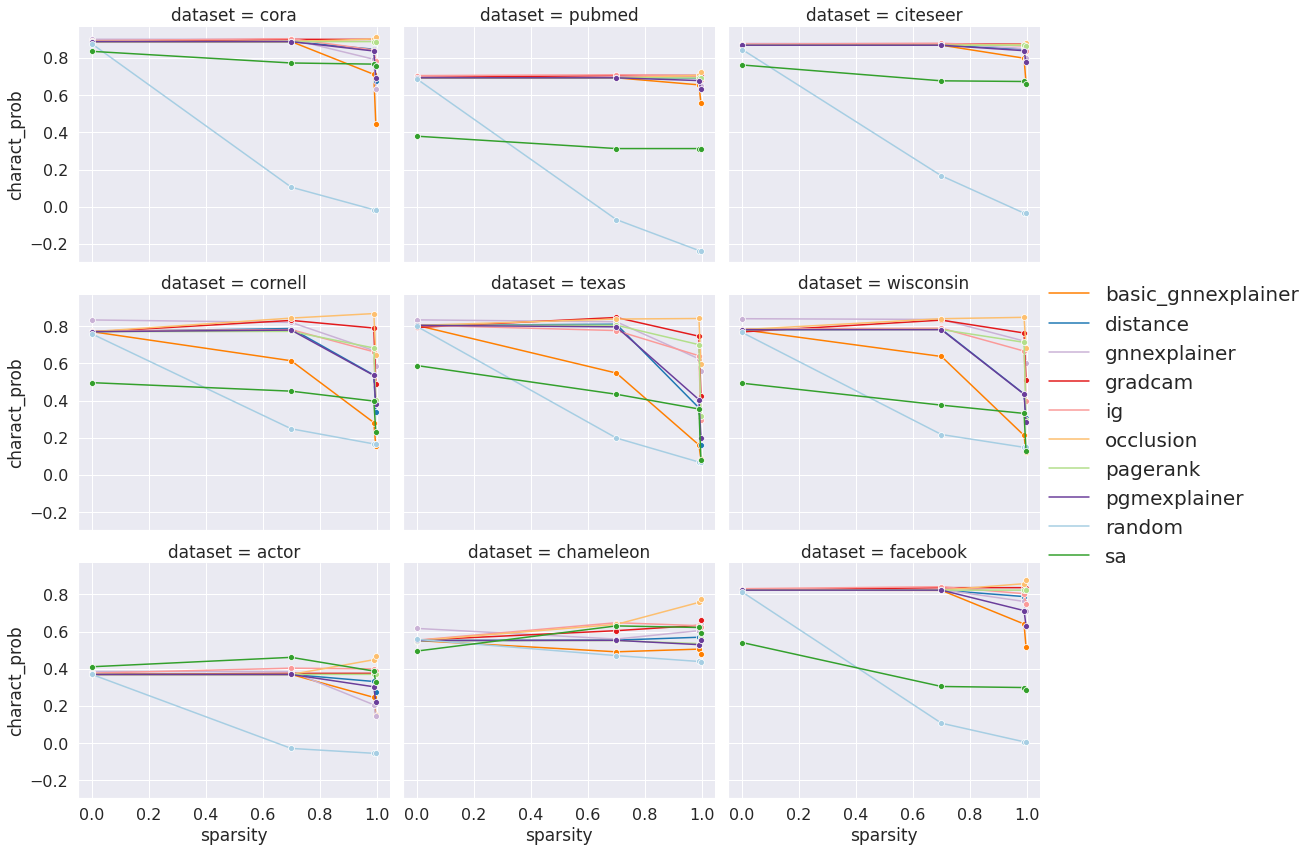

In [92]:
g = sns.FacetGrid(df_hard, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="sparsity", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o")

g.add_legend()

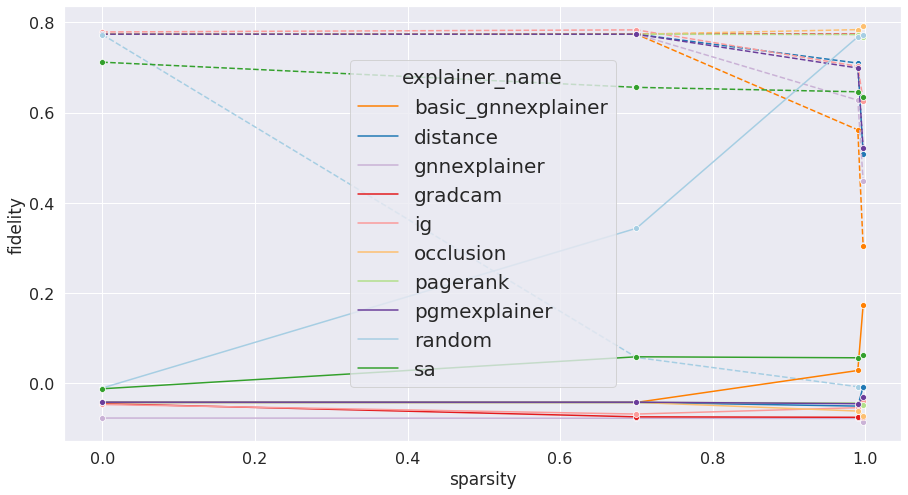

In [30]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

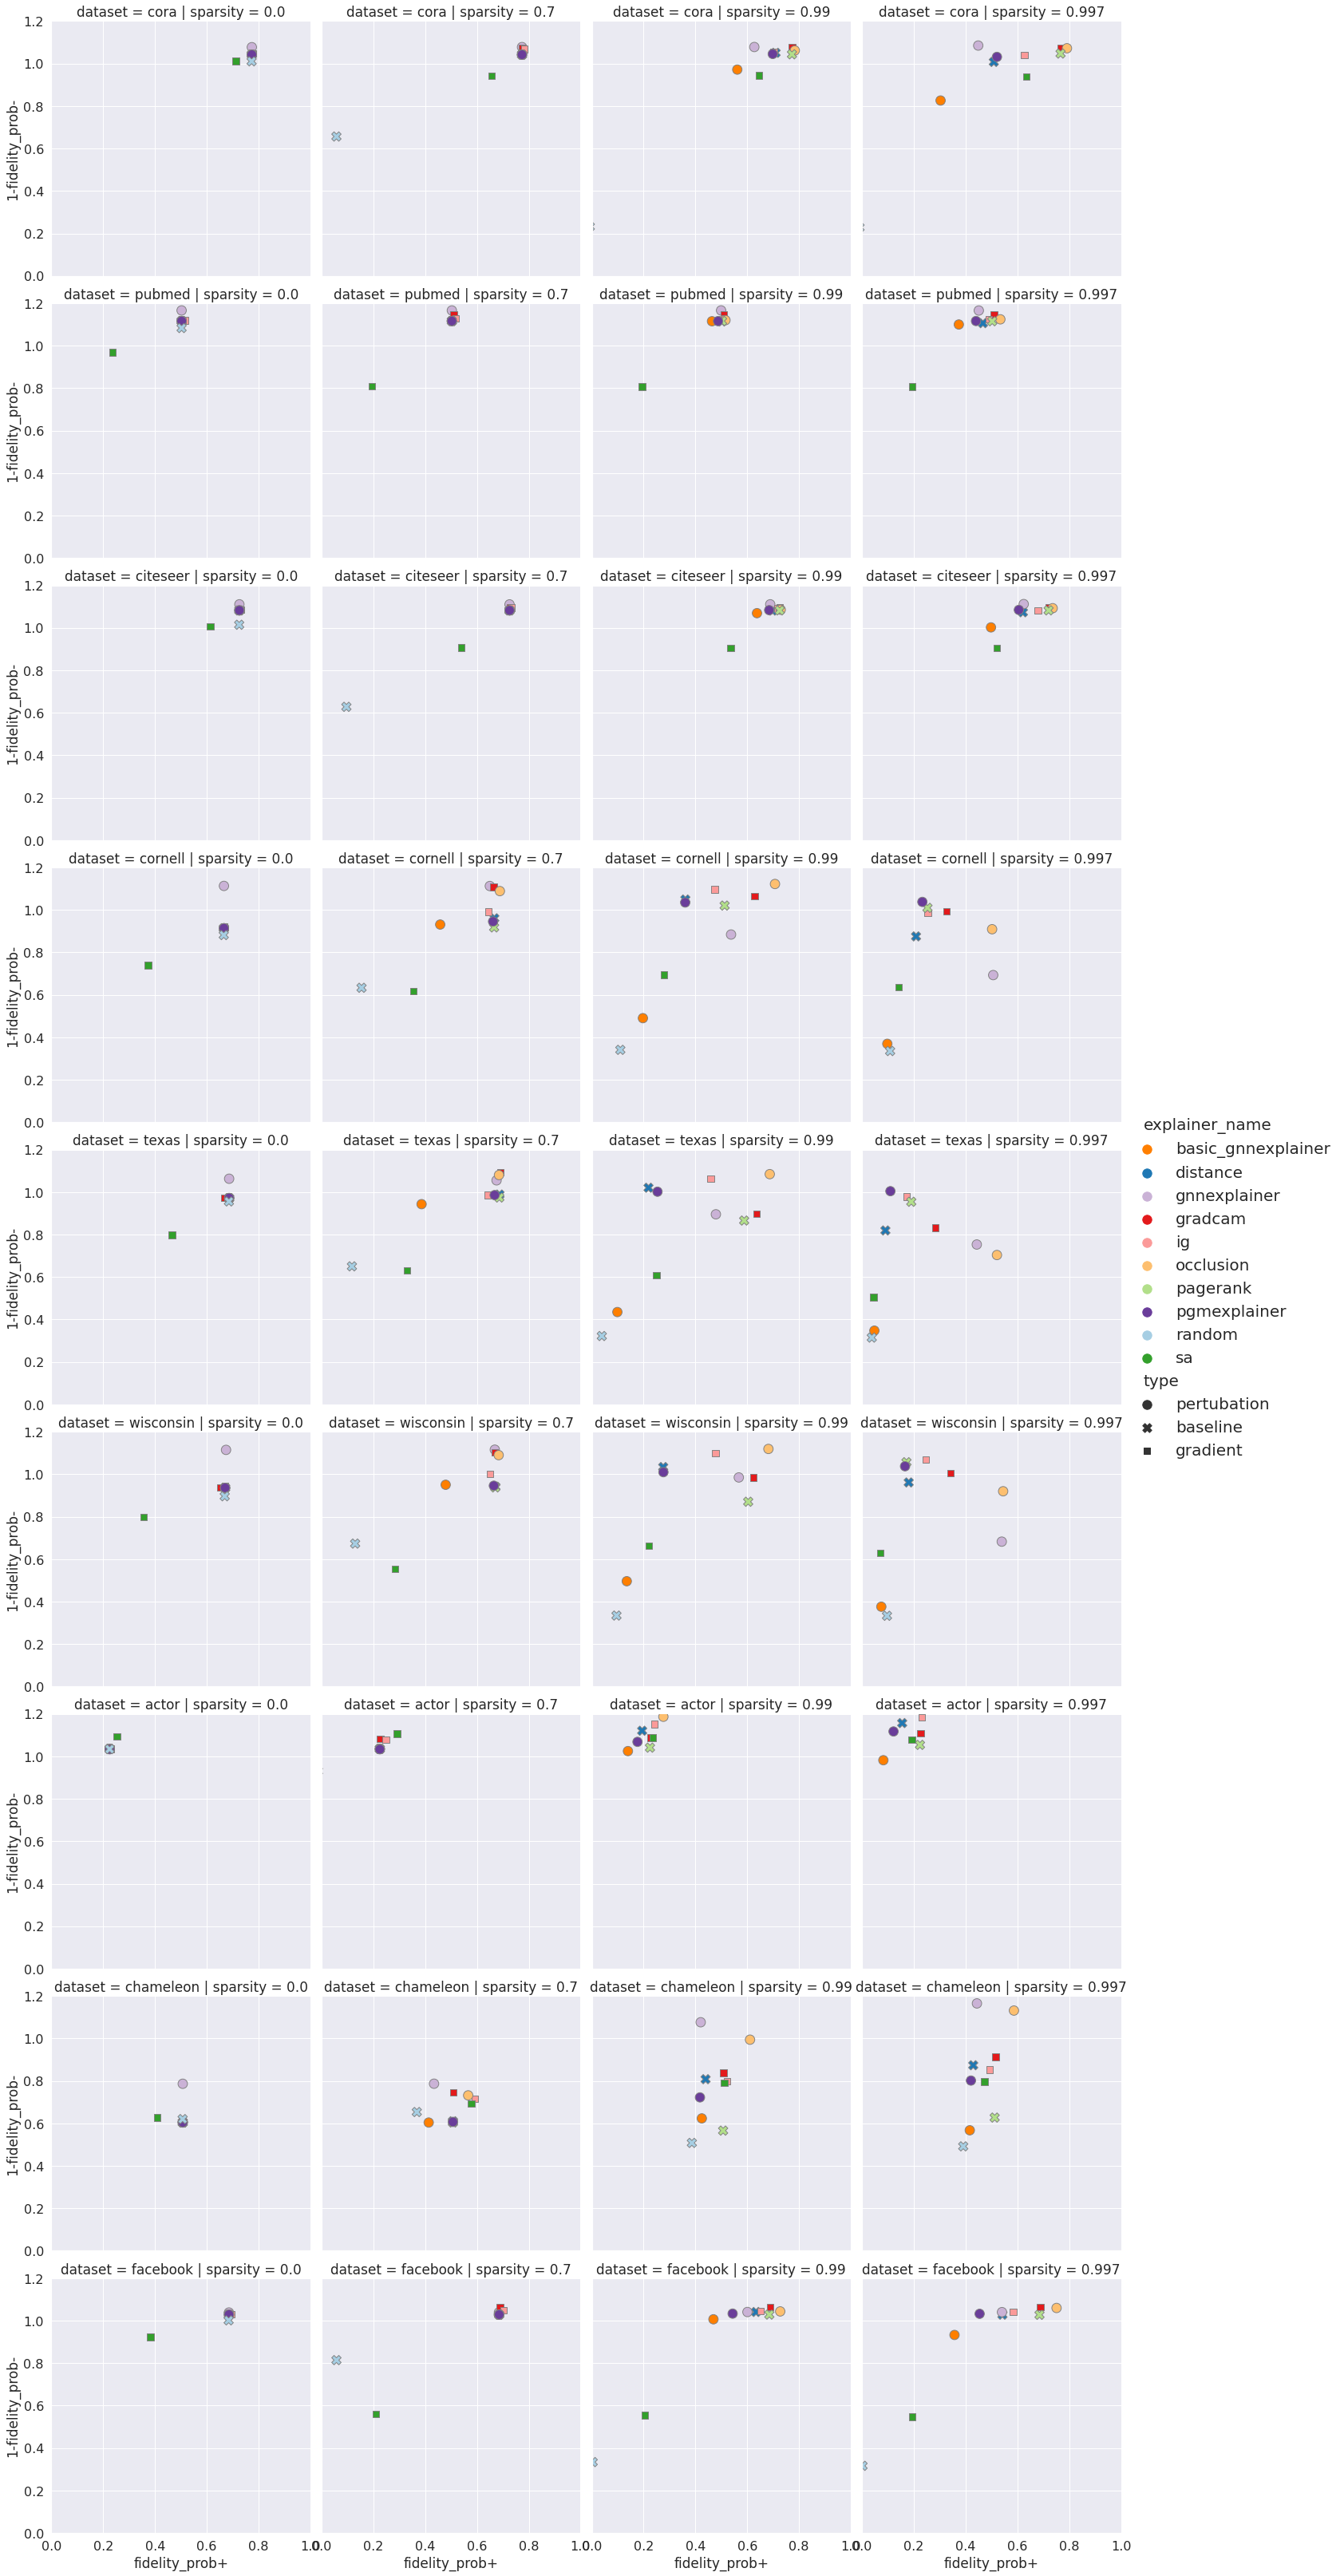

In [31]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
    data=df_hard,
    x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
    hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
)
plt.xlim(0, 1)
plt.ylim(0, 1.2)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 
    

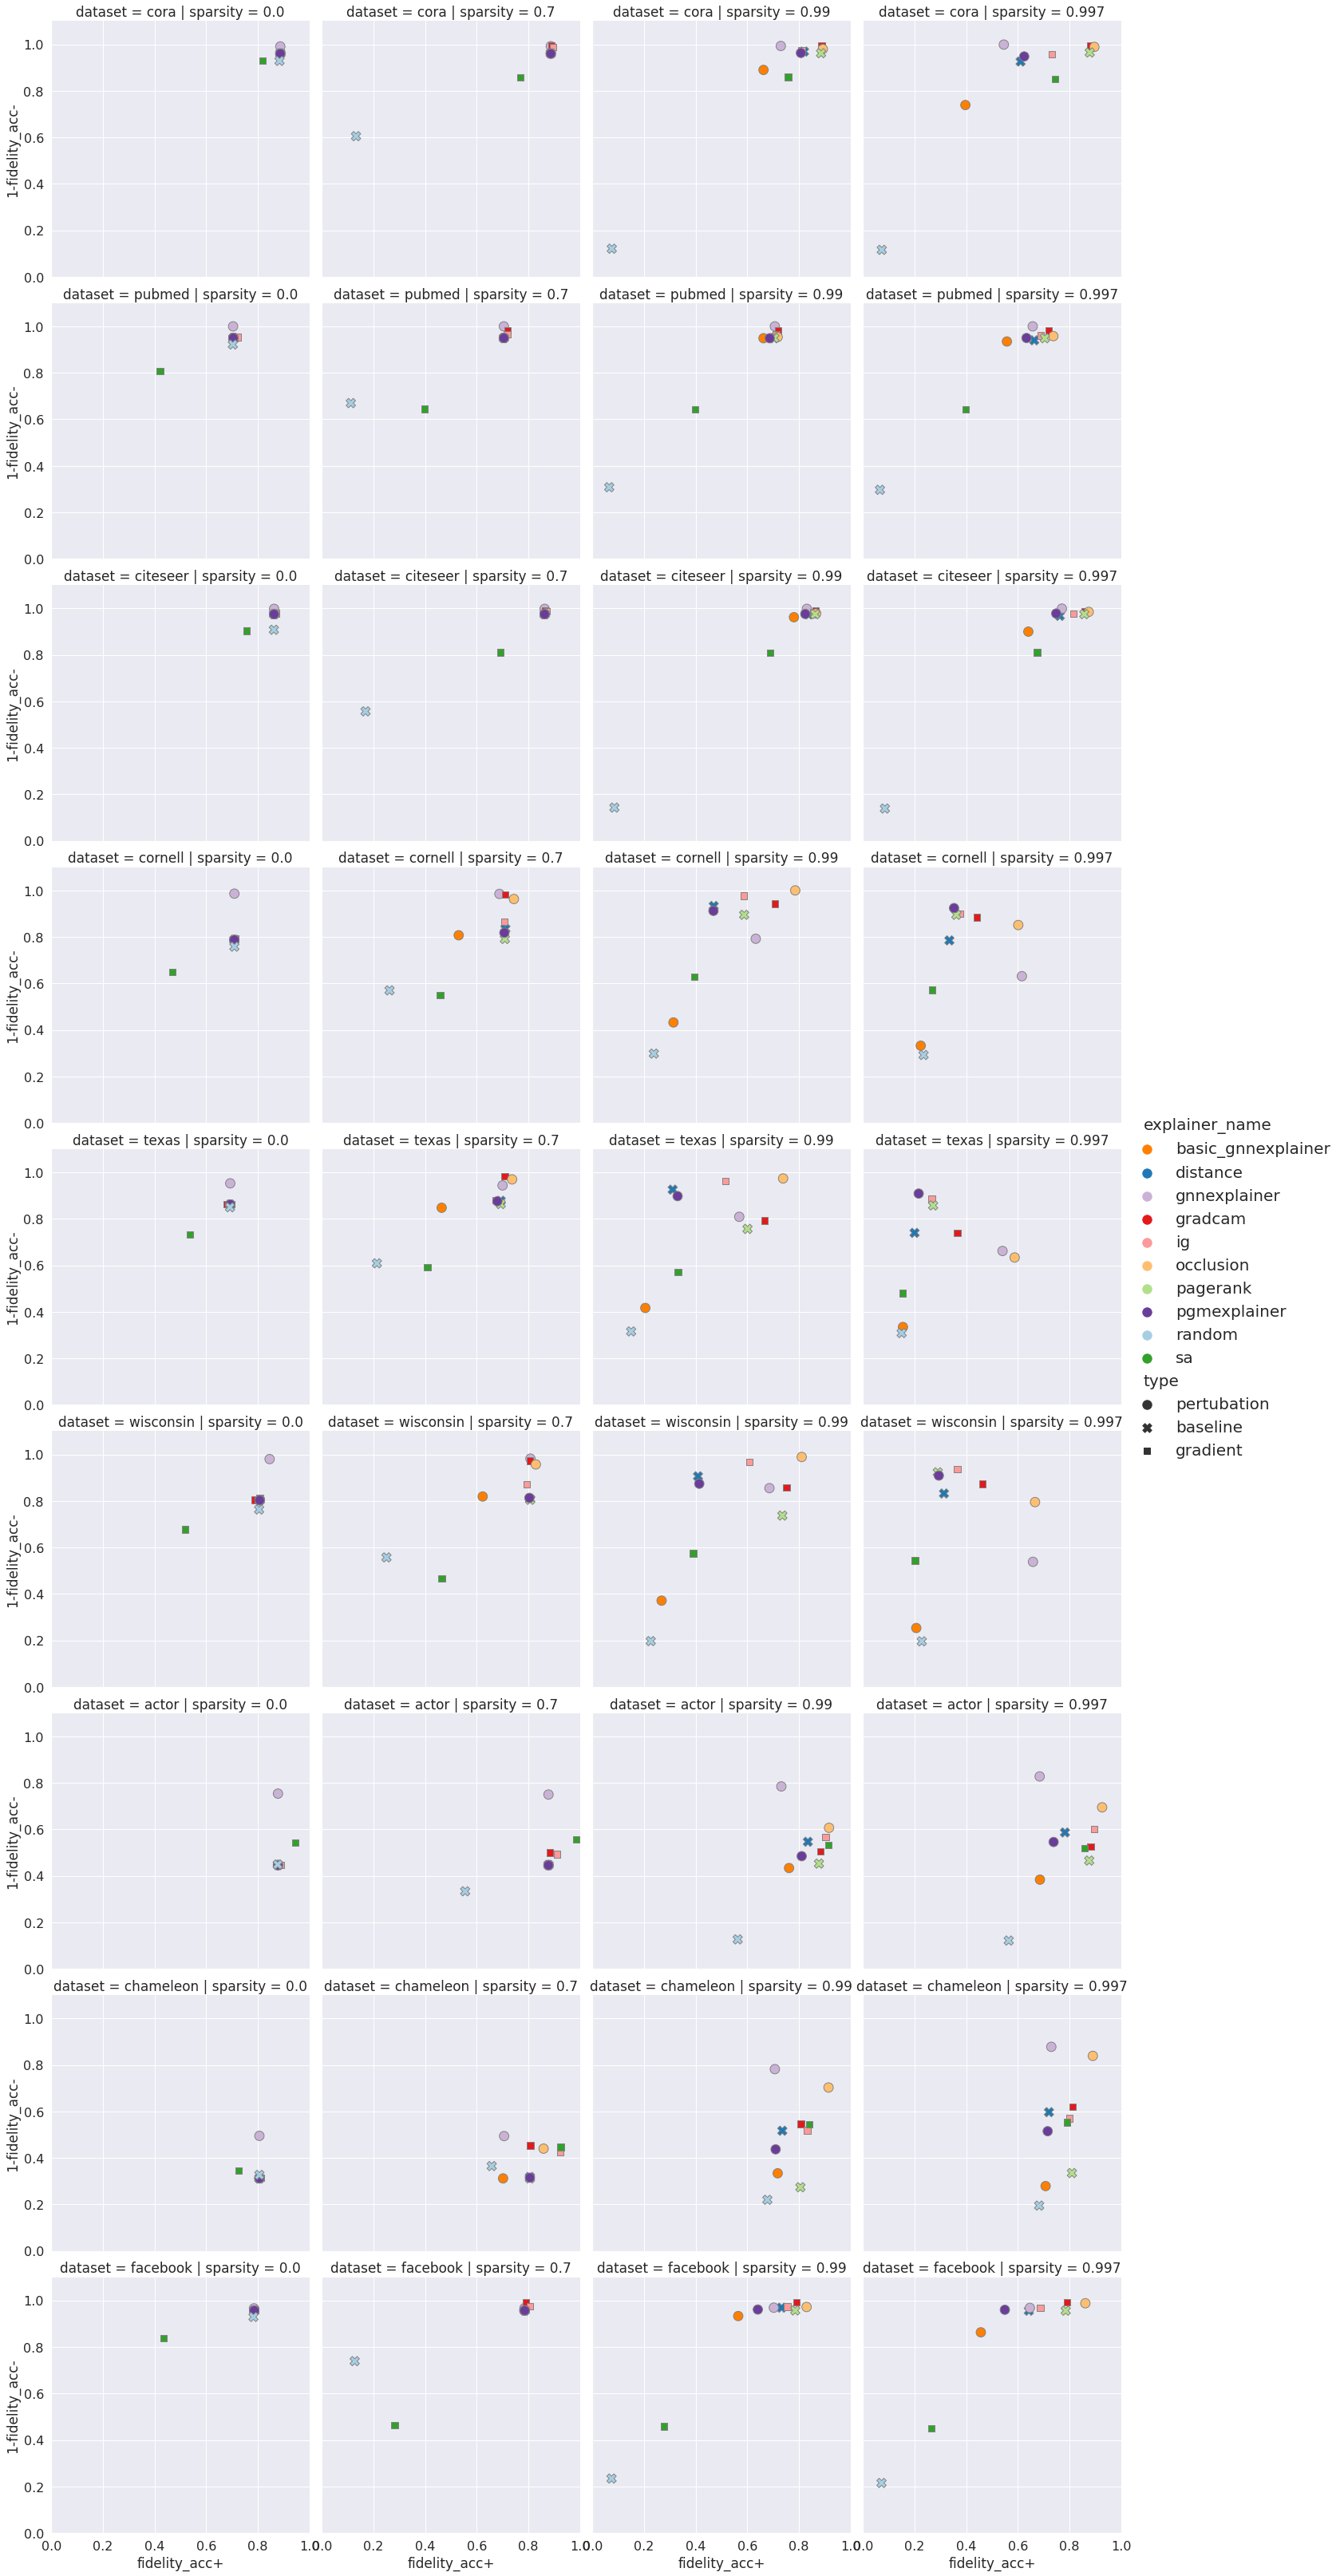

In [32]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 


## Soft mask

In [45]:
df_soft = df[df.hard_mask==False]

In [48]:
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.99]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob', 'charact_acc']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset                actor  chameleon  citeseer      cora   cornell  \
explainer_name                                                          
random              0.313744   0.374111  0.240157  0.212136  0.268057   
basic_gnnexplainer  0.242771   0.162825  0.402184  0.352245  0.153982   
sa                  0.283471   0.299337  0.615627  0.683148  0.381541   
distance            0.331095   0.286781  0.623451  0.569346  0.518677   
gnnexplainer        0.338726   0.491967  0.571812  0.443439  0.467227   
ig                  0.334770   0.350760  0.680468  0.628912  0.617543   
gradcam             0.333847   0.419547  0.604712  0.564758  0.642710   
pagerank            0.330801   0.408748  0.687412  0.640748  0.633161   
pgmexplainer        0.331353   0.316195  0.791530  0.775527  0.600649   
occlusion           0.386953   0.684507  0.811834  0.851072  0.746720   

dataset             facebook    pubmed     texas  wisconsin  mean_charact  
explainer_name                                                             
random              0.228677  0.249842  0.253608   0.270303      0.267849  
basic_gnnexplainer  0.530248  0.433842  0.130872   0.137054      0.282891  
sa                  0.243020  0.330017  0.352551   0.339588      0.392033  
distance            0.376486  0.469557  0.377327   0.425954      0.442075  
gnnexplainer        0.290893  0.495883  0.446950   0.480578      0.447497  
ig                  0.456423  0.523769  0.470143   0.537023      0.511090  
gradcam             0.403276  0.493308  0.581061   0.591246      0.514941  
pagerank            0.415354  0.523888  0.600203   0.597165      0.537498  
pgmexplainer        0.679786  0.623254  0.444345   0.479049      0.560188  
occlusion           0.812314  0.659600  0.697211   0.749075      0.711032

In [50]:
#### Average characterization power for Cora according to sparsity ####
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
res_init = df1[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob', 'charact_acc']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact_prob', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact_prob'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact_prob'])

sparsity                 0.0       0.7      0.99     0.997  mean_charact_prob
explainer_name                                                               
random              0.467820  0.324348  0.212136  0.209981           0.303571
basic_gnnexplainer  0.483714  0.476205  0.352245  0.233566           0.386432
gnnexplainer        0.442843  0.442427  0.443439  0.446315           0.443756
gradcam             0.566632  0.566965  0.564758  0.557374           0.563932
distance            0.623081  0.623081  0.569346  0.471364           0.571718
ig                  0.657790  0.657619  0.628912  0.596140           0.635115
pagerank            0.646587  0.646587  0.640748  0.628857           0.640695
sa                  0.715885  0.691407  0.683148  0.666477           0.689229
pgmexplainer        0.812681  0.812681  0.775527  0.692381           0.773318
occlusion           0.848447  0.848447  0.851072  0.846538           0.848626

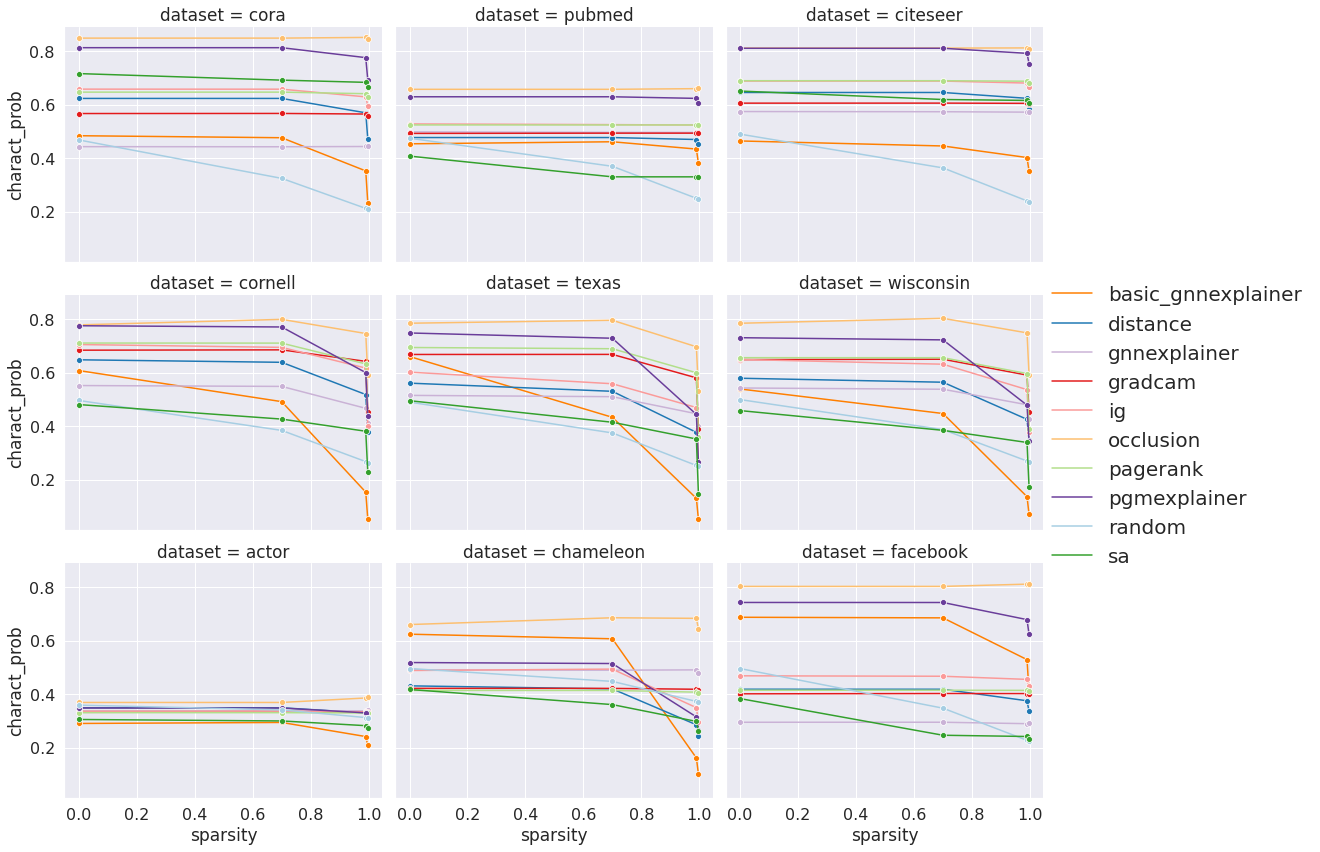

In [51]:
g = sns.FacetGrid(df_soft, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="sparsity", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o")

g.add_legend()

<AxesSubplot:xlabel='sparsity', ylabel='charact_prob'>

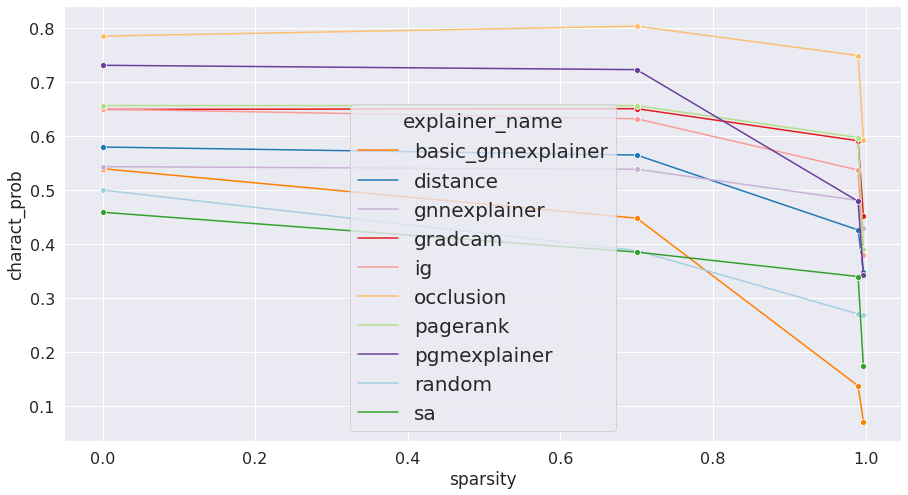

In [52]:
dataset_name = "wisconsin"

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_soft[df_soft.dataset==dataset_name],
    x="sparsity", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


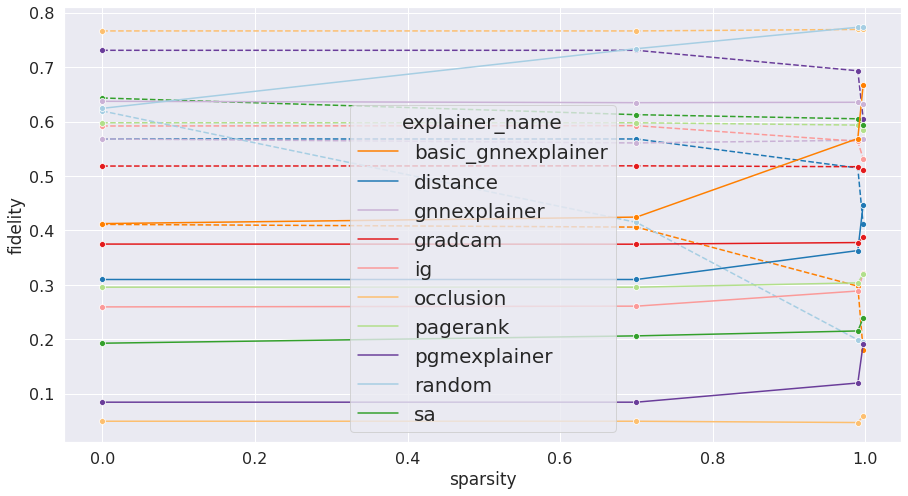

In [53]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

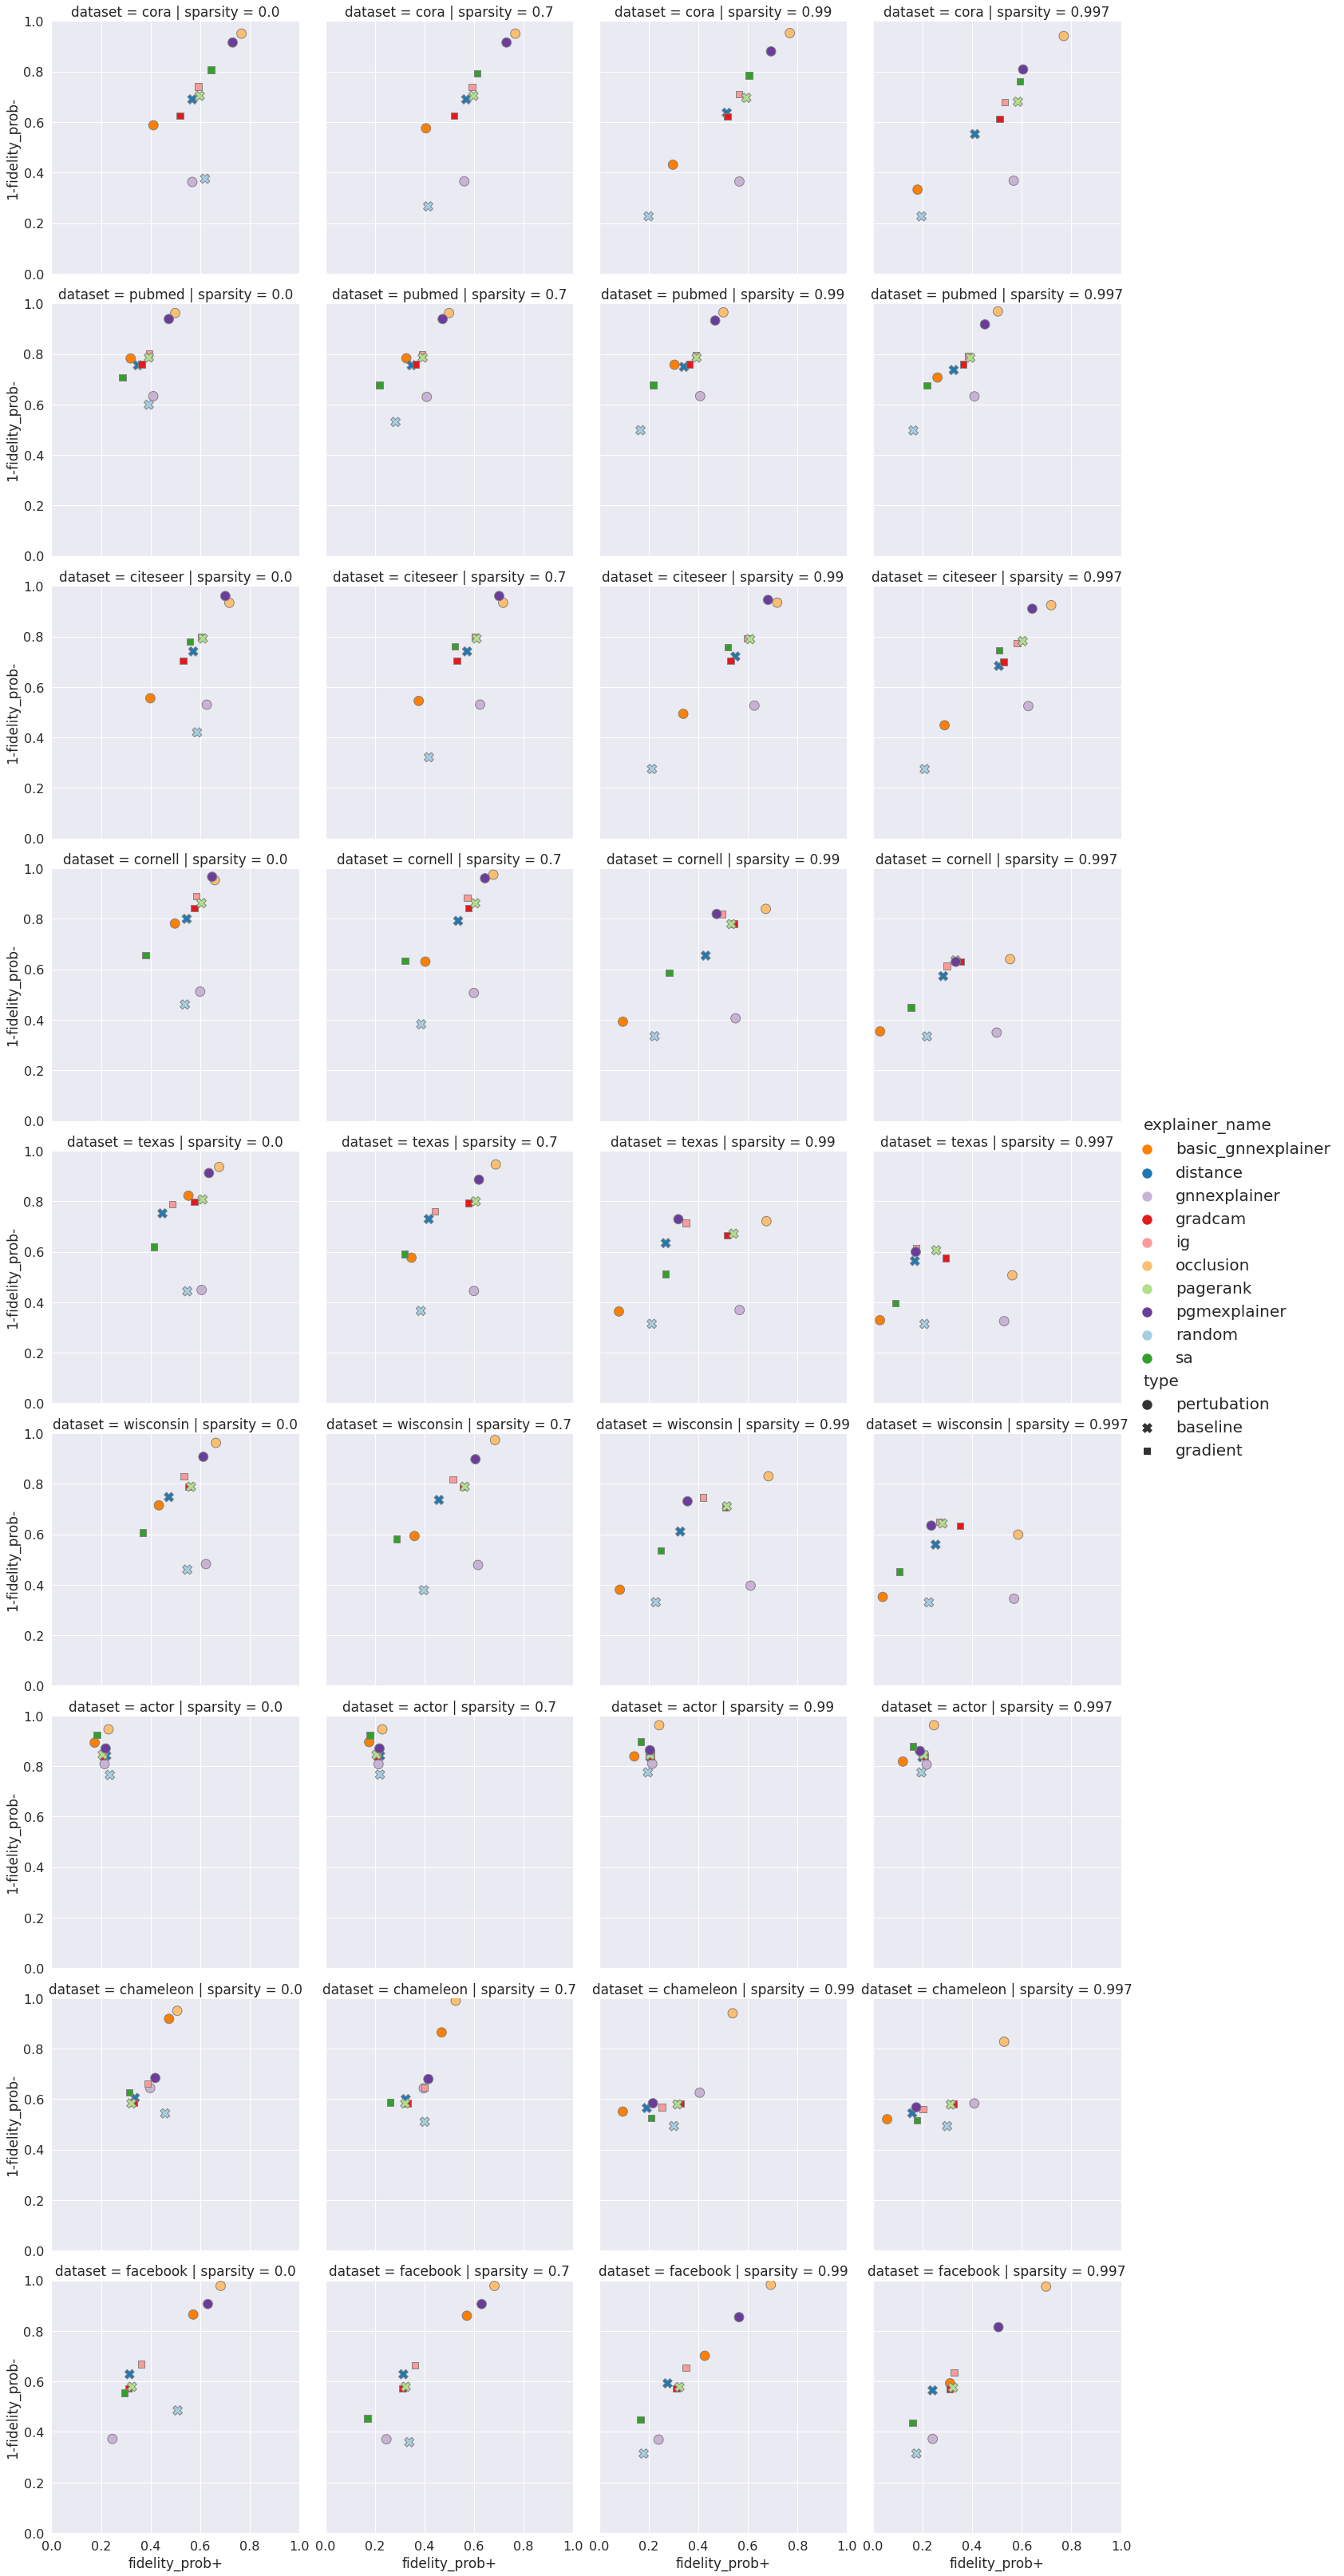

In [54]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

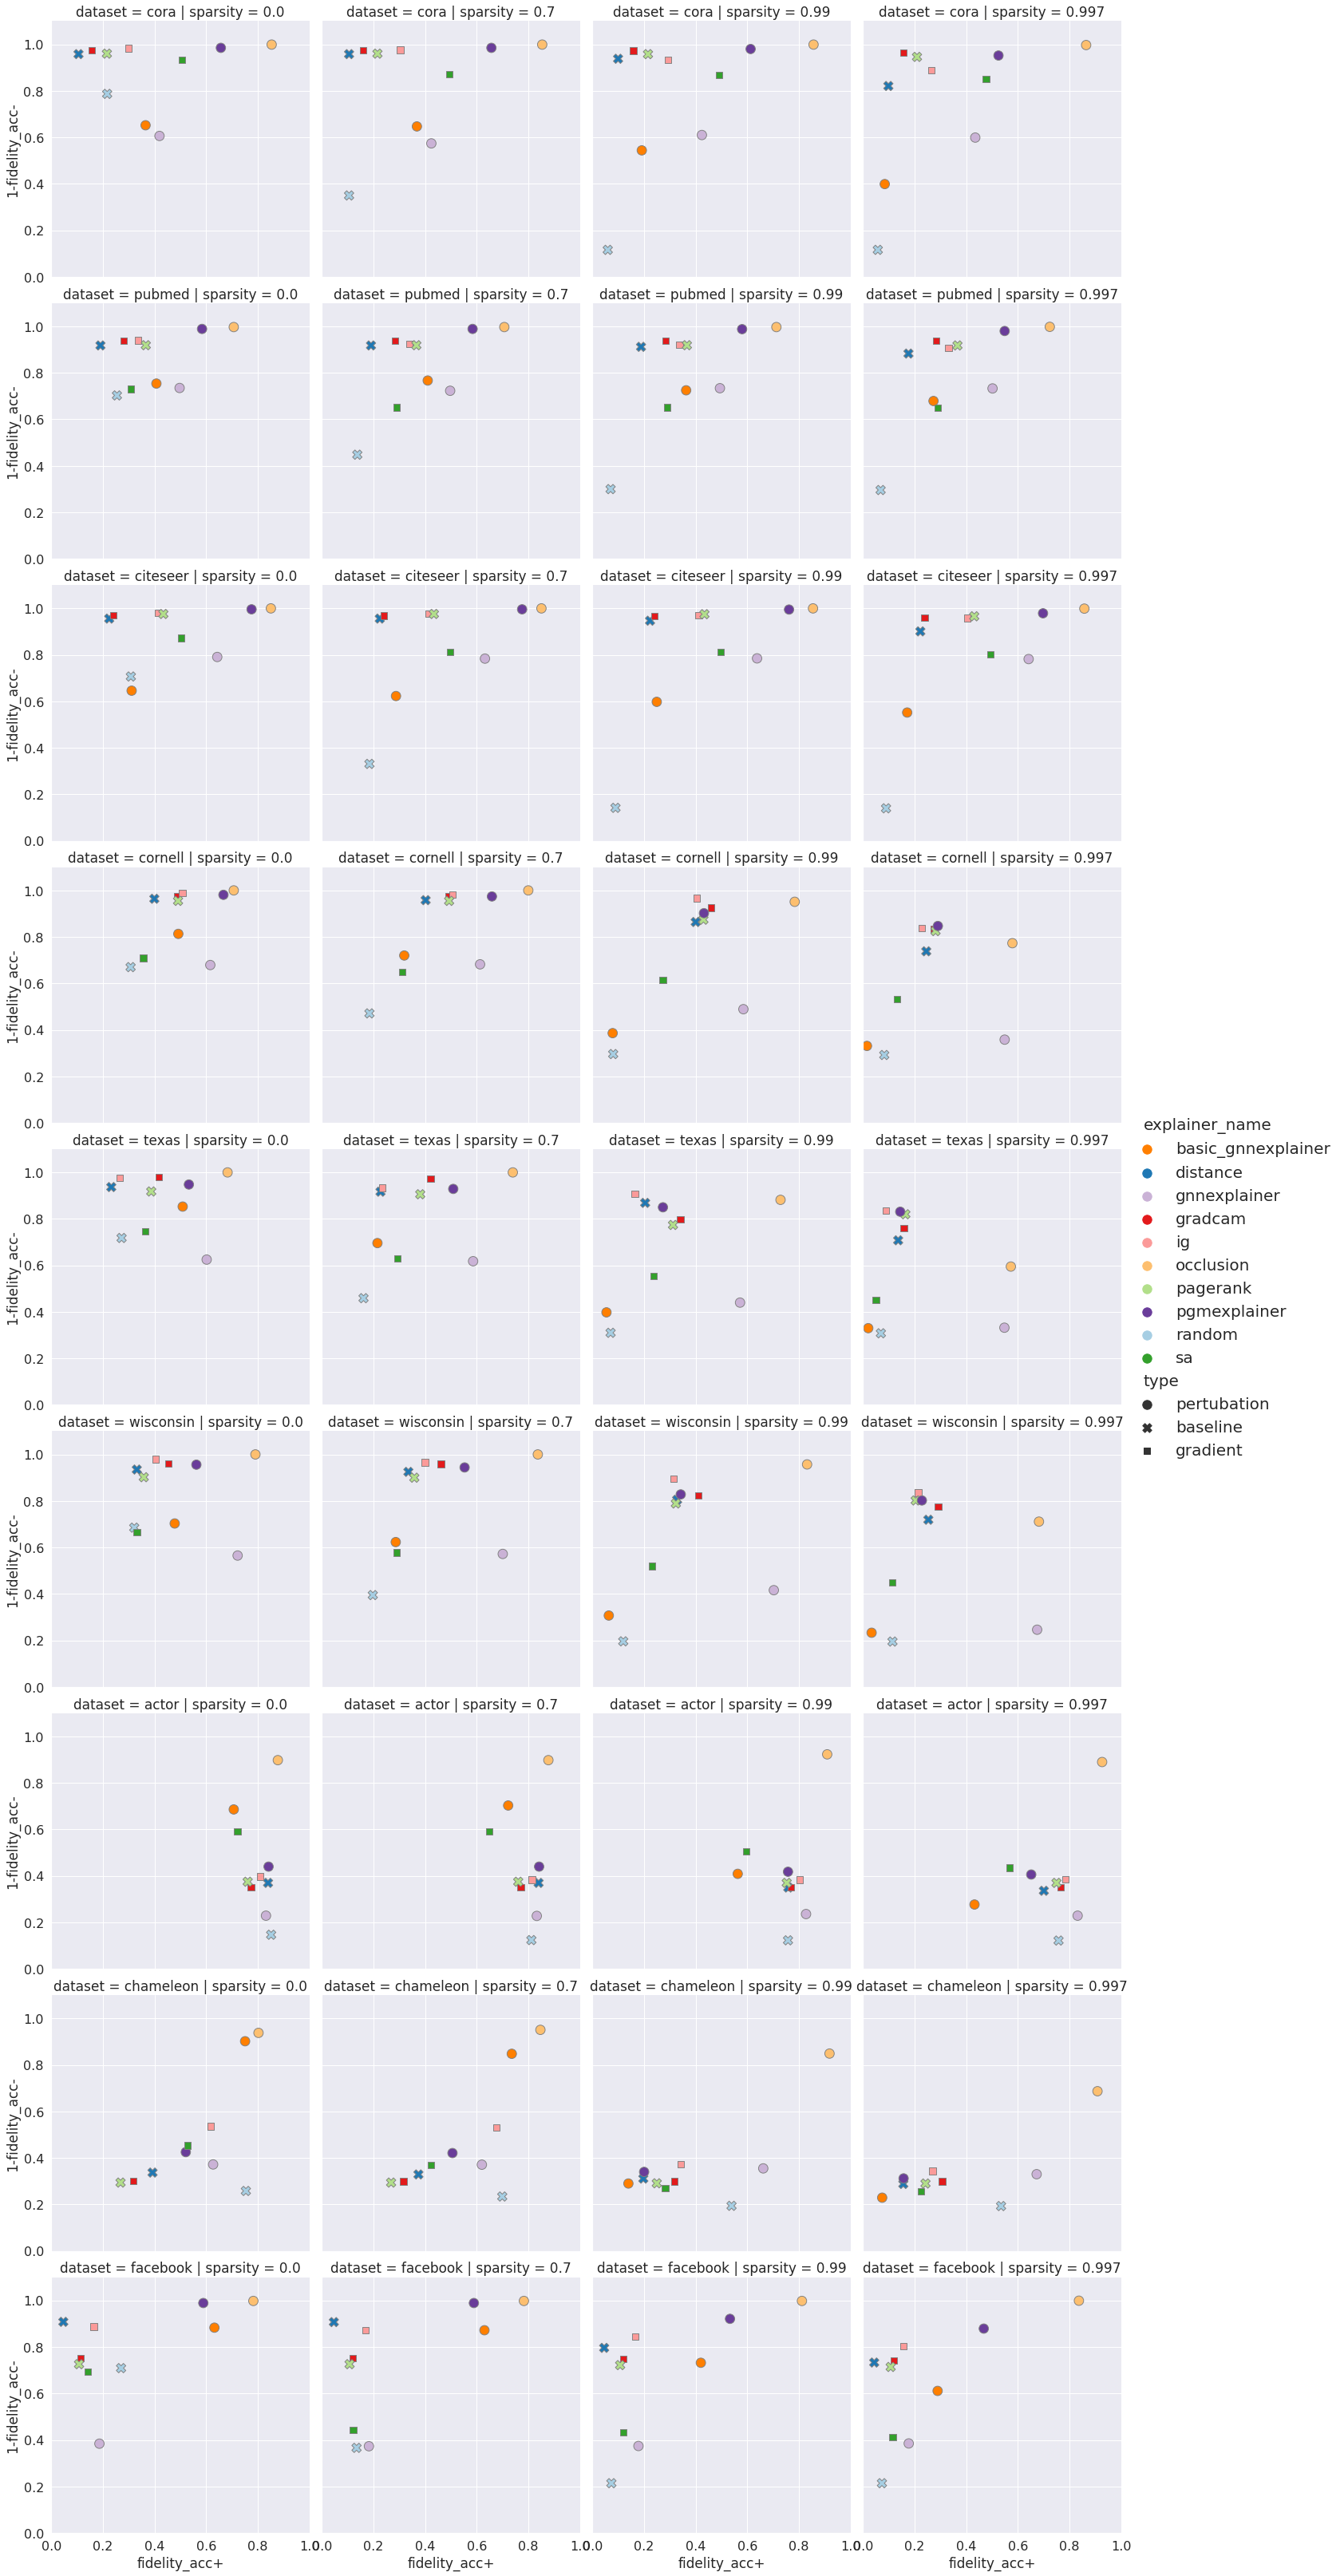

In [55]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Explain focus: GNN model

true_label_as_target = False

In [56]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False].reset_index()

In [60]:
df_gnn

index   dataset  true_label_as_target  hard_mask  sparsity  \
0        0      cora                 False      False     0.000   
1        1      cora                 False      False     0.000   
2        2      cora                 False      False     0.000   
3        3      cora                 False      False     0.000   
4        4      cora                 False      False     0.000   
..     ...       ...                   ...        ...       ...   
715   1355  facebook                 False       True     0.997   
716   1356  facebook                 False       True     0.997   
717   1357  facebook                 False       True     0.997   
718   1358  facebook                 False       True     0.997   
719   1359  facebook                 False       True     0.997   

         explainer_name  num_test  fidelity_acc+  fidelity_acc-  \
0    basic_gnnexplainer     100.0           -1.0           -1.0   
1              distance     100.0           -1.0           -1.0   
2          gnnexplainer     100.0           -1.0           -1.0   
3               gradcam     100.0           -1.0           -1.0   
4                    ig     100.0           -1.0           -1.0   
..                  ...       ...            ...            ...   
715           occlusion     100.0           -1.0           -1.0   
716            pagerank     100.0           -1.0           -1.0   
717        pgmexplainer     100.0           -1.0           -1.0   
718              random     100.0           -1.0           -1.0   
719                  sa     100.0           -1.0           -1.0   

     fidelity_prob+  ...  non_zero_values_init         type  1-fidelity_acc-  \
0              -1.0  ...               164.210  pertubation              2.0   
1              -1.0  ...             11640.092     baseline              2.0   
2              -1.0  ...               164.208  pertubation              2.0   
3              -1.0  ...              3161.393     gradient              2.0   
4              -1.0  ...              9923.491     gradient              2.0   
..              ...  ...                   ...          ...              ...   
715            -1.0  ...              7614.639  pertubation              2.0   
716            -1.0  ...             23639.759     baseline              2.0   
717            -1.0  ...             18994.810  pertubation              2.0   
718            -1.0  ...            363750.718     baseline              2.0   
719            -1.0  ...            310683.082     gradient              2.0   

     1-fidelity_prob-  charact_prob  charact_acc  1-fidelity_gnn_acc-  \
0                 2.0          -4.0         -4.0                0.621   
1                 2.0          -4.0         -4.0                0.932   
2                 2.0          -4.0         -4.0                0.627   
3                 2.0          -4.0         -4.0                0.964   
4                 2.0          -4.0         -4.0                0.969   
..                ...           ...          ...                  ...   
715               2.0          -4.0         -4.0                0.977   
716               2.0          -4.0         -4.0                0.940   
717               2.0          -4.0         -4.0                0.950   
718               2.0          -4.0         -4.0                0.227   
719               2.0          -4.0         -4.0                0.441   

     1-fidelity_gnn_prob-  charact_gnn_prob  charact_gnn_acc  
0                0.586786          0.464382         0.468397  
1                0.688117          0.604567         0.276022  
2                0.398118          0.458914         0.551984  
3                0.634535          0.558193         0.351586  
4                0.735063          0.633699         0.500081  
..                    ...               ...              ...  
715              0.907229          0.810480         0.904490  
716              0.887947          0.763006         0

## Hard mask

In [57]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [66]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.sparsity==0.99]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-', 'charact_gnn_prob', 'charact_gnn_acc']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact_gnn_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact_gnn_prob'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact_gnn_prob'])

dataset                actor  chameleon  citeseer      cora   cornell  \
explainer_name                                                          
random              0.531181   0.510278  0.223540  0.192825  0.323105   
sa                  0.409507   0.570610  0.629679  0.712799  0.499907   
basic_gnnexplainer  0.402120   0.526411  0.703240  0.681092  0.414610   
pgmexplainer        0.354021   0.524215  0.726445  0.754299  0.608087   
distance            0.336288   0.537314  0.732010  0.757955  0.593063   
gnnexplainer        0.328379   0.545074  0.716938  0.720208  0.628339   
pagerank            0.287647   0.467226  0.747465  0.789767  0.649634   
ig                  0.349728   0.574526  0.748599  0.759321  0.649489   
gradcam             0.292010   0.519507  0.750170  0.797238  0.713973   
occlusion           0.337454   0.594420  0.751910  0.804085  0.759751   

dataset             facebook    pubmed     texas  wisconsin  \
explainer_name                                                
random              0.187381  0.277025  0.280695   0.315652   
sa                  0.352918  0.412625  0.462164   0.462220   
basic_gnnexplainer  0.627150  0.596921  0.346018   0.391371   
pgmexplainer        0.679232  0.605625  0.546475   0.556062   
distance            0.735337  0.610779  0.518440   0.545394   
gnnexplainer        0.710423  0.608247  0.619271   0.670437   
pagerank            0.761711  0.610893  0.668056   0.657622   
ig                  0.761807  0.639089  0.669114   0.669235   
gradcam             0.774909  0.616663  0.719299   0.707834   
occlusion           0.793484  0.619969  0.770427   0.761317   

dataset             mean_charact_gnn_prob  
explainer_name                             
random                           0.315742  
sa                               0.501381  
basic_gnnexplainer               0.520993  
pgmexplainer                     0.594940  
distance                         0.596287  
gnnexplainer                     0.616368  
pagerank                         0.626669  
ig                               0.646767  
gradcam                          0.654623  
occlusion                        0.688091

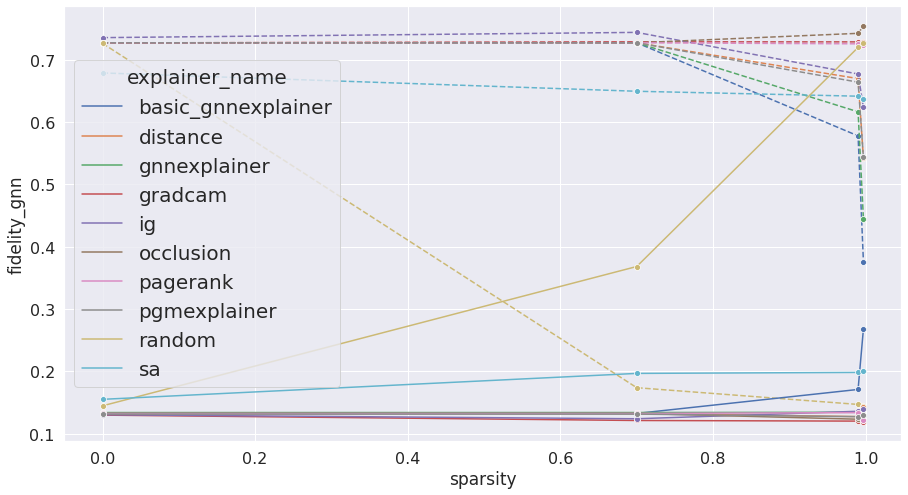

In [63]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

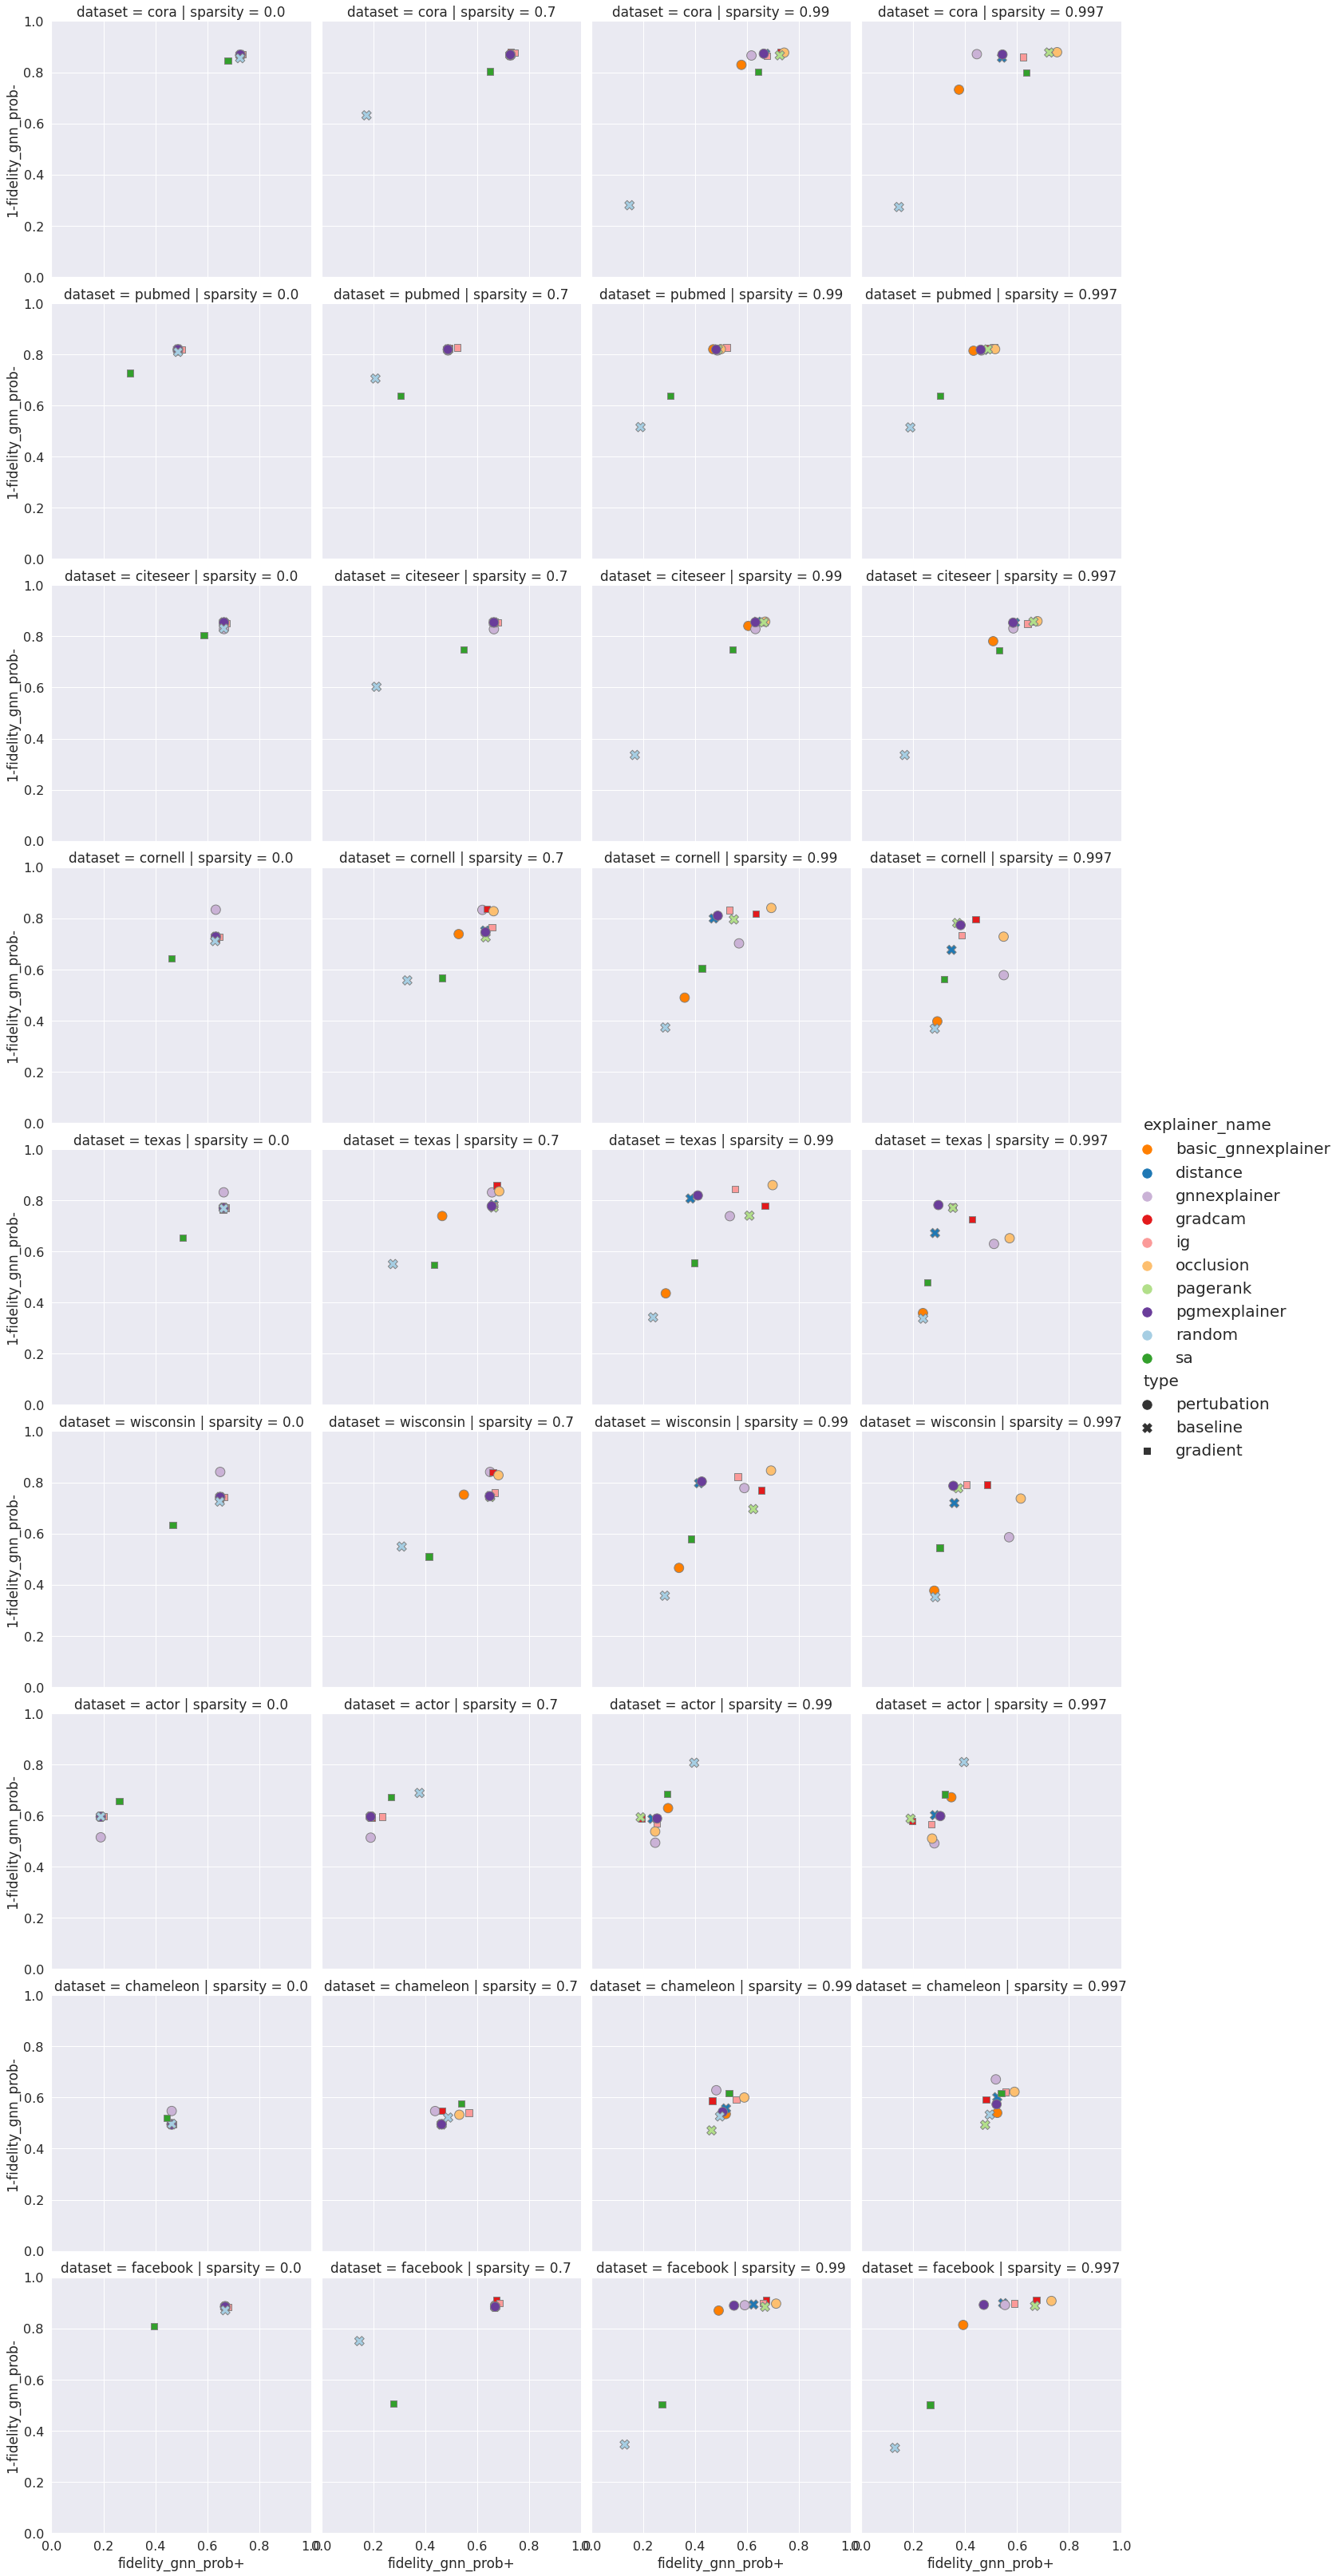

In [64]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

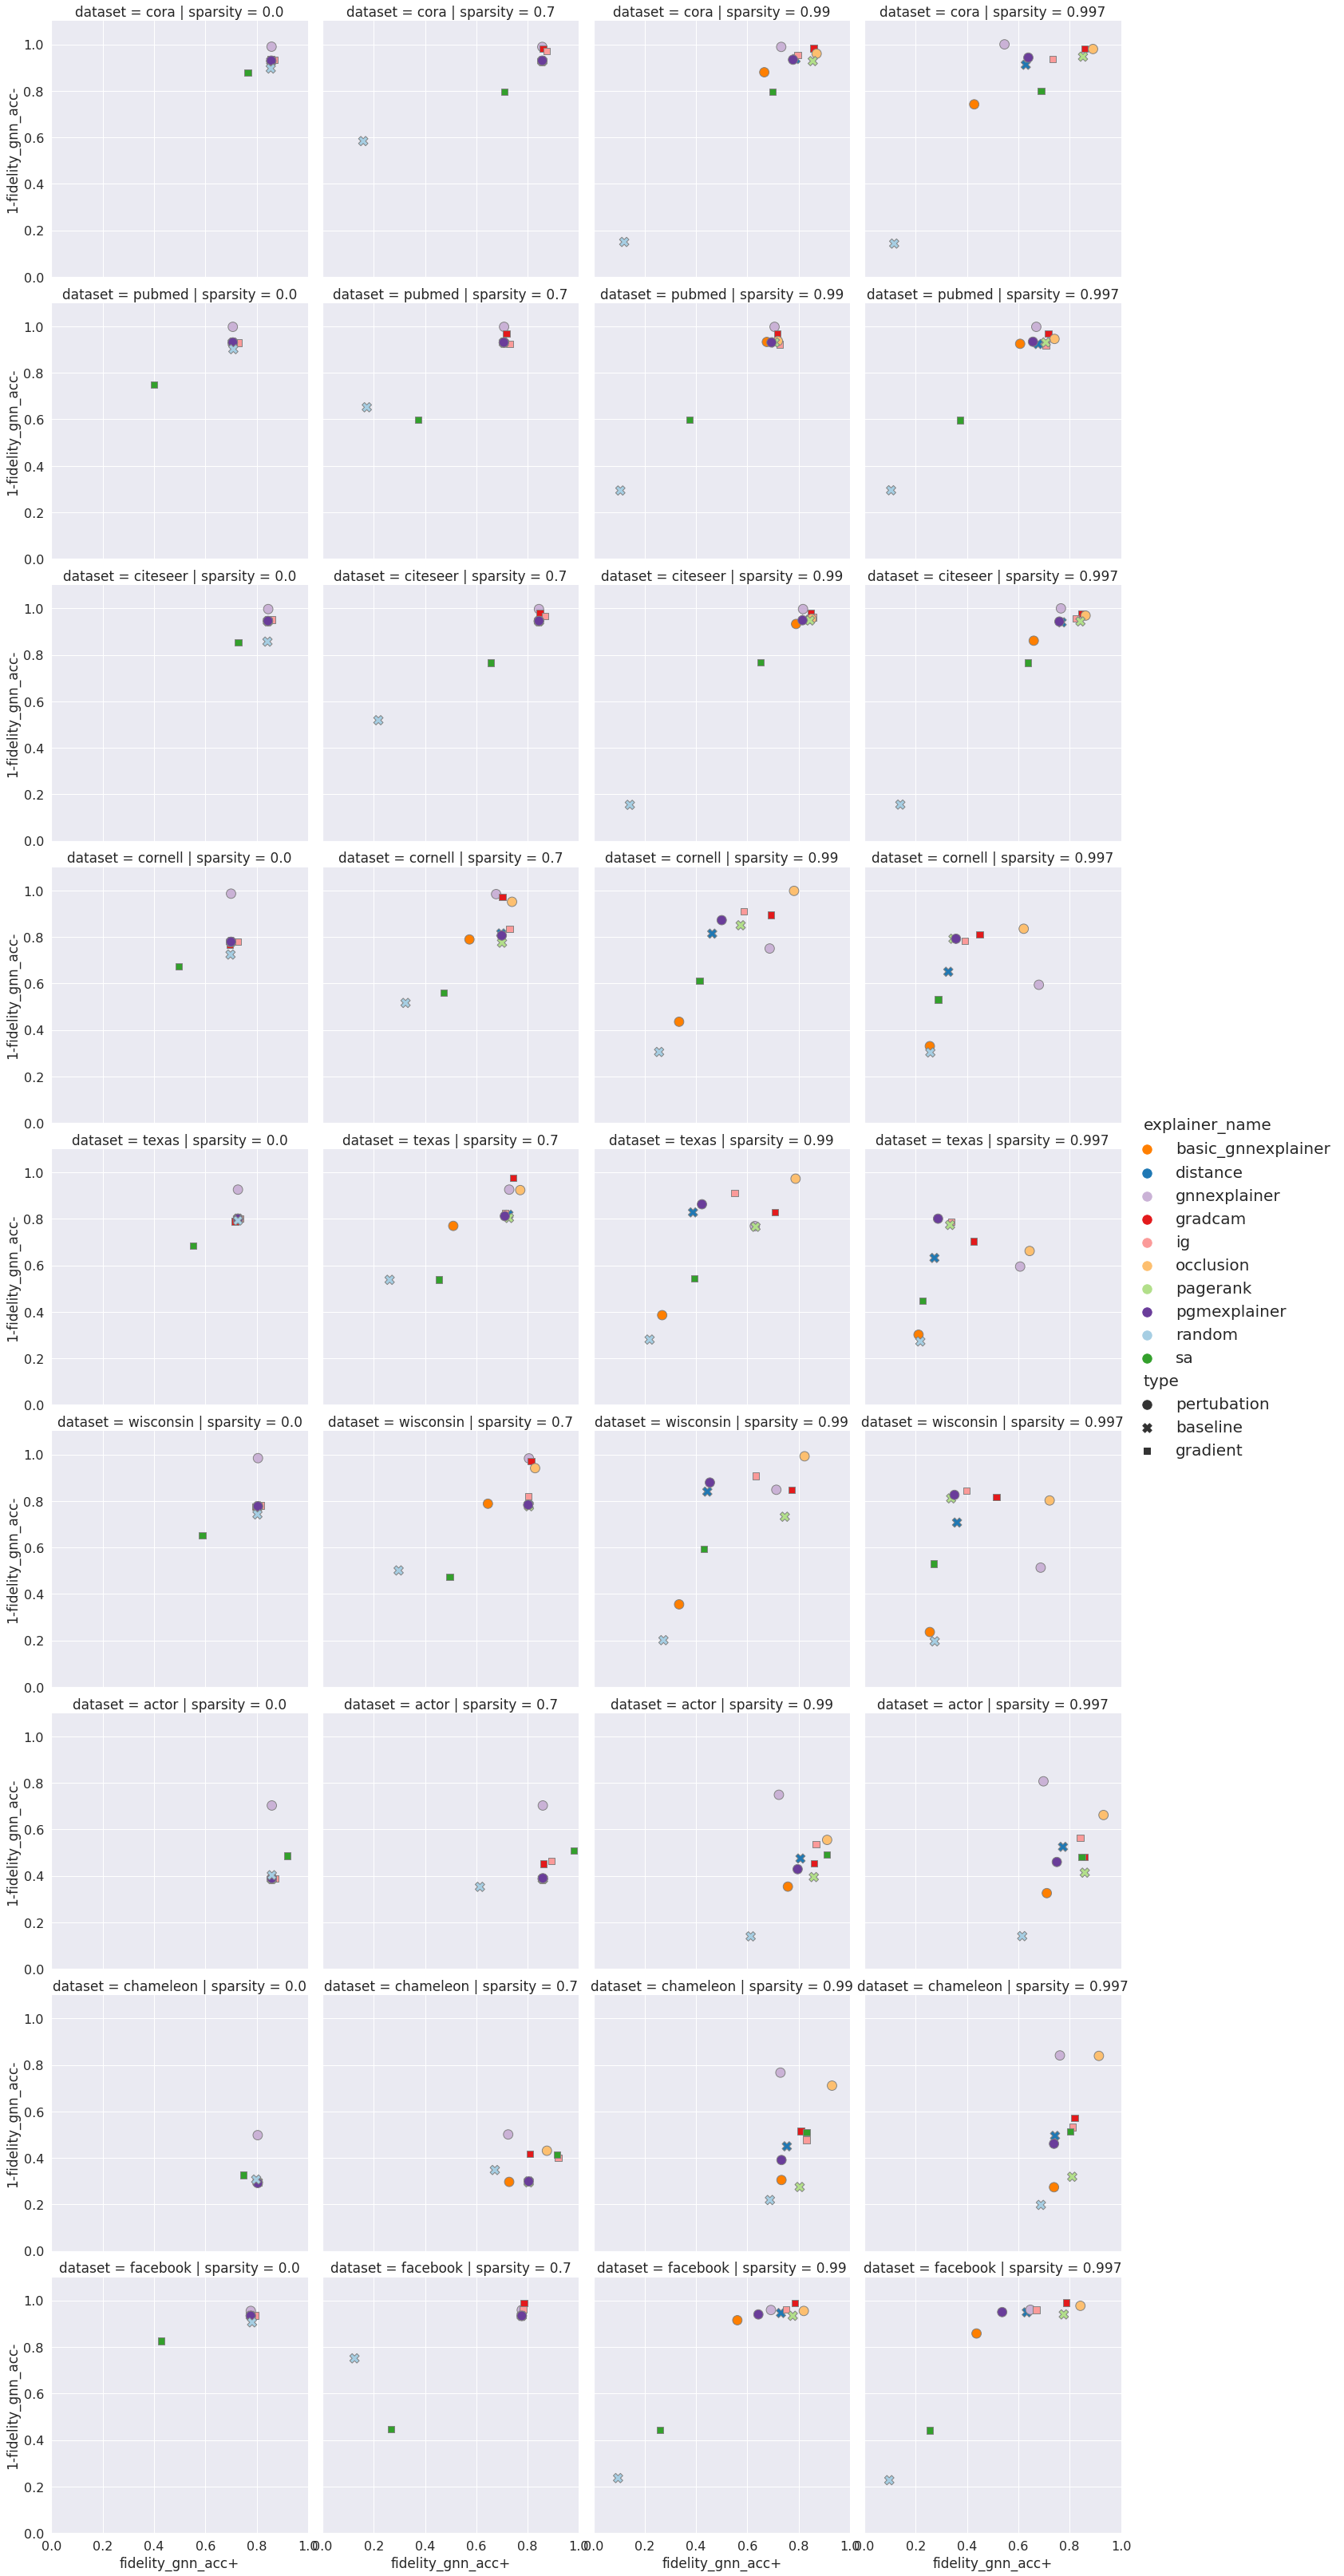

In [65]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

## Soft mask

In [67]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [69]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.99]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-', 'charact_gnn_prob', 'charact_gnn_acc']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact_gnn_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact_gnn_prob'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact_gnn_prob'])

dataset                actor  chameleon  citeseer      cora   cornell  \
explainer_name                                                          
random              0.293445   0.411004  0.262317  0.236443  0.277038   
basic_gnnexplainer  0.218754   0.185906  0.405773  0.342433  0.180877   
sa                  0.229634   0.291177  0.565321  0.631155  0.388583   
distance            0.277680   0.285148  0.600268  0.558297  0.484414   
gnnexplainer        0.292953   0.481591  0.570631  0.457008  0.485529   
ig                  0.293489   0.357280  0.647571  0.610639  0.566881   
gradcam             0.288032   0.403842  0.590807  0.556922  0.609507   
pagerank            0.282527   0.390071  0.663201  0.622232  0.597963   
pgmexplainer        0.283704   0.306998  0.753174  0.755877  0.581052   
occlusion           0.337719   0.620513  0.770788  0.819204  0.720591   

dataset             facebook    pubmed     texas  wisconsin  \
explainer_name                                                
random              0.238643  0.255352  0.270781   0.282424   
basic_gnnexplainer  0.537213  0.411136  0.167717   0.183506   
sa                  0.236011  0.301678  0.355574   0.360197   
distance            0.372659  0.467172  0.402117   0.422587   
gnnexplainer        0.310915  0.491613  0.460524   0.500683   
ig                  0.457633  0.513965  0.481983   0.526626   
gradcam             0.403238  0.487890  0.581034   0.587694   
pagerank            0.410887  0.521434  0.590212   0.589505   
pgmexplainer        0.662467  0.613325  0.493984   0.505466   
occlusion           0.796090  0.643516  0.700167   0.736209   

dataset             mean_charact_gnn_prob  
explainer_name                             
random                           0.280827  
basic_gnnexplainer               0.292590  
sa                               0.373259  
distance                         0.430038  
gnnexplainer                     0.450161  
ig                               0.495118  
gradcam                          0.500996  
pagerank                         0.518670  
pgmexplainer                     0.550672  
occlusion                        0.682755

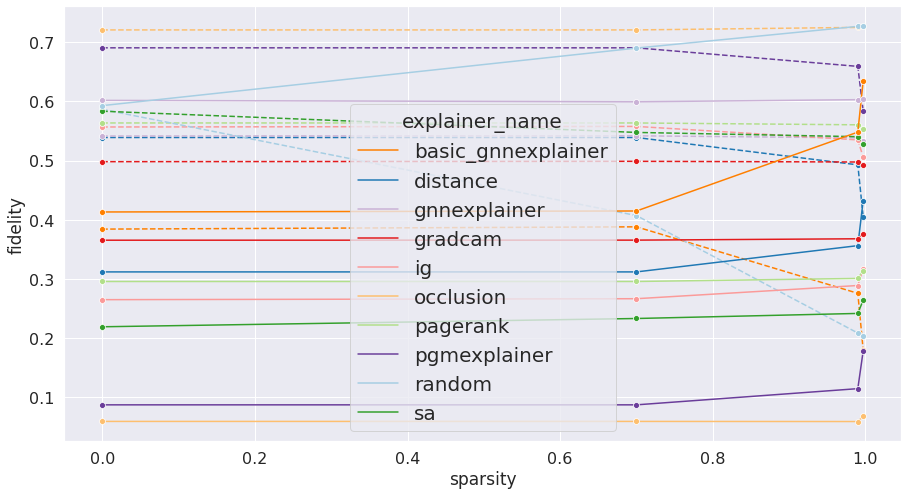

In [70]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

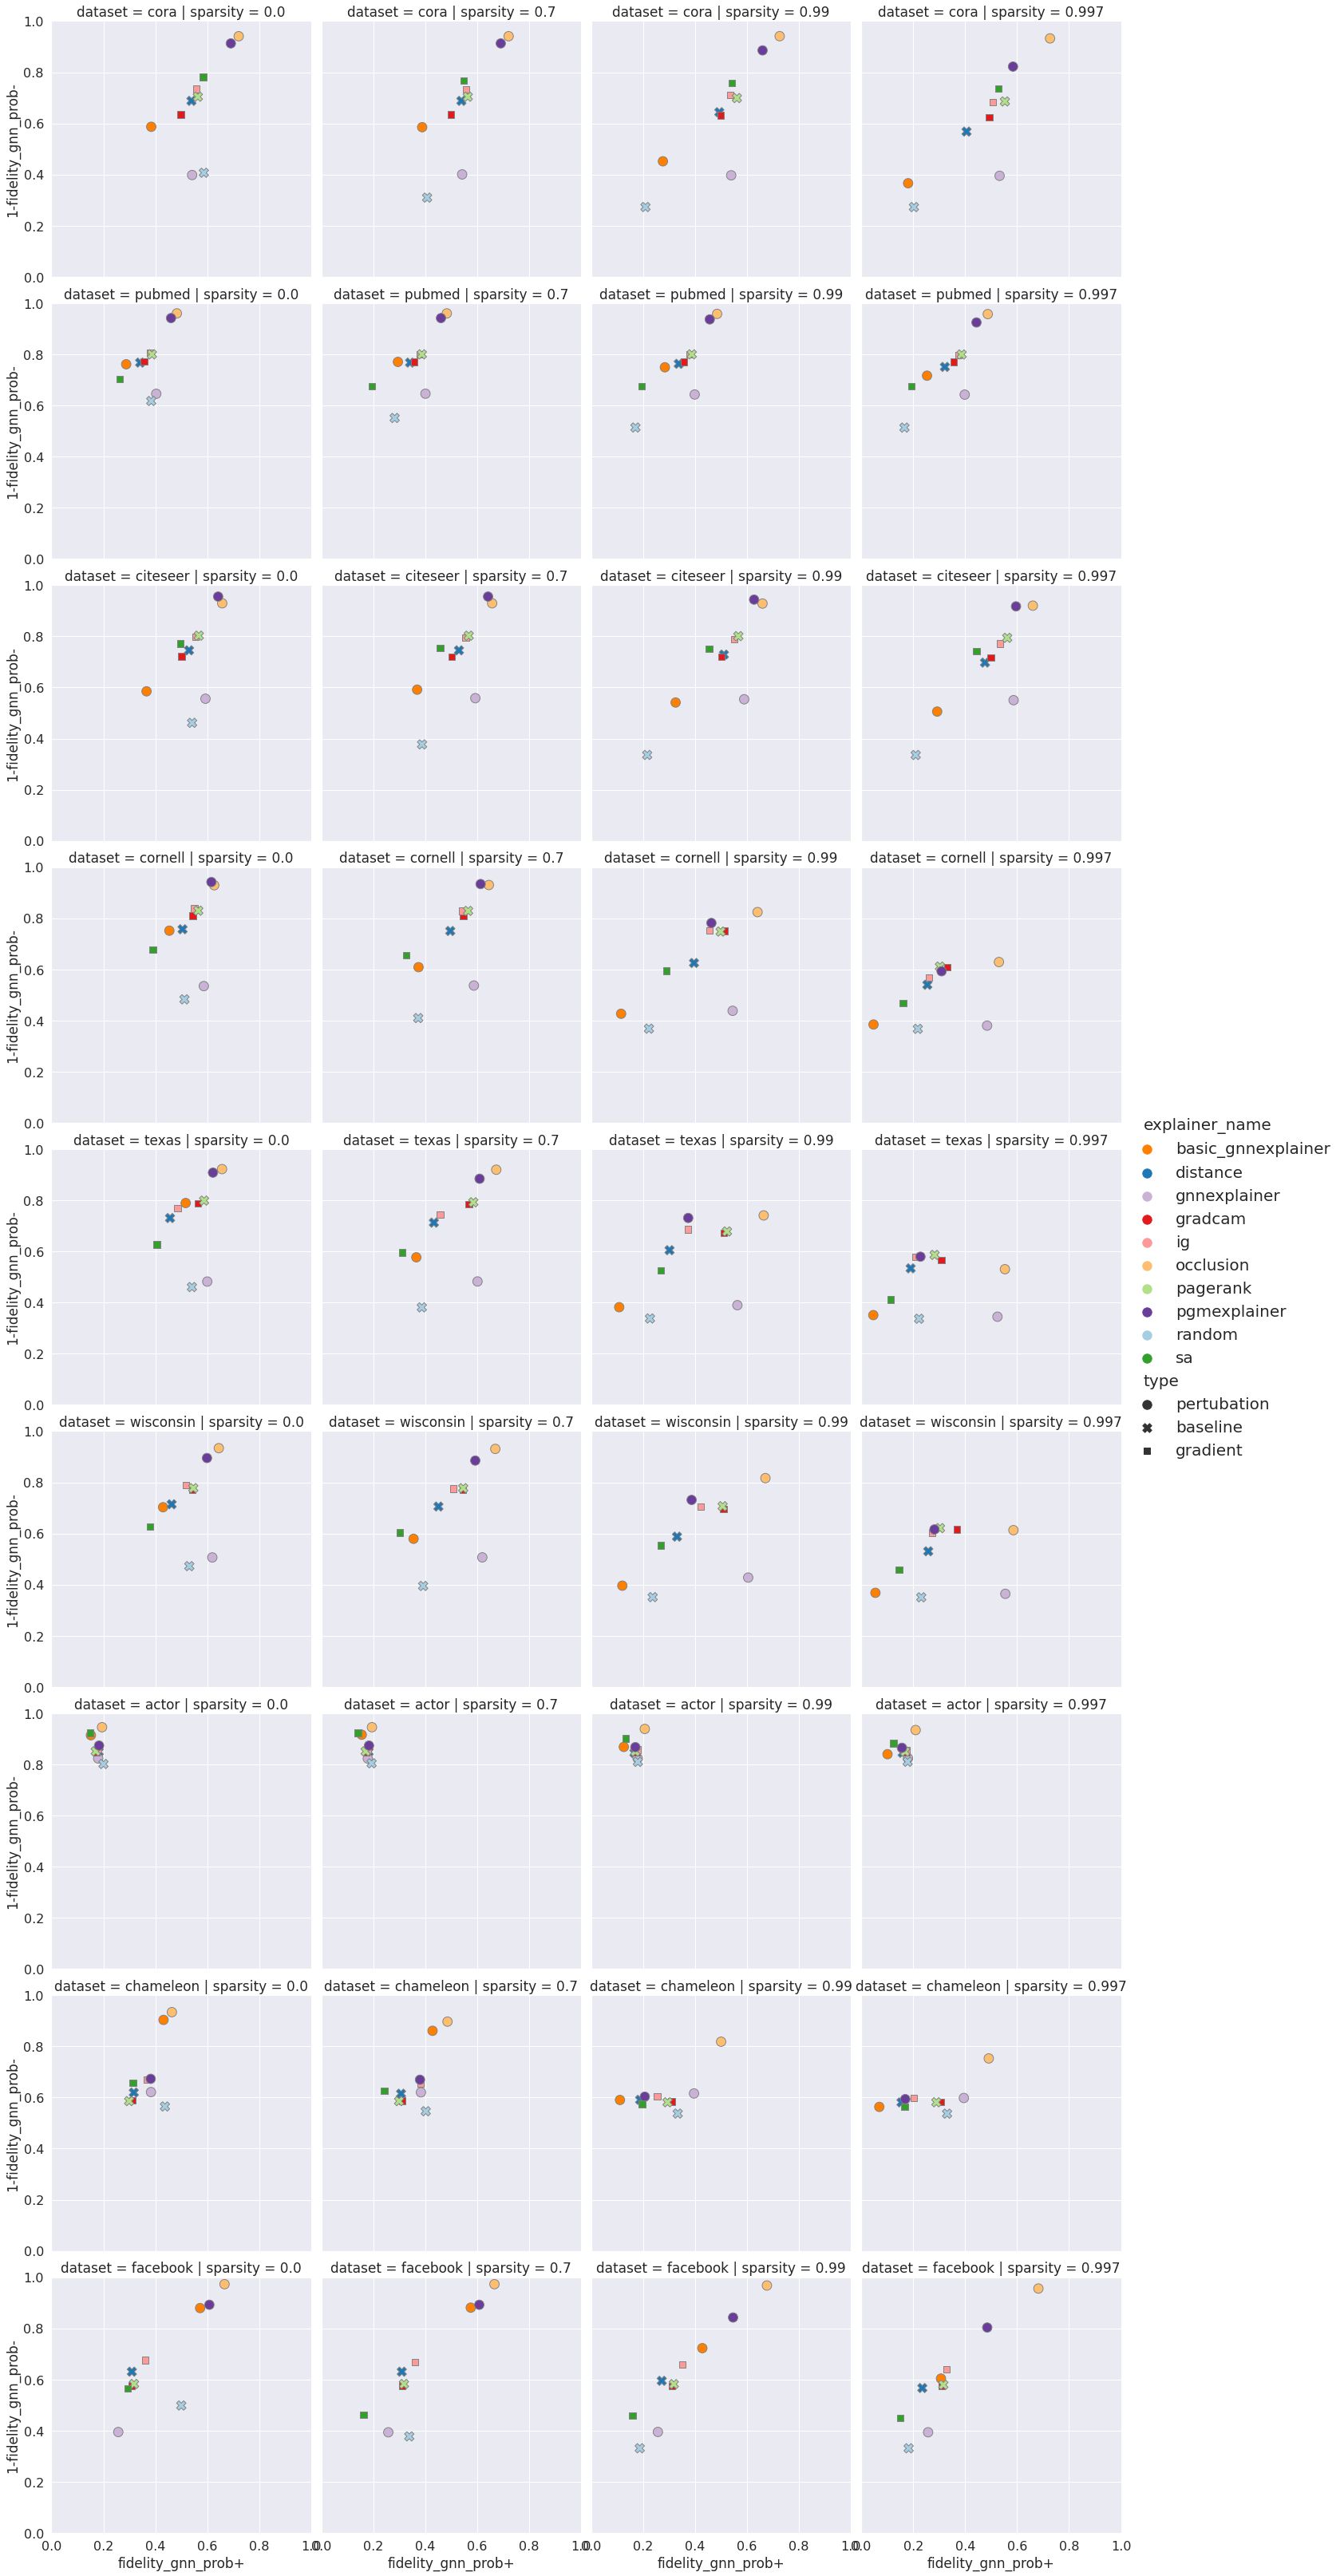

In [71]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

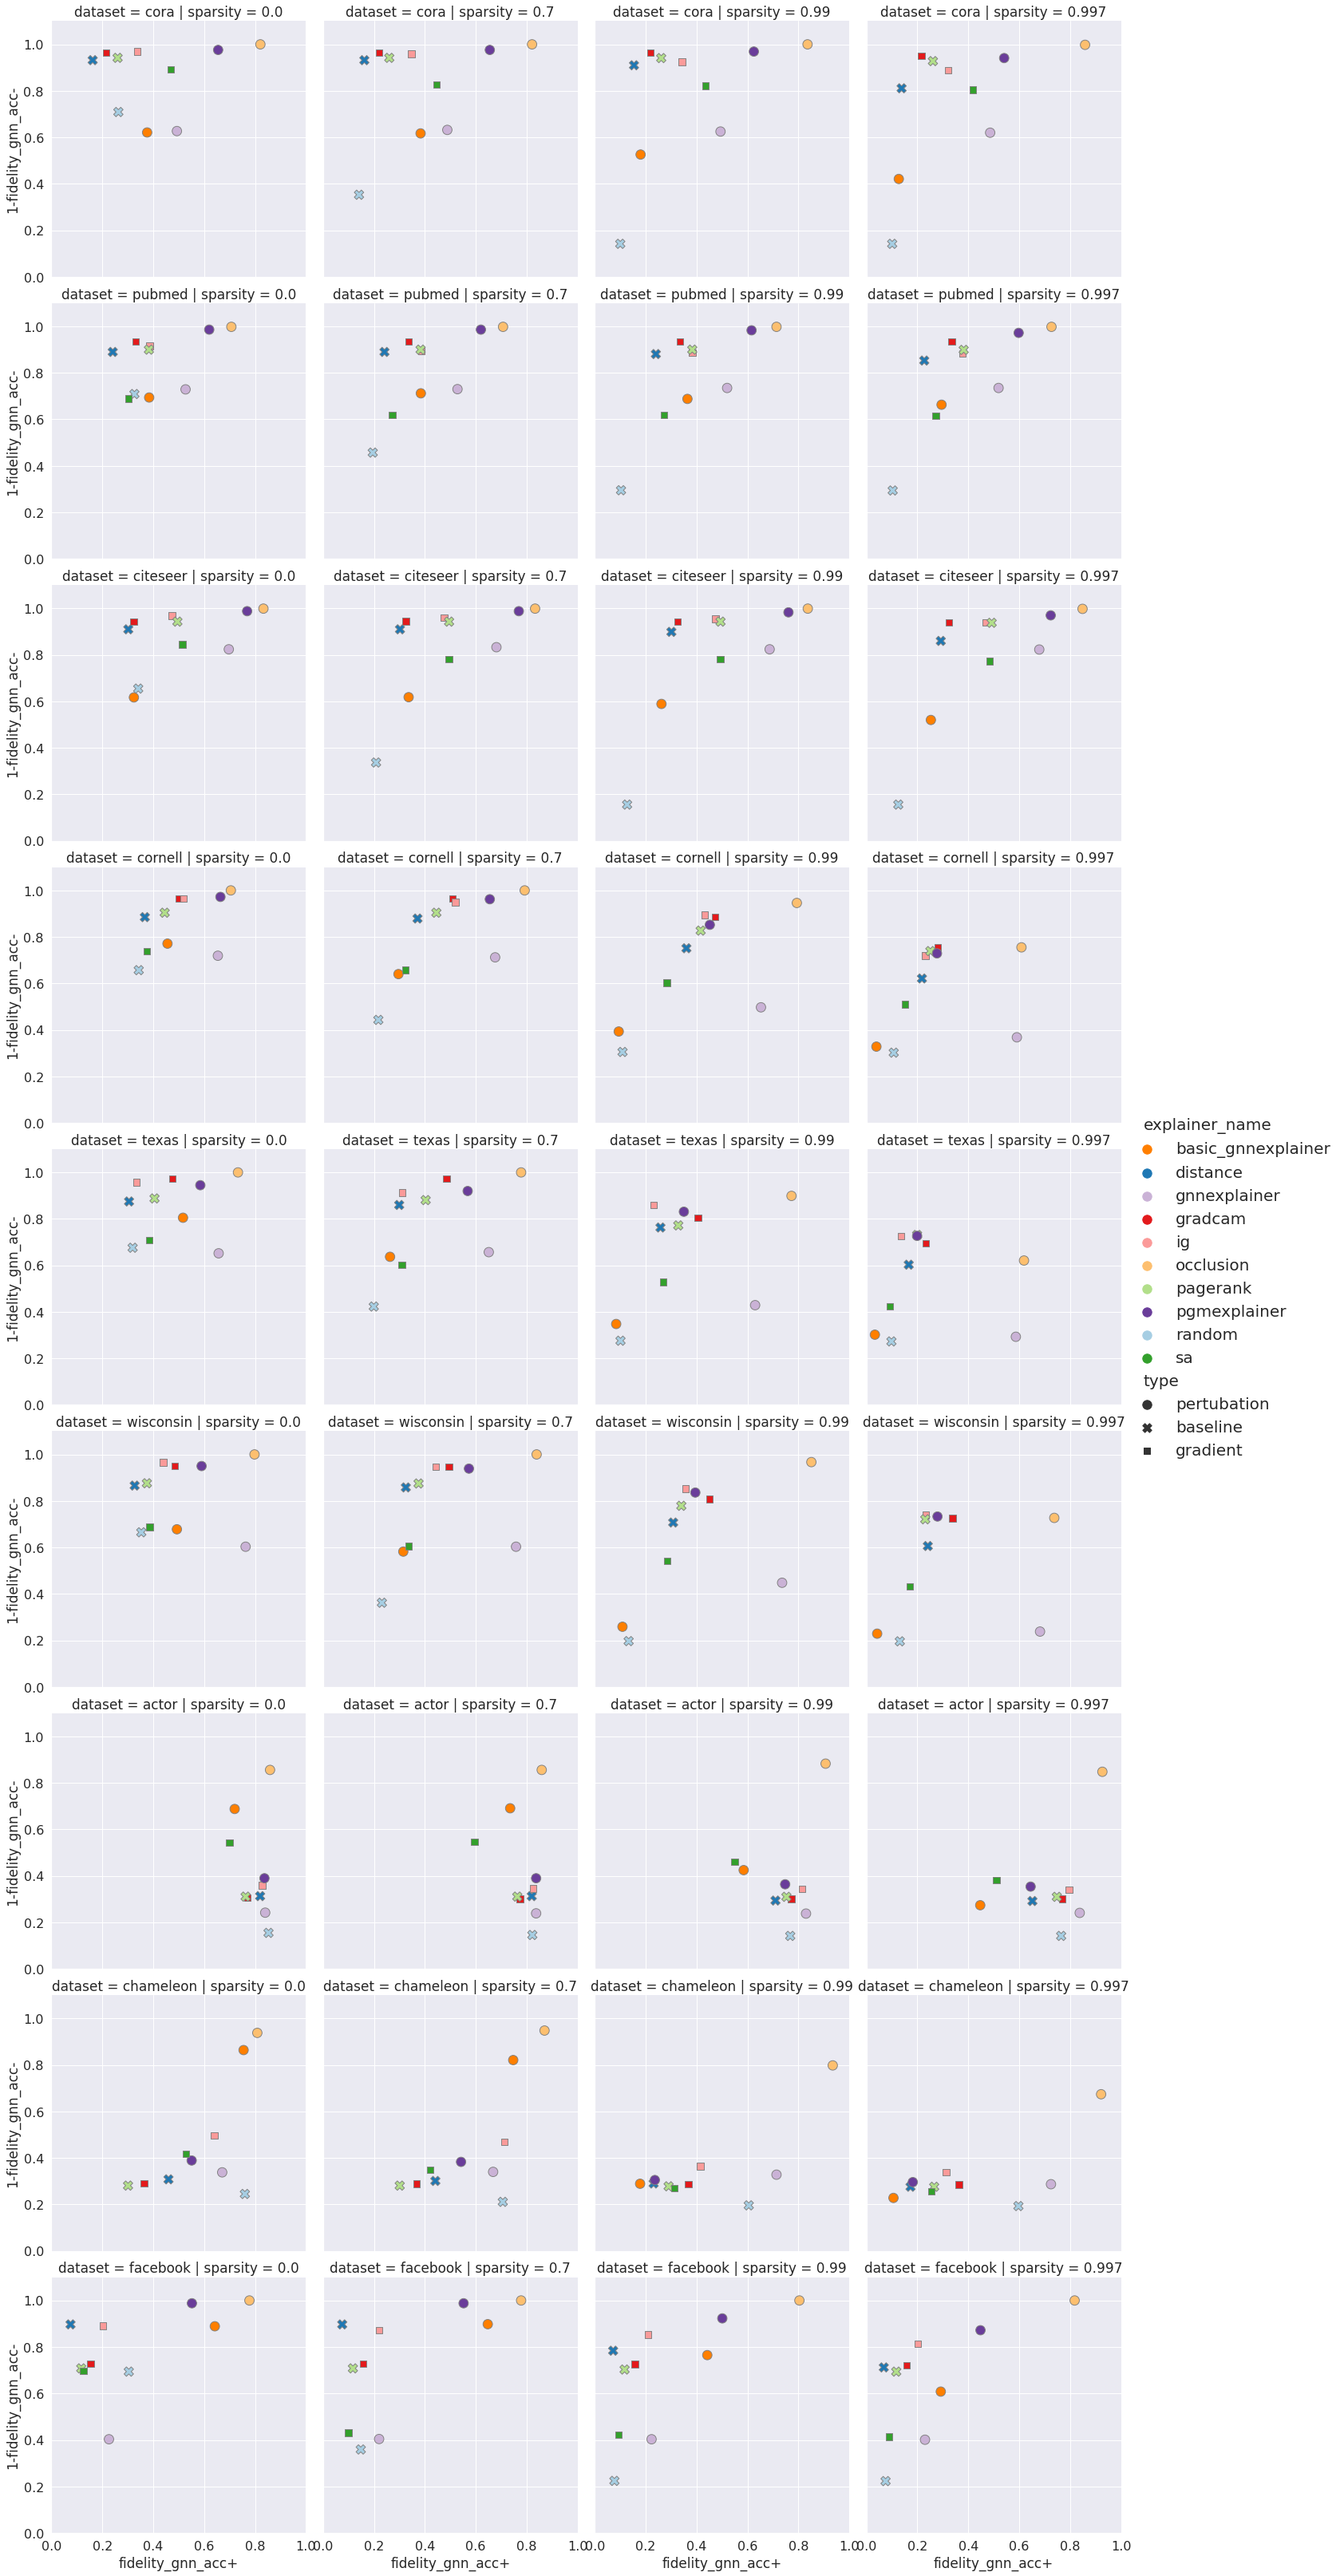

In [72]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Characterization Summary

In [80]:
sparsity = 0.99
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.sparsity==sparsity]
    if name.startswith('_gnn'):
        df_small['charact_prob'] = df_small['charact_gnn_prob']
    res_init = df_small[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
    df_char['charact_prob'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact_prob'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact_prob"]]
    dfs.append(c)
    

    

/tmp/ipykernel_16780/516143748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['charact_prob'] = df_small['charact_gnn_prob']


In [81]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [82]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary = summary.sort_values(by=['charact_prob_phen_soft', 'charact_prob_phen_hard'])
summary

explainer_name  charact_prob_phen_hard  charact_prob_phen_soft  \
8              random                0.054222                0.267849   
0  basic_gnnexplainer                0.468049                0.282891   
9                  sa                0.460372                0.392033   
1            distance                0.601035                0.442075   
2        gnnexplainer                0.658745                0.447497   
4                  ig                0.690444                0.511090   
3             gradcam                0.736022                0.514941   
6            pagerank                0.697077                0.537498   
7        pgmexplainer                0.585992                0.560188   
5           occlusion                0.788877                0.711032   

   charact_prob_gnn_hard  charact_prob_gnn_soft  
8               0.315742               0.280827  
0               0.520993               0.292590  
9               0.501381               0.373259  
1               0.596287               0.430038  
2               0.616368               0.450161  
4               0.646767               0.495118  
3               0.654623               0.500996  
6               0.626669               0.518670  
7               0.594940               0.550672  
5               0.688091               0.682755

In [54]:
summary.to_csv(f'/cluster/home/kamara/Explain/csv/node_classification/real/summary/charact_summary_avg10expe_{sparsity}.csv')